In [1]:
import os, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

seed = np.random.seed
enc = OneHotEncoder()

In [2]:
# Wczytanie bazy danych kwiatów
df = pd.read_csv('iris.data', header = None)
df.columns = ['Sepal length' , 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df)

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Stworzenie listy dwuwymiarowej z wartosci wejsciowymi dla kazdej klasy
x = df[['Sepal length' , 'Sepal width', 'Petal length', 'Petal width']].values
display(x)
# Zmiana nazw klas na liczby z przedziału 0-2
y = pd.factorize(df['Class label'])[0]
display(y)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [4]:
# Zmiana kształtu na liste dwuwymiarowa, ksztalt jest taki, wymagany przez funkcje fit
yy = y.reshape(-1, 1)
display(yy)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [5]:
# Zakodowanie numerow klas wedlug goracej jedynki 
enc.fit(yy)
yy_encoded = enc.transform(yy).toarray()
display(yy_encoded)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [6]:
# Podzial na wartosci do trenowania i testowania
x_train, x_test, y_train, y_test = train_test_split(x, yy_encoded, test_size = 0.2, random_state = 0)
display(x_train, y_train)

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [8]:
# Perceptron wielowarstwowy
mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes=40, learning_rate_init=0.01,
              max_iter=1000, random_state=1, solver='sgd', verbose=10)
mlp.out_activation = 'softmax'# jakos wplywa na wyniki

In [9]:
# Parametramy ktore posluza nam do znalezienia najlepszego klasyfikatora
parametry = {'learning_rate_init' : (0.1, 0.01, 0.001), 'hidden_layer_sizes' : [20, 40, 60, 80, 100], 
            'solver' : ['adam', 'lbfgs', 'sgd']}
# Siatka do przeszukiwania podanych parametrow
clf = GridSearchCV(mlp, parametry)

['adam', 'lbfgs', 'sgd']

In [11]:
clf.fit(x, y)

Iteration 1, loss = 1.35721204
Iteration 2, loss = 1.63603705
Iteration 3, loss = 1.93882652
Iteration 4, loss = 1.26094722
Iteration 5, loss = 0.70787225
Iteration 6, loss = 0.88739333
Iteration 7, loss = 0.76889081
Iteration 8, loss = 0.55110124
Iteration 9, loss = 0.60850024
Iteration 10, loss = 0.50377267
Iteration 11, loss = 0.54514560
Iteration 12, loss = 0.45028719
Iteration 13, loss = 0.41710675
Iteration 14, loss = 0.42833162
Iteration 15, loss = 0.39651726
Iteration 16, loss = 0.36351265
Iteration 17, loss = 0.33624602
Iteration 18, loss = 0.30414803
Iteration 19, loss = 0.29021965
Iteration 20, loss = 0.28394947
Iteration 21, loss = 0.26640358
Iteration 22, loss = 0.25626798
Iteration 23, loss = 0.24288436
Iteration 24, loss = 0.22333325
Iteration 25, loss = 0.21934740
Iteration 26, loss = 0.19578285
Iteration 27, loss = 0.19289828
Iteration 28, loss = 0.17518830
Iteration 29, loss = 0.17052570
Iteration 30, loss = 0.16073473
Iteration 31, loss = 0.15252600
Iteration 32, los

Iteration 11, loss = 0.52949937
Iteration 12, loss = 0.43364632
Iteration 13, loss = 0.39843760
Iteration 14, loss = 0.40669817
Iteration 15, loss = 0.37244418
Iteration 16, loss = 0.33878240
Iteration 17, loss = 0.30972273
Iteration 18, loss = 0.27553319
Iteration 19, loss = 0.25995758
Iteration 20, loss = 0.25024366
Iteration 21, loss = 0.23115848
Iteration 22, loss = 0.22162107
Iteration 23, loss = 0.20771854
Iteration 24, loss = 0.18972032
Iteration 25, loss = 0.17952391
Iteration 26, loss = 0.16575608
Iteration 27, loss = 0.15765176
Iteration 28, loss = 0.14524776
Iteration 29, loss = 0.13624340
Iteration 30, loss = 0.12639888
Iteration 31, loss = 0.12046397
Iteration 32, loss = 0.11447235
Iteration 33, loss = 0.10680675
Iteration 34, loss = 0.10480696
Iteration 35, loss = 0.09673563
Iteration 36, loss = 0.09672952
Iteration 37, loss = 0.08995512
Iteration 38, loss = 0.08926283
Iteration 39, loss = 0.08573684
Iteration 40, loss = 0.08309268
Iteration 41, loss = 0.08244855
Iteratio

Iteration 128, loss = 0.04627930
Iteration 129, loss = 0.04617996
Iteration 130, loss = 0.04608180
Iteration 131, loss = 0.04598467
Iteration 132, loss = 0.04588861
Iteration 133, loss = 0.04579362
Iteration 134, loss = 0.04569960
Iteration 135, loss = 0.04560668
Iteration 136, loss = 0.04551466
Iteration 137, loss = 0.04542374
Iteration 138, loss = 0.04533369
Iteration 139, loss = 0.04524471
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.35771515
Iteration 2, loss = 1.62612155
Iteration 3, loss = 1.92755262
Iteration 4, loss = 1.23194013
Iteration 5, loss = 0.69896170
Iteration 6, loss = 0.88010305
Iteration 7, loss = 0.74552400
Iteration 8, loss = 0.54415391
Iteration 9, loss = 0.58917165
Iteration 10, loss = 0.48990720
Iteration 11, loss = 0.52470553
Iteration 12, loss = 0.43607263
Iteration 13, loss = 0.40994819
Iteration 14, loss = 0.41353957
Iteration 15, loss = 0.37882989
Iteration 16, loss = 0.35019742
Iteration 1

Iteration 1, loss = 1.35721204
Iteration 2, loss = 1.10881881
Iteration 3, loss = 0.92189471
Iteration 4, loss = 0.80397058
Iteration 5, loss = 0.75264896
Iteration 6, loss = 0.74995610
Iteration 7, loss = 0.76274982
Iteration 8, loss = 0.77002771
Iteration 9, loss = 0.76544293
Iteration 10, loss = 0.74995365
Iteration 11, loss = 0.72660538
Iteration 12, loss = 0.69836352
Iteration 13, loss = 0.66777574
Iteration 14, loss = 0.63731303
Iteration 15, loss = 0.60913715
Iteration 16, loss = 0.58468719
Iteration 17, loss = 0.56502523
Iteration 18, loss = 0.55004478
Iteration 19, loss = 0.53902593
Iteration 20, loss = 0.53203667
Iteration 21, loss = 0.52753027
Iteration 22, loss = 0.52117705
Iteration 23, loss = 0.51285645
Iteration 24, loss = 0.50327578
Iteration 25, loss = 0.49280687
Iteration 26, loss = 0.48188366
Iteration 27, loss = 0.47166194
Iteration 28, loss = 0.46333518
Iteration 29, loss = 0.45620842
Iteration 30, loss = 0.44959417
Iteration 31, loss = 0.44335037
Iteration 32, los

Iteration 131, loss = 0.10102170
Iteration 132, loss = 0.09981317
Iteration 133, loss = 0.09866069
Iteration 134, loss = 0.09757206
Iteration 135, loss = 0.09655030
Iteration 136, loss = 0.09557329
Iteration 137, loss = 0.09465383
Iteration 138, loss = 0.09378990
Iteration 139, loss = 0.09296373
Iteration 140, loss = 0.09218099
Iteration 141, loss = 0.09144655
Iteration 142, loss = 0.09074964
Iteration 143, loss = 0.09008669
Iteration 144, loss = 0.08945733
Iteration 145, loss = 0.08886422
Iteration 146, loss = 0.08829860
Iteration 147, loss = 0.08775930
Iteration 148, loss = 0.08725160
Iteration 149, loss = 0.08676892
Iteration 150, loss = 0.08630643
Iteration 151, loss = 0.08586663
Iteration 152, loss = 0.08544749
Iteration 153, loss = 0.08504882
Iteration 154, loss = 0.08466849
Iteration 155, loss = 0.08430565
Iteration 156, loss = 0.08395628
Iteration 157, loss = 0.08362246
Iteration 158, loss = 0.08330550
Iteration 159, loss = 0.08300145
Iteration 160, loss = 0.08270765
Iteration 

Iteration 15, loss = 0.60415735
Iteration 16, loss = 0.58000455
Iteration 17, loss = 0.56076632
Iteration 18, loss = 0.54613165
Iteration 19, loss = 0.53517805
Iteration 20, loss = 0.52701369
Iteration 21, loss = 0.52217093
Iteration 22, loss = 0.51555171
Iteration 23, loss = 0.50680143
Iteration 24, loss = 0.49632411
Iteration 25, loss = 0.48511068
Iteration 26, loss = 0.47334176
Iteration 27, loss = 0.46284285
Iteration 28, loss = 0.45432110
Iteration 29, loss = 0.44704591
Iteration 30, loss = 0.44019304
Iteration 31, loss = 0.43352964
Iteration 32, loss = 0.42709673
Iteration 33, loss = 0.42105014
Iteration 34, loss = 0.41543048
Iteration 35, loss = 0.41060473
Iteration 36, loss = 0.40629637
Iteration 37, loss = 0.40214774
Iteration 38, loss = 0.39786130
Iteration 39, loss = 0.39318639
Iteration 40, loss = 0.38807375
Iteration 41, loss = 0.38273962
Iteration 42, loss = 0.37746428
Iteration 43, loss = 0.37243023
Iteration 44, loss = 0.36765280
Iteration 45, loss = 0.36313361
Iteratio

Iteration 154, loss = 0.08144330
Iteration 155, loss = 0.08123722
Iteration 156, loss = 0.08102399
Iteration 157, loss = 0.08082976
Iteration 158, loss = 0.08064640
Iteration 159, loss = 0.08045628
Iteration 160, loss = 0.08027293
Iteration 161, loss = 0.08010461
Iteration 162, loss = 0.07993691
Iteration 163, loss = 0.07976737
Iteration 164, loss = 0.07960730
Iteration 165, loss = 0.07945546
Iteration 166, loss = 0.07930504
Iteration 167, loss = 0.07915508
Iteration 168, loss = 0.07901203
Iteration 169, loss = 0.07887424
Iteration 170, loss = 0.07873635
Iteration 171, loss = 0.07859894
Iteration 172, loss = 0.07846616
Iteration 173, loss = 0.07833800
Iteration 174, loss = 0.07821129
Iteration 175, loss = 0.07808498
Iteration 176, loss = 0.07796254
Iteration 177, loss = 0.07784383
Iteration 178, loss = 0.07772807
Iteration 179, loss = 0.07761357
Iteration 180, loss = 0.07749990
Iteration 181, loss = 0.07738798
Iteration 182, loss = 0.07727860
Iteration 183, loss = 0.07717162
Iteration 

Iteration 212, loss = 0.13665244
Iteration 213, loss = 0.13633774
Iteration 214, loss = 0.13602641
Iteration 215, loss = 0.13571856
Iteration 216, loss = 0.13541404
Iteration 217, loss = 0.13511284
Iteration 218, loss = 0.13481493
Iteration 219, loss = 0.13452017
Iteration 220, loss = 0.13422862
Iteration 221, loss = 0.13394018
Iteration 222, loss = 0.13365487
Iteration 223, loss = 0.13337256
Iteration 224, loss = 0.13309324
Iteration 225, loss = 0.13281684
Iteration 226, loss = 0.13254335
Iteration 227, loss = 0.13227266
Iteration 228, loss = 0.13200474
Iteration 229, loss = 0.13173959
Iteration 230, loss = 0.13147710
Iteration 231, loss = 0.13121728
Iteration 232, loss = 0.13096006
Iteration 233, loss = 0.13070543
Iteration 234, loss = 0.13045337
Iteration 235, loss = 0.13020377
Iteration 236, loss = 0.12995665
Iteration 237, loss = 0.12971197
Iteration 238, loss = 0.12946967
Iteration 239, loss = 0.12922977
Iteration 240, loss = 0.12899216
Iteration 241, loss = 0.12875688
Iteration 

Iteration 209, loss = 0.12818817
Iteration 210, loss = 0.12788627
Iteration 211, loss = 0.12758779
Iteration 212, loss = 0.12729269
Iteration 213, loss = 0.12700091
Iteration 214, loss = 0.12671240
Iteration 215, loss = 0.12642709
Iteration 216, loss = 0.12614495
Iteration 217, loss = 0.12586591
Iteration 218, loss = 0.12558992
Iteration 219, loss = 0.12531695
Iteration 220, loss = 0.12504693
Iteration 221, loss = 0.12477982
Iteration 222, loss = 0.12451558
Iteration 223, loss = 0.12425415
Iteration 224, loss = 0.12399550
Iteration 225, loss = 0.12373959
Iteration 226, loss = 0.12348635
Iteration 227, loss = 0.12323577
Iteration 228, loss = 0.12298779
Iteration 229, loss = 0.12274238
Iteration 230, loss = 0.12249954
Iteration 231, loss = 0.12225928
Iteration 232, loss = 0.12202164
Iteration 233, loss = 0.12178642
Iteration 234, loss = 0.12155358
Iteration 235, loss = 0.12132308
Iteration 236, loss = 0.12109488
Iteration 237, loss = 0.12086896
Iteration 238, loss = 0.12064533
Iteration 

Iteration 248, loss = 0.09780472
Iteration 249, loss = 0.09760923
Iteration 250, loss = 0.09741556
Iteration 251, loss = 0.09722373
Iteration 252, loss = 0.09703369
Iteration 253, loss = 0.09684542
Iteration 254, loss = 0.09665890
Iteration 255, loss = 0.09647410
Iteration 256, loss = 0.09629100
Iteration 257, loss = 0.09610957
Iteration 258, loss = 0.09592979
Iteration 259, loss = 0.09575166
Iteration 260, loss = 0.09557511
Iteration 261, loss = 0.09540016
Iteration 262, loss = 0.09522678
Iteration 263, loss = 0.09505493
Iteration 264, loss = 0.09488475
Iteration 265, loss = 0.09471605
Iteration 266, loss = 0.09454885
Iteration 267, loss = 0.09438312
Iteration 268, loss = 0.09421884
Iteration 269, loss = 0.09405598
Iteration 270, loss = 0.09389453
Iteration 271, loss = 0.09373447
Iteration 272, loss = 0.09357579
Iteration 273, loss = 0.09341846
Iteration 274, loss = 0.09326246
Iteration 275, loss = 0.09310779
Iteration 276, loss = 0.09295442
Iteration 277, loss = 0.09280235
Iteration 

Iteration 305, loss = 0.08085541
Iteration 306, loss = 0.08071700
Iteration 307, loss = 0.08057959
Iteration 308, loss = 0.08044317
Iteration 309, loss = 0.08030772
Iteration 310, loss = 0.08017325
Iteration 311, loss = 0.08003974
Iteration 312, loss = 0.07990718
Iteration 313, loss = 0.07977556
Iteration 314, loss = 0.07964487
Iteration 315, loss = 0.07951509
Iteration 316, loss = 0.07938623
Iteration 317, loss = 0.07925826
Iteration 318, loss = 0.07913119
Iteration 319, loss = 0.07900500
Iteration 320, loss = 0.07887969
Iteration 321, loss = 0.07875524
Iteration 322, loss = 0.07863165
Iteration 323, loss = 0.07850890
Iteration 324, loss = 0.07838699
Iteration 325, loss = 0.07826591
Iteration 326, loss = 0.07814565
Iteration 327, loss = 0.07802621
Iteration 328, loss = 0.07790757
Iteration 329, loss = 0.07778972
Iteration 330, loss = 0.07767267
Iteration 331, loss = 0.07755639
Iteration 332, loss = 0.07744089
Iteration 333, loss = 0.07732615
Iteration 334, loss = 0.07721217
Iteration 

Iteration 254, loss = 0.12211507
Iteration 255, loss = 0.12194432
Iteration 256, loss = 0.12177514
Iteration 257, loss = 0.12160752
Iteration 258, loss = 0.12144142
Iteration 259, loss = 0.12127683
Iteration 260, loss = 0.12111372
Iteration 261, loss = 0.12095208
Iteration 262, loss = 0.12079188
Iteration 263, loss = 0.12063314
Iteration 264, loss = 0.12047586
Iteration 265, loss = 0.12031996
Iteration 266, loss = 0.12016543
Iteration 267, loss = 0.12001225
Iteration 268, loss = 0.11986040
Iteration 269, loss = 0.11970986
Iteration 270, loss = 0.11956062
Iteration 271, loss = 0.11941266
Iteration 272, loss = 0.11926596
Iteration 273, loss = 0.11912050
Iteration 274, loss = 0.11897628
Iteration 275, loss = 0.11883326
Iteration 276, loss = 0.11869144
Iteration 277, loss = 0.11855080
Iteration 278, loss = 0.11841133
Iteration 279, loss = 0.11827302
Iteration 280, loss = 0.11813586
Iteration 281, loss = 0.11799982
Iteration 282, loss = 0.11786488
Iteration 283, loss = 0.11773104
Iteration 

Iteration 251, loss = 0.42043335
Iteration 252, loss = 0.41972198
Iteration 253, loss = 0.41901322
Iteration 254, loss = 0.41830699
Iteration 255, loss = 0.41760297
Iteration 256, loss = 0.41690102
Iteration 257, loss = 0.41620154
Iteration 258, loss = 0.41550447
Iteration 259, loss = 0.41480945
Iteration 260, loss = 0.41411643
Iteration 261, loss = 0.41342540
Iteration 262, loss = 0.41273632
Iteration 263, loss = 0.41204914
Iteration 264, loss = 0.41136385
Iteration 265, loss = 0.41068038
Iteration 266, loss = 0.40999872
Iteration 267, loss = 0.40931884
Iteration 268, loss = 0.40864069
Iteration 269, loss = 0.40796443
Iteration 270, loss = 0.40729019
Iteration 271, loss = 0.40661762
Iteration 272, loss = 0.40594668
Iteration 273, loss = 0.40527733
Iteration 274, loss = 0.40460955
Iteration 275, loss = 0.40394331
Iteration 276, loss = 0.40327856
Iteration 277, loss = 0.40261529
Iteration 278, loss = 0.40195347
Iteration 279, loss = 0.40129306
Iteration 280, loss = 0.40063402
Iteration 

Iteration 624, loss = 0.17155879
Iteration 625, loss = 0.17118717
Iteration 626, loss = 0.17081761
Iteration 627, loss = 0.17044997
Iteration 628, loss = 0.17008424
Iteration 629, loss = 0.16972042
Iteration 630, loss = 0.16935849
Iteration 631, loss = 0.16899843
Iteration 632, loss = 0.16864026
Iteration 633, loss = 0.16828398
Iteration 634, loss = 0.16792958
Iteration 635, loss = 0.16757702
Iteration 636, loss = 0.16722631
Iteration 637, loss = 0.16687772
Iteration 638, loss = 0.16653042
Iteration 639, loss = 0.16618532
Iteration 640, loss = 0.16584184
Iteration 641, loss = 0.16550026
Iteration 642, loss = 0.16516049
Iteration 643, loss = 0.16482250
Iteration 644, loss = 0.16448625
Iteration 645, loss = 0.16415174
Iteration 646, loss = 0.16381894
Iteration 647, loss = 0.16348786
Iteration 648, loss = 0.16315825
Iteration 649, loss = 0.16283017
Iteration 650, loss = 0.16250374
Iteration 651, loss = 0.16217896
Iteration 652, loss = 0.16185588
Iteration 653, loss = 0.16153466
Iteration 

Iteration 102, loss = 0.59475700
Iteration 103, loss = 0.59236018
Iteration 104, loss = 0.58998211
Iteration 105, loss = 0.58762505
Iteration 106, loss = 0.58528623
Iteration 107, loss = 0.58296513
Iteration 108, loss = 0.58066227
Iteration 109, loss = 0.57837872
Iteration 110, loss = 0.57611350
Iteration 111, loss = 0.57386632
Iteration 112, loss = 0.57163718
Iteration 113, loss = 0.56942692
Iteration 114, loss = 0.56723503
Iteration 115, loss = 0.56509413
Iteration 116, loss = 0.56305885
Iteration 117, loss = 0.56113317
Iteration 118, loss = 0.55925270
Iteration 119, loss = 0.55748573
Iteration 120, loss = 0.55585400
Iteration 121, loss = 0.55426275
Iteration 122, loss = 0.55271463
Iteration 123, loss = 0.55117376
Iteration 124, loss = 0.54961953
Iteration 125, loss = 0.54804535
Iteration 126, loss = 0.54644869
Iteration 127, loss = 0.54483199
Iteration 128, loss = 0.54320779
Iteration 129, loss = 0.54158939
Iteration 130, loss = 0.53998358
Iteration 131, loss = 0.53840264
Iteration 

Iteration 440, loss = 0.28871359
Iteration 441, loss = 0.28782887
Iteration 442, loss = 0.28694210
Iteration 443, loss = 0.28605179
Iteration 444, loss = 0.28516046
Iteration 445, loss = 0.28426960
Iteration 446, loss = 0.28337876
Iteration 447, loss = 0.28248755
Iteration 448, loss = 0.28159396
Iteration 449, loss = 0.28069930
Iteration 450, loss = 0.27980332
Iteration 451, loss = 0.27890781
Iteration 452, loss = 0.27801289
Iteration 453, loss = 0.27711702
Iteration 454, loss = 0.27622151
Iteration 455, loss = 0.27532595
Iteration 456, loss = 0.27443473
Iteration 457, loss = 0.27353984
Iteration 458, loss = 0.27264123
Iteration 459, loss = 0.27175190
Iteration 460, loss = 0.27086091
Iteration 461, loss = 0.26996705
Iteration 462, loss = 0.26908044
Iteration 463, loss = 0.26819343
Iteration 464, loss = 0.26730559
Iteration 465, loss = 0.26642271
Iteration 466, loss = 0.26553855
Iteration 467, loss = 0.26465323
Iteration 468, loss = 0.26377244
Iteration 469, loss = 0.26289283
Iteration 

Iteration 710, loss = 0.13775811
Iteration 711, loss = 0.13750505
Iteration 712, loss = 0.13725323
Iteration 713, loss = 0.13700300
Iteration 714, loss = 0.13675403
Iteration 715, loss = 0.13650654
Iteration 716, loss = 0.13626027
Iteration 717, loss = 0.13601514
Iteration 718, loss = 0.13577100
Iteration 719, loss = 0.13552806
Iteration 720, loss = 0.13528636
Iteration 721, loss = 0.13504738
Iteration 722, loss = 0.13481103
Iteration 723, loss = 0.13457578
Iteration 724, loss = 0.13434188
Iteration 725, loss = 0.13410940
Iteration 726, loss = 0.13387817
Iteration 727, loss = 0.13364843
Iteration 728, loss = 0.13342039
Iteration 729, loss = 0.13319356
Iteration 730, loss = 0.13296787
Iteration 731, loss = 0.13274336
Iteration 732, loss = 0.13252005
Iteration 733, loss = 0.13229863
Iteration 734, loss = 0.13207869
Iteration 735, loss = 0.13185993
Iteration 736, loss = 0.13164229
Iteration 737, loss = 0.13142547
Iteration 738, loss = 0.13120975
Iteration 739, loss = 0.13099514
Iteration 

Iteration 59, loss = 0.70026682
Iteration 60, loss = 0.69760516
Iteration 61, loss = 0.69493166
Iteration 62, loss = 0.69224621
Iteration 63, loss = 0.68952912
Iteration 64, loss = 0.68677833
Iteration 65, loss = 0.68395838
Iteration 66, loss = 0.68108072
Iteration 67, loss = 0.67815100
Iteration 68, loss = 0.67520185
Iteration 69, loss = 0.67227842
Iteration 70, loss = 0.66936551
Iteration 71, loss = 0.66646278
Iteration 72, loss = 0.66360708
Iteration 73, loss = 0.66080377
Iteration 74, loss = 0.65810407
Iteration 75, loss = 0.65546919
Iteration 76, loss = 0.65286365
Iteration 77, loss = 0.65033282
Iteration 78, loss = 0.64789028
Iteration 79, loss = 0.64552162
Iteration 80, loss = 0.64325066
Iteration 81, loss = 0.64106114
Iteration 82, loss = 0.63890186
Iteration 83, loss = 0.63674905
Iteration 84, loss = 0.63461162
Iteration 85, loss = 0.63247505
Iteration 86, loss = 0.63035348
Iteration 87, loss = 0.62818321
Iteration 88, loss = 0.62598479
Iteration 89, loss = 0.62375693
Iteratio

Iteration 369, loss = 0.32872125
Iteration 370, loss = 0.32809370
Iteration 371, loss = 0.32746745
Iteration 372, loss = 0.32684154
Iteration 373, loss = 0.32621606
Iteration 374, loss = 0.32559115
Iteration 375, loss = 0.32496673
Iteration 376, loss = 0.32434302
Iteration 377, loss = 0.32372119
Iteration 378, loss = 0.32310052
Iteration 379, loss = 0.32248043
Iteration 380, loss = 0.32186089
Iteration 381, loss = 0.32124189
Iteration 382, loss = 0.32062299
Iteration 383, loss = 0.31999661
Iteration 384, loss = 0.31933831
Iteration 385, loss = 0.31863359
Iteration 386, loss = 0.31797937
Iteration 387, loss = 0.31736008
Iteration 388, loss = 0.31671462
Iteration 389, loss = 0.31604735
Iteration 390, loss = 0.31536140
Iteration 391, loss = 0.31466457
Iteration 392, loss = 0.31398764
Iteration 393, loss = 0.31332051
Iteration 394, loss = 0.31261557
Iteration 395, loss = 0.31193392
Iteration 396, loss = 0.31124776
Iteration 397, loss = 0.31054892
Iteration 398, loss = 0.30983608
Iteration 

Iteration 712, loss = 0.11865480
Iteration 713, loss = 0.11839714
Iteration 714, loss = 0.11814153
Iteration 715, loss = 0.11788791
Iteration 716, loss = 0.11763478
Iteration 717, loss = 0.11738213
Iteration 718, loss = 0.11713060
Iteration 719, loss = 0.11688114
Iteration 720, loss = 0.11663303
Iteration 721, loss = 0.11638678
Iteration 722, loss = 0.11614292
Iteration 723, loss = 0.11590035
Iteration 724, loss = 0.11565850
Iteration 725, loss = 0.11541747
Iteration 726, loss = 0.11517840
Iteration 727, loss = 0.11494139
Iteration 728, loss = 0.11470526
Iteration 729, loss = 0.11447069
Iteration 730, loss = 0.11423772
Iteration 731, loss = 0.11400576
Iteration 732, loss = 0.11377542
Iteration 733, loss = 0.11354638
Iteration 734, loss = 0.11331821
Iteration 735, loss = 0.11309093
Iteration 736, loss = 0.11286468
Iteration 737, loss = 0.11263932
Iteration 738, loss = 0.11241618
Iteration 739, loss = 0.11219383
Iteration 740, loss = 0.11197369
Iteration 741, loss = 0.11175532
Iteration 

Iteration 137, loss = 0.52392579
Iteration 138, loss = 0.52252162
Iteration 139, loss = 0.52113328
Iteration 140, loss = 0.51975230
Iteration 141, loss = 0.51837123
Iteration 142, loss = 0.51699074
Iteration 143, loss = 0.51561179
Iteration 144, loss = 0.51423914
Iteration 145, loss = 0.51287557
Iteration 146, loss = 0.51152512
Iteration 147, loss = 0.51018511
Iteration 148, loss = 0.50885718
Iteration 149, loss = 0.50754964
Iteration 150, loss = 0.50625749
Iteration 151, loss = 0.50497536
Iteration 152, loss = 0.50371265
Iteration 153, loss = 0.50246426
Iteration 154, loss = 0.50121816
Iteration 155, loss = 0.49997440
Iteration 156, loss = 0.49873352
Iteration 157, loss = 0.49749757
Iteration 158, loss = 0.49627453
Iteration 159, loss = 0.49506245
Iteration 160, loss = 0.49386249
Iteration 161, loss = 0.49267240
Iteration 162, loss = 0.49149010
Iteration 163, loss = 0.49031860
Iteration 164, loss = 0.48915386
Iteration 165, loss = 0.48799572
Iteration 166, loss = 0.48684418
Iteration 

Iteration 557, loss = 0.17753146
Iteration 558, loss = 0.17695660
Iteration 559, loss = 0.17638460
Iteration 560, loss = 0.17581534
Iteration 561, loss = 0.17525039
Iteration 562, loss = 0.17468780
Iteration 563, loss = 0.17412814
Iteration 564, loss = 0.17357136
Iteration 565, loss = 0.17301884
Iteration 566, loss = 0.17246897
Iteration 567, loss = 0.17192146
Iteration 568, loss = 0.17137677
Iteration 569, loss = 0.17083604
Iteration 570, loss = 0.17029799
Iteration 571, loss = 0.16976273
Iteration 572, loss = 0.16923075
Iteration 573, loss = 0.16870172
Iteration 574, loss = 0.16817552
Iteration 575, loss = 0.16765264
Iteration 576, loss = 0.16713238
Iteration 577, loss = 0.16661475
Iteration 578, loss = 0.16610067
Iteration 579, loss = 0.16558886
Iteration 580, loss = 0.16508011
Iteration 581, loss = 0.16457431
Iteration 582, loss = 0.16407166
Iteration 583, loss = 0.16357200
Iteration 584, loss = 0.16307495
Iteration 585, loss = 0.16258088
Iteration 586, loss = 0.16208912
Iteration 

Iteration 1, loss = 1.35771515
Iteration 2, loss = 1.33028224
Iteration 3, loss = 1.30337479
Iteration 4, loss = 1.27698898
Iteration 5, loss = 1.25110636
Iteration 6, loss = 1.22581117
Iteration 7, loss = 1.20113194
Iteration 8, loss = 1.17706852
Iteration 9, loss = 1.15360906
Iteration 10, loss = 1.13074113
Iteration 11, loss = 1.10852997
Iteration 12, loss = 1.08698852
Iteration 13, loss = 1.06616725
Iteration 14, loss = 1.04604292
Iteration 15, loss = 1.02663495
Iteration 16, loss = 1.00794286
Iteration 17, loss = 0.98999628
Iteration 18, loss = 0.97275542
Iteration 19, loss = 0.95624511
Iteration 20, loss = 0.94044768
Iteration 21, loss = 0.92533910
Iteration 22, loss = 0.91093493
Iteration 23, loss = 0.89719725
Iteration 24, loss = 0.88413857
Iteration 25, loss = 0.87175274
Iteration 26, loss = 0.86004347
Iteration 27, loss = 0.84897663
Iteration 28, loss = 0.83850959
Iteration 29, loss = 0.82864611
Iteration 30, loss = 0.81933114
Iteration 31, loss = 0.81058818
Iteration 32, los

Iteration 360, loss = 0.33944395
Iteration 361, loss = 0.33864077
Iteration 362, loss = 0.33783492
Iteration 363, loss = 0.33702579
Iteration 364, loss = 0.33621328
Iteration 365, loss = 0.33539608
Iteration 366, loss = 0.33457407
Iteration 367, loss = 0.33375006
Iteration 368, loss = 0.33292377
Iteration 369, loss = 0.33209298
Iteration 370, loss = 0.33125892
Iteration 371, loss = 0.33042265
Iteration 372, loss = 0.32958395
Iteration 373, loss = 0.32874243
Iteration 374, loss = 0.32789807
Iteration 375, loss = 0.32705093
Iteration 376, loss = 0.32620166
Iteration 377, loss = 0.32535059
Iteration 378, loss = 0.32449757
Iteration 379, loss = 0.32364252
Iteration 380, loss = 0.32278553
Iteration 381, loss = 0.32192672
Iteration 382, loss = 0.32106620
Iteration 383, loss = 0.32020449
Iteration 384, loss = 0.31934136
Iteration 385, loss = 0.31847688
Iteration 386, loss = 0.31761118
Iteration 387, loss = 0.31674437
Iteration 388, loss = 0.31587658
Iteration 389, loss = 0.31500793
Iteration 

Iteration 710, loss = 0.14163005
Iteration 711, loss = 0.14140544
Iteration 712, loss = 0.14118189
Iteration 713, loss = 0.14095956
Iteration 714, loss = 0.14073812
Iteration 715, loss = 0.14051752
Iteration 716, loss = 0.14029761
Iteration 717, loss = 0.14007859
Iteration 718, loss = 0.13986053
Iteration 719, loss = 0.13964535
Iteration 720, loss = 0.13943148
Iteration 721, loss = 0.13921859
Iteration 722, loss = 0.13900674
Iteration 723, loss = 0.13879592
Iteration 724, loss = 0.13858611
Iteration 725, loss = 0.13837739
Iteration 726, loss = 0.13816997
Iteration 727, loss = 0.13796366
Iteration 728, loss = 0.13775835
Iteration 729, loss = 0.13755403
Iteration 730, loss = 0.13735100
Iteration 731, loss = 0.13714960
Iteration 732, loss = 0.13694901
Iteration 733, loss = 0.13674930
Iteration 734, loss = 0.13655054
Iteration 735, loss = 0.13635246
Iteration 736, loss = 0.13615485
Iteration 737, loss = 0.13595792
Iteration 738, loss = 0.13576191
Iteration 739, loss = 0.13556675
Iteration 

Iteration 190, loss = 0.46317911
Iteration 191, loss = 0.46254628
Iteration 192, loss = 0.46191657
Iteration 193, loss = 0.46128989
Iteration 194, loss = 0.46066618
Iteration 195, loss = 0.46004542
Iteration 196, loss = 0.45942755
Iteration 197, loss = 0.45881254
Iteration 198, loss = 0.45820035
Iteration 199, loss = 0.45759093
Iteration 200, loss = 0.45698424
Iteration 201, loss = 0.45638024
Iteration 202, loss = 0.45577890
Iteration 203, loss = 0.45518016
Iteration 204, loss = 0.45458400
Iteration 205, loss = 0.45399037
Iteration 206, loss = 0.45339924
Iteration 207, loss = 0.45281057
Iteration 208, loss = 0.45222432
Iteration 209, loss = 0.45164046
Iteration 210, loss = 0.45105895
Iteration 211, loss = 0.45047975
Iteration 212, loss = 0.44990284
Iteration 213, loss = 0.44932817
Iteration 214, loss = 0.44875572
Iteration 215, loss = 0.44818545
Iteration 216, loss = 0.44761733
Iteration 217, loss = 0.44705165
Iteration 218, loss = 0.44648954
Iteration 219, loss = 0.44592959
Iteration 

Iteration 591, loss = 0.30475473
Iteration 592, loss = 0.30446812
Iteration 593, loss = 0.30418192
Iteration 594, loss = 0.30389607
Iteration 595, loss = 0.30361060
Iteration 596, loss = 0.30332549
Iteration 597, loss = 0.30304081
Iteration 598, loss = 0.30275646
Iteration 599, loss = 0.30247248
Iteration 600, loss = 0.30218887
Iteration 601, loss = 0.30190568
Iteration 602, loss = 0.30162283
Iteration 603, loss = 0.30134035
Iteration 604, loss = 0.30105828
Iteration 605, loss = 0.30077654
Iteration 606, loss = 0.30049519
Iteration 607, loss = 0.30021424
Iteration 608, loss = 0.29993364
Iteration 609, loss = 0.29965341
Iteration 610, loss = 0.29937355
Iteration 611, loss = 0.29909412
Iteration 612, loss = 0.29881499
Iteration 613, loss = 0.29853625
Iteration 614, loss = 0.29825793
Iteration 615, loss = 0.29797995
Iteration 616, loss = 0.29770234
Iteration 617, loss = 0.29742510
Iteration 618, loss = 0.29714829
Iteration 619, loss = 0.29687190
Iteration 620, loss = 0.29659595
Iteration 

Iteration 978, loss = 0.22049745
Iteration 979, loss = 0.22034129
Iteration 980, loss = 0.22018541
Iteration 981, loss = 0.22002979
Iteration 982, loss = 0.21987442
Iteration 983, loss = 0.21971933
Iteration 984, loss = 0.21956450
Iteration 985, loss = 0.21940993
Iteration 986, loss = 0.21925562
Iteration 987, loss = 0.21910157
Iteration 988, loss = 0.21894779
Iteration 989, loss = 0.21879426
Iteration 990, loss = 0.21864100
Iteration 991, loss = 0.21848799
Iteration 992, loss = 0.21833525
Iteration 993, loss = 0.21818276
Iteration 994, loss = 0.21803053
Iteration 995, loss = 0.21787855
Iteration 996, loss = 0.21772685
Iteration 997, loss = 0.21757538
Iteration 998, loss = 0.21742419
Iteration 999, loss = 0.21727324
Iteration 1000, loss = 0.21712255
Iteration 1, loss = 1.36148097
Iteration 2, loss = 1.32450113
Iteration 3, loss = 1.27472347
Iteration 4, loss = 1.21631650
Iteration 5, loss = 1.15351700
Iteration 6, loss = 1.09020961
Iteration 7, loss = 1.02958053
Iteration 8, loss = 0.9

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 160, loss = 0.48075206
Iteration 161, loss = 0.47996505
Iteration 162, loss = 0.47918307
Iteration 163, loss = 0.47840601
Iteration 164, loss = 0.47763380
Iteration 165, loss = 0.47686635
Iteration 166, loss = 0.47610358
Iteration 167, loss = 0.47534540
Iteration 168, loss = 0.47459237
Iteration 169, loss = 0.47384388
Iteration 170, loss = 0.47309983
Iteration 171, loss = 0.47236016
Iteration 172, loss = 0.47162481
Iteration 173, loss = 0.47089370
Iteration 174, loss = 0.47016679
Iteration 175, loss = 0.46944399
Iteration 176, loss = 0.46872525
Iteration 177, loss = 0.46801050
Iteration 178, loss = 0.46729968
Iteration 179, loss = 0.46659272
Iteration 180, loss = 0.46588956
Iteration 181, loss = 0.46519014
Iteration 182, loss = 0.46449439
Iteration 183, loss = 0.46380226
Iteration 184, loss = 0.46311369
Iteration 185, loss = 0.46242861
Iteration 186, loss = 0.46174698
Iteration 187, loss = 0.46106872
Iteration 188, loss = 0.46039380
Iteration 189, loss = 0.45972214
Iteration 

Iteration 520, loss = 0.31470713
Iteration 521, loss = 0.31438187
Iteration 522, loss = 0.31405708
Iteration 523, loss = 0.31373270
Iteration 524, loss = 0.31340875
Iteration 525, loss = 0.31308522
Iteration 526, loss = 0.31276211
Iteration 527, loss = 0.31243942
Iteration 528, loss = 0.31211716
Iteration 529, loss = 0.31179538
Iteration 530, loss = 0.31147399
Iteration 531, loss = 0.31115304
Iteration 532, loss = 0.31083250
Iteration 533, loss = 0.31051239
Iteration 534, loss = 0.31019270
Iteration 535, loss = 0.30987344
Iteration 536, loss = 0.30955470
Iteration 537, loss = 0.30923625
Iteration 538, loss = 0.30891829
Iteration 539, loss = 0.30860075
Iteration 540, loss = 0.30828364
Iteration 541, loss = 0.30796694
Iteration 542, loss = 0.30765067
Iteration 543, loss = 0.30733491
Iteration 544, loss = 0.30701947
Iteration 545, loss = 0.30670450
Iteration 546, loss = 0.30638994
Iteration 547, loss = 0.30607582
Iteration 548, loss = 0.30576211
Iteration 549, loss = 0.30544882
Iteration 

Iteration 857, loss = 0.22868180
Iteration 858, loss = 0.22849129
Iteration 859, loss = 0.22830104
Iteration 860, loss = 0.22811120
Iteration 861, loss = 0.22792160
Iteration 862, loss = 0.22773244
Iteration 863, loss = 0.22754352
Iteration 864, loss = 0.22735500
Iteration 865, loss = 0.22716679
Iteration 866, loss = 0.22697888
Iteration 867, loss = 0.22679141
Iteration 868, loss = 0.22660413
Iteration 869, loss = 0.22641730
Iteration 870, loss = 0.22623072
Iteration 871, loss = 0.22604446
Iteration 872, loss = 0.22585861
Iteration 873, loss = 0.22567299
Iteration 874, loss = 0.22548784
Iteration 875, loss = 0.22530288
Iteration 876, loss = 0.22511830
Iteration 877, loss = 0.22493401
Iteration 878, loss = 0.22475013
Iteration 879, loss = 0.22456646
Iteration 880, loss = 0.22438324
Iteration 881, loss = 0.22420023
Iteration 882, loss = 0.22401764
Iteration 883, loss = 0.22383531
Iteration 884, loss = 0.22365332
Iteration 885, loss = 0.22347168
Iteration 886, loss = 0.22329030
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 40, loss = 0.64653006
Iteration 41, loss = 0.64385280
Iteration 42, loss = 0.64127591
Iteration 43, loss = 0.63878289
Iteration 44, loss = 0.63633267
Iteration 45, loss = 0.63390494
Iteration 46, loss = 0.63149261
Iteration 47, loss = 0.62907871
Iteration 48, loss = 0.62665940
Iteration 49, loss = 0.62423486
Iteration 50, loss = 0.62180906
Iteration 51, loss = 0.61938721
Iteration 52, loss = 0.61697315
Iteration 53, loss = 0.61457351
Iteration 54, loss = 0.61219467
Iteration 55, loss = 0.60984237
Iteration 56, loss = 0.60752143
Iteration 57, loss = 0.60523560
Iteration 58, loss = 0.60298746
Iteration 59, loss = 0.60077848
Iteration 60, loss = 0.59860915
Iteration 61, loss = 0.59647999
Iteration 62, loss = 0.59439563
Iteration 63, loss = 0.59234853
Iteration 64, loss = 0.59033670
Iteration 65, loss = 0.58835799
Iteration 66, loss = 0.58641021
Iteration 67, loss = 0.58449124
Iteration 68, loss = 0.58259910
Iteration 69, loss = 0.58073202
Iteration 70, loss = 0.57888849
Iterati

Iteration 415, loss = 0.33789200
Iteration 416, loss = 0.33749339
Iteration 417, loss = 0.33709506
Iteration 418, loss = 0.33669724
Iteration 419, loss = 0.33630006
Iteration 420, loss = 0.33590334
Iteration 421, loss = 0.33550712
Iteration 422, loss = 0.33511151
Iteration 423, loss = 0.33471624
Iteration 424, loss = 0.33432171
Iteration 425, loss = 0.33392746
Iteration 426, loss = 0.33353395
Iteration 427, loss = 0.33314076
Iteration 428, loss = 0.33274810
Iteration 429, loss = 0.33235597
Iteration 430, loss = 0.33196440
Iteration 431, loss = 0.33157322
Iteration 432, loss = 0.33118270
Iteration 433, loss = 0.33079249
Iteration 434, loss = 0.33040299
Iteration 435, loss = 0.33001377
Iteration 436, loss = 0.32962526
Iteration 437, loss = 0.32923705
Iteration 438, loss = 0.32884950
Iteration 439, loss = 0.32846233
Iteration 440, loss = 0.32807582
Iteration 441, loss = 0.32768985
Iteration 442, loss = 0.32730428
Iteration 443, loss = 0.32691936
Iteration 444, loss = 0.32653473
Iteration 

Iteration 799, loss = 0.22008493
Iteration 800, loss = 0.21986529
Iteration 801, loss = 0.21964600
Iteration 802, loss = 0.21942721
Iteration 803, loss = 0.21920867
Iteration 804, loss = 0.21899071
Iteration 805, loss = 0.21877302
Iteration 806, loss = 0.21855575
Iteration 807, loss = 0.21833886
Iteration 808, loss = 0.21812242
Iteration 809, loss = 0.21790633
Iteration 810, loss = 0.21769070
Iteration 811, loss = 0.21747540
Iteration 812, loss = 0.21726052
Iteration 813, loss = 0.21704607
Iteration 814, loss = 0.21683193
Iteration 815, loss = 0.21661832
Iteration 816, loss = 0.21640499
Iteration 817, loss = 0.21619203
Iteration 818, loss = 0.21597962
Iteration 819, loss = 0.21576739
Iteration 820, loss = 0.21555574
Iteration 821, loss = 0.21534437
Iteration 822, loss = 0.21513341
Iteration 823, loss = 0.21492283
Iteration 824, loss = 0.21471268
Iteration 825, loss = 0.21450285
Iteration 826, loss = 0.21429351
Iteration 827, loss = 0.21408448
Iteration 828, loss = 0.21387582
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 178, loss = 0.45913491
Iteration 179, loss = 0.45840011
Iteration 180, loss = 0.45766902
Iteration 181, loss = 0.45694161
Iteration 182, loss = 0.45621780
Iteration 183, loss = 0.45549887
Iteration 184, loss = 0.45478344
Iteration 185, loss = 0.45407146
Iteration 186, loss = 0.45336290
Iteration 187, loss = 0.45265773
Iteration 188, loss = 0.45195591
Iteration 189, loss = 0.45125742
Iteration 190, loss = 0.45056222
Iteration 191, loss = 0.44987026
Iteration 192, loss = 0.44918151
Iteration 193, loss = 0.44849592
Iteration 194, loss = 0.44781345
Iteration 195, loss = 0.44713405
Iteration 196, loss = 0.44645766
Iteration 197, loss = 0.44578426
Iteration 198, loss = 0.44511378
Iteration 199, loss = 0.44444619
Iteration 200, loss = 0.44378143
Iteration 201, loss = 0.44311947
Iteration 202, loss = 0.44246026
Iteration 203, loss = 0.44180376
Iteration 204, loss = 0.44114992
Iteration 205, loss = 0.44049871
Iteration 206, loss = 0.43985009
Iteration 207, loss = 0.43920402
Iteration

Iteration 554, loss = 0.28491505
Iteration 555, loss = 0.28458353
Iteration 556, loss = 0.28425252
Iteration 557, loss = 0.28392202
Iteration 558, loss = 0.28359199
Iteration 559, loss = 0.28326245
Iteration 560, loss = 0.28293344
Iteration 561, loss = 0.28260487
Iteration 562, loss = 0.28227683
Iteration 563, loss = 0.28194928
Iteration 564, loss = 0.28162221
Iteration 565, loss = 0.28129562
Iteration 566, loss = 0.28096958
Iteration 567, loss = 0.28064396
Iteration 568, loss = 0.28031888
Iteration 569, loss = 0.27999428
Iteration 570, loss = 0.27967016
Iteration 571, loss = 0.27934653
Iteration 572, loss = 0.27902375
Iteration 573, loss = 0.27870143
Iteration 574, loss = 0.27837958
Iteration 575, loss = 0.27805821
Iteration 576, loss = 0.27773732
Iteration 577, loss = 0.27741697
Iteration 578, loss = 0.27709716
Iteration 579, loss = 0.27677781
Iteration 580, loss = 0.27645905
Iteration 581, loss = 0.27614070
Iteration 582, loss = 0.27582283
Iteration 583, loss = 0.27550555
Iteration 

Iteration 937, loss = 0.19116605
Iteration 938, loss = 0.19099557
Iteration 939, loss = 0.19082540
Iteration 940, loss = 0.19065554
Iteration 941, loss = 0.19048599
Iteration 942, loss = 0.19031675
Iteration 943, loss = 0.19014781
Iteration 944, loss = 0.18997918
Iteration 945, loss = 0.18981086
Iteration 946, loss = 0.18964284
Iteration 947, loss = 0.18947513
Iteration 948, loss = 0.18930772
Iteration 949, loss = 0.18914062
Iteration 950, loss = 0.18897382
Iteration 951, loss = 0.18880732
Iteration 952, loss = 0.18864113
Iteration 953, loss = 0.18847524
Iteration 954, loss = 0.18830964
Iteration 955, loss = 0.18814437
Iteration 956, loss = 0.18797939
Iteration 957, loss = 0.18781471
Iteration 958, loss = 0.18765034
Iteration 959, loss = 0.18748626
Iteration 960, loss = 0.18732249
Iteration 961, loss = 0.18715900
Iteration 962, loss = 0.18699582
Iteration 963, loss = 0.18683293
Iteration 964, loss = 0.18667034
Iteration 965, loss = 0.18650804
Iteration 966, loss = 0.18634604
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 110, loss = 0.52075366
Iteration 111, loss = 0.51961351
Iteration 112, loss = 0.51848341
Iteration 113, loss = 0.51736316
Iteration 114, loss = 0.51625411
Iteration 115, loss = 0.51515562
Iteration 116, loss = 0.51406668
Iteration 117, loss = 0.51298710
Iteration 118, loss = 0.51191670
Iteration 119, loss = 0.51085531
Iteration 120, loss = 0.50980321
Iteration 121, loss = 0.50876000
Iteration 122, loss = 0.50772534
Iteration 123, loss = 0.50669908
Iteration 124, loss = 0.50568105
Iteration 125, loss = 0.50467110
Iteration 126, loss = 0.50366909
Iteration 127, loss = 0.50267486
Iteration 128, loss = 0.50168828
Iteration 129, loss = 0.50070943
Iteration 130, loss = 0.49974052
Iteration 131, loss = 0.49877906
Iteration 132, loss = 0.49782491
Iteration 133, loss = 0.49687795
Iteration 134, loss = 0.49594001
Iteration 135, loss = 0.49501047
Iteration 136, loss = 0.49408943
Iteration 137, loss = 0.49317659
Iteration 138, loss = 0.49227040
Iteration 139, loss = 0.49137144
Iteration 

Iteration 470, loss = 0.32601014
Iteration 471, loss = 0.32566527
Iteration 472, loss = 0.32532088
Iteration 473, loss = 0.32497697
Iteration 474, loss = 0.32463354
Iteration 475, loss = 0.32429059
Iteration 476, loss = 0.32394811
Iteration 477, loss = 0.32360611
Iteration 478, loss = 0.32326458
Iteration 479, loss = 0.32292353
Iteration 480, loss = 0.32258295
Iteration 481, loss = 0.32224285
Iteration 482, loss = 0.32190322
Iteration 483, loss = 0.32156406
Iteration 484, loss = 0.32122538
Iteration 485, loss = 0.32088717
Iteration 486, loss = 0.32054943
Iteration 487, loss = 0.32021217
Iteration 488, loss = 0.31987554
Iteration 489, loss = 0.31953945
Iteration 490, loss = 0.31920376
Iteration 491, loss = 0.31886848
Iteration 492, loss = 0.31853364
Iteration 493, loss = 0.31819923
Iteration 494, loss = 0.31786551
Iteration 495, loss = 0.31753219
Iteration 496, loss = 0.31719931
Iteration 497, loss = 0.31686687
Iteration 498, loss = 0.31653488
Iteration 499, loss = 0.31620337
Iteration 

Iteration 788, loss = 0.23928346
Iteration 789, loss = 0.23907790
Iteration 790, loss = 0.23887271
Iteration 791, loss = 0.23866791
Iteration 792, loss = 0.23846344
Iteration 793, loss = 0.23825939
Iteration 794, loss = 0.23805567
Iteration 795, loss = 0.23785232
Iteration 796, loss = 0.23764936
Iteration 797, loss = 0.23744679
Iteration 798, loss = 0.23724453
Iteration 799, loss = 0.23704266
Iteration 800, loss = 0.23684118
Iteration 801, loss = 0.23664005
Iteration 802, loss = 0.23643927
Iteration 803, loss = 0.23623889
Iteration 804, loss = 0.23603884
Iteration 805, loss = 0.23583917
Iteration 806, loss = 0.23563989
Iteration 807, loss = 0.23544091
Iteration 808, loss = 0.23524232
Iteration 809, loss = 0.23504414
Iteration 810, loss = 0.23484627
Iteration 811, loss = 0.23464875
Iteration 812, loss = 0.23445160
Iteration 813, loss = 0.23425485
Iteration 814, loss = 0.23405841
Iteration 815, loss = 0.23386232
Iteration 816, loss = 0.23366669
Iteration 817, loss = 0.23347129
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 145, loss = 0.08147889
Iteration 146, loss = 0.08134135
Iteration 147, loss = 0.08120561
Iteration 148, loss = 0.08107130
Iteration 149, loss = 0.08093826
Iteration 150, loss = 0.08080695
Iteration 151, loss = 0.08067672
Iteration 152, loss = 0.08054806
Iteration 153, loss = 0.08042075
Iteration 154, loss = 0.08029461
Iteration 155, loss = 0.08017001
Iteration 156, loss = 0.08004651
Iteration 157, loss = 0.07992434
Iteration 158, loss = 0.07980348
Iteration 159, loss = 0.07968377
Iteration 160, loss = 0.07956541
Iteration 161, loss = 0.07944816
Iteration 162, loss = 0.07933207
Iteration 163, loss = 0.07921721
Iteration 164, loss = 0.07910341
Iteration 165, loss = 0.07899077
Iteration 166, loss = 0.07887923
Iteration 167, loss = 0.07876873
Iteration 168, loss = 0.07865935
Iteration 169, loss = 0.07855100
Iteration 170, loss = 0.07844367
Iteration 171, loss = 0.07833740
Iteration 172, loss = 0.07823214
Iteration 173, loss = 0.07812787
Iteration 174, loss = 0.07802461
Iteration 

Iteration 74, loss = 0.07157672
Iteration 75, loss = 0.07138605
Iteration 76, loss = 0.07097659
Iteration 77, loss = 0.07078060
Iteration 78, loss = 0.07053366
Iteration 79, loss = 0.07019122
Iteration 80, loss = 0.07002245
Iteration 81, loss = 0.06974059
Iteration 82, loss = 0.06946801
Iteration 83, loss = 0.06929174
Iteration 84, loss = 0.06900486
Iteration 85, loss = 0.06878920
Iteration 86, loss = 0.06858893
Iteration 87, loss = 0.06832446
Iteration 88, loss = 0.06813881
Iteration 89, loss = 0.06791885
Iteration 90, loss = 0.06768907
Iteration 91, loss = 0.06751079
Iteration 92, loss = 0.06728782
Iteration 93, loss = 0.06709228
Iteration 94, loss = 0.06690932
Iteration 95, loss = 0.06669750
Iteration 96, loss = 0.06652235
Iteration 97, loss = 0.06633211
Iteration 98, loss = 0.06614058
Iteration 99, loss = 0.06597158
Iteration 100, loss = 0.06578223
Iteration 101, loss = 0.06560961
Iteration 102, loss = 0.06543911
Iteration 103, loss = 0.06525981
Iteration 104, loss = 0.06509802
Ite

Iteration 65, loss = 0.10045064
Iteration 66, loss = 0.10053567
Iteration 67, loss = 0.09938698
Iteration 68, loss = 0.09949830
Iteration 69, loss = 0.09848898
Iteration 70, loss = 0.09847843
Iteration 71, loss = 0.09767930
Iteration 72, loss = 0.09750044
Iteration 73, loss = 0.09692682
Iteration 74, loss = 0.09659385
Iteration 75, loss = 0.09618266
Iteration 76, loss = 0.09576612
Iteration 77, loss = 0.09545963
Iteration 78, loss = 0.09499520
Iteration 79, loss = 0.09475047
Iteration 80, loss = 0.09428247
Iteration 81, loss = 0.09406259
Iteration 82, loss = 0.09360949
Iteration 83, loss = 0.09340176
Iteration 84, loss = 0.09297332
Iteration 85, loss = 0.09276353
Iteration 86, loss = 0.09236278
Iteration 87, loss = 0.09215147
Iteration 88, loss = 0.09177720
Iteration 89, loss = 0.09156260
Iteration 90, loss = 0.09121567
Iteration 91, loss = 0.09099951
Iteration 92, loss = 0.09067475
Iteration 93, loss = 0.09045566
Iteration 94, loss = 0.09015149
Iteration 95, loss = 0.08993139
Iteratio

Iteration 27, loss = 0.42097580
Iteration 28, loss = 0.40649051
Iteration 29, loss = 0.39219834
Iteration 30, loss = 0.38026424
Iteration 31, loss = 0.37091523
Iteration 32, loss = 0.36276409
Iteration 33, loss = 0.35452869
Iteration 34, loss = 0.34626963
Iteration 35, loss = 0.33912949
Iteration 36, loss = 0.33319711
Iteration 37, loss = 0.32681341
Iteration 38, loss = 0.31916672
Iteration 39, loss = 0.31234174
Iteration 40, loss = 0.30463349
Iteration 41, loss = 0.29720380
Iteration 42, loss = 0.29082011
Iteration 43, loss = 0.28467694
Iteration 44, loss = 0.27869548
Iteration 45, loss = 0.27296260
Iteration 46, loss = 0.26719452
Iteration 47, loss = 0.26138230
Iteration 48, loss = 0.25583131
Iteration 49, loss = 0.25004521
Iteration 50, loss = 0.24445718
Iteration 51, loss = 0.23884846
Iteration 52, loss = 0.23322700
Iteration 53, loss = 0.22756136
Iteration 54, loss = 0.22185237
Iteration 55, loss = 0.21616014
Iteration 56, loss = 0.21052647
Iteration 57, loss = 0.20493552
Iteratio

Iteration 61, loss = 0.15164146
Iteration 62, loss = 0.14644605
Iteration 63, loss = 0.14144498
Iteration 64, loss = 0.13659237
Iteration 65, loss = 0.13188689
Iteration 66, loss = 0.12733609
Iteration 67, loss = 0.12293246
Iteration 68, loss = 0.11871193
Iteration 69, loss = 0.11467461
Iteration 70, loss = 0.11084750
Iteration 71, loss = 0.10723629
Iteration 72, loss = 0.10383940
Iteration 73, loss = 0.10061981
Iteration 74, loss = 0.09759294
Iteration 75, loss = 0.09477748
Iteration 76, loss = 0.09216202
Iteration 77, loss = 0.08971554
Iteration 78, loss = 0.08741908
Iteration 79, loss = 0.08526597
Iteration 80, loss = 0.08325806
Iteration 81, loss = 0.08140102
Iteration 82, loss = 0.07968322
Iteration 83, loss = 0.07809212
Iteration 84, loss = 0.07661496
Iteration 85, loss = 0.07524729
Iteration 86, loss = 0.07398078
Iteration 87, loss = 0.07280887
Iteration 88, loss = 0.07172479
Iteration 89, loss = 0.07072121
Iteration 90, loss = 0.06979410
Iteration 91, loss = 0.06893524
Iteratio

Iteration 91, loss = 0.09489592
Iteration 92, loss = 0.09395271
Iteration 93, loss = 0.09307425
Iteration 94, loss = 0.09225414
Iteration 95, loss = 0.09148813
Iteration 96, loss = 0.09077236
Iteration 97, loss = 0.09010447
Iteration 98, loss = 0.08948401
Iteration 99, loss = 0.08891902
Iteration 100, loss = 0.08842812
Iteration 101, loss = 0.08803091
Iteration 102, loss = 0.08764188
Iteration 103, loss = 0.08705531
Iteration 104, loss = 0.08652613
Iteration 105, loss = 0.08625530
Iteration 106, loss = 0.08592493
Iteration 107, loss = 0.08545456
Iteration 108, loss = 0.08514614
Iteration 109, loss = 0.08491256
Iteration 110, loss = 0.08454193
Iteration 111, loss = 0.08423241
Iteration 112, loss = 0.08403235
Iteration 113, loss = 0.08373906
Iteration 114, loss = 0.08344901
Iteration 115, loss = 0.08326329
Iteration 116, loss = 0.08302563
Iteration 117, loss = 0.08276122
Iteration 118, loss = 0.08258124
Iteration 119, loss = 0.08238435
Iteration 120, loss = 0.08214828
Iteration 121, loss

Iteration 9, loss = 0.82435853
Iteration 10, loss = 0.76481728
Iteration 11, loss = 0.71836439
Iteration 12, loss = 0.68831001
Iteration 13, loss = 0.66109213
Iteration 14, loss = 0.63250285
Iteration 15, loss = 0.60320478
Iteration 16, loss = 0.57525406
Iteration 17, loss = 0.55189417
Iteration 18, loss = 0.53170241
Iteration 19, loss = 0.51349891
Iteration 20, loss = 0.49682465
Iteration 21, loss = 0.48139152
Iteration 22, loss = 0.46711996
Iteration 23, loss = 0.45384379
Iteration 24, loss = 0.44150929
Iteration 25, loss = 0.43012629
Iteration 26, loss = 0.41970458
Iteration 27, loss = 0.41003811
Iteration 28, loss = 0.40097262
Iteration 29, loss = 0.39248954
Iteration 30, loss = 0.38452532
Iteration 31, loss = 0.37700428
Iteration 32, loss = 0.36989180
Iteration 33, loss = 0.36313268
Iteration 34, loss = 0.35667289
Iteration 35, loss = 0.35049627
Iteration 36, loss = 0.34457387
Iteration 37, loss = 0.33888525
Iteration 38, loss = 0.33341324
Iteration 39, loss = 0.32813641
Iteration

Iteration 63, loss = 0.21703384
Iteration 64, loss = 0.21426843
Iteration 65, loss = 0.21157138
Iteration 66, loss = 0.20894239
Iteration 67, loss = 0.20637836
Iteration 68, loss = 0.20387877
Iteration 69, loss = 0.20144091
Iteration 70, loss = 0.19906394
Iteration 71, loss = 0.19674532
Iteration 72, loss = 0.19448484
Iteration 73, loss = 0.19227997
Iteration 74, loss = 0.19012924
Iteration 75, loss = 0.18803107
Iteration 76, loss = 0.18598455
Iteration 77, loss = 0.18398763
Iteration 78, loss = 0.18203906
Iteration 79, loss = 0.18013801
Iteration 80, loss = 0.17828271
Iteration 81, loss = 0.17647189
Iteration 82, loss = 0.17470427
Iteration 83, loss = 0.17297906
Iteration 84, loss = 0.17129481
Iteration 85, loss = 0.16965021
Iteration 86, loss = 0.16804403
Iteration 87, loss = 0.16647518
Iteration 88, loss = 0.16494261
Iteration 89, loss = 0.16344576
Iteration 90, loss = 0.16198316
Iteration 91, loss = 0.16055413
Iteration 92, loss = 0.15915784
Iteration 93, loss = 0.15779273
Iteratio

Iteration 80, loss = 0.17686488
Iteration 81, loss = 0.17503651
Iteration 82, loss = 0.17325084
Iteration 83, loss = 0.17150697
Iteration 84, loss = 0.16980348
Iteration 85, loss = 0.16813960
Iteration 86, loss = 0.16651387
Iteration 87, loss = 0.16492582
Iteration 88, loss = 0.16337380
Iteration 89, loss = 0.16185691
Iteration 90, loss = 0.16037430
Iteration 91, loss = 0.15892517
Iteration 92, loss = 0.15750957
Iteration 93, loss = 0.15612570
Iteration 94, loss = 0.15477193
Iteration 95, loss = 0.15344758
Iteration 96, loss = 0.15215200
Iteration 97, loss = 0.15088427
Iteration 98, loss = 0.14964383
Iteration 99, loss = 0.14842979
Iteration 100, loss = 0.14724082
Iteration 101, loss = 0.14607675
Iteration 102, loss = 0.14493686
Iteration 103, loss = 0.14382056
Iteration 104, loss = 0.14272717
Iteration 105, loss = 0.14165598
Iteration 106, loss = 0.14060617
Iteration 107, loss = 0.13957725
Iteration 108, loss = 0.13856865
Iteration 109, loss = 0.13757978
Iteration 110, loss = 0.136610

Iteration 73, loss = 0.21534056
Iteration 74, loss = 0.21332806
Iteration 75, loss = 0.21136343
Iteration 76, loss = 0.20944520
Iteration 77, loss = 0.20757199
Iteration 78, loss = 0.20574263
Iteration 79, loss = 0.20395629
Iteration 80, loss = 0.20221138
Iteration 81, loss = 0.20050693
Iteration 82, loss = 0.19884171
Iteration 83, loss = 0.19721542
Iteration 84, loss = 0.19562641
Iteration 85, loss = 0.19407370
Iteration 86, loss = 0.19255586
Iteration 87, loss = 0.19107228
Iteration 88, loss = 0.18962169
Iteration 89, loss = 0.18820360
Iteration 90, loss = 0.18681701
Iteration 91, loss = 0.18546138
Iteration 92, loss = 0.18413577
Iteration 93, loss = 0.18283921
Iteration 94, loss = 0.18157081
Iteration 95, loss = 0.18033006
Iteration 96, loss = 0.17911606
Iteration 97, loss = 0.17792890
Iteration 98, loss = 0.17676732
Iteration 99, loss = 0.17563028
Iteration 100, loss = 0.17451708
Iteration 101, loss = 0.17342742
Iteration 102, loss = 0.17236052
Iteration 103, loss = 0.17131559
Iter

Iteration 102, loss = 0.63015503
Iteration 103, loss = 0.62679706
Iteration 104, loss = 0.62346683
Iteration 105, loss = 0.62015244
Iteration 106, loss = 0.61686336
Iteration 107, loss = 0.61359929
Iteration 108, loss = 0.61036564
Iteration 109, loss = 0.60717014
Iteration 110, loss = 0.60401279
Iteration 111, loss = 0.60087755
Iteration 112, loss = 0.59777103
Iteration 113, loss = 0.59468789
Iteration 114, loss = 0.59163945
Iteration 115, loss = 0.58864700
Iteration 116, loss = 0.58568883
Iteration 117, loss = 0.58277211
Iteration 118, loss = 0.57987733
Iteration 119, loss = 0.57701081
Iteration 120, loss = 0.57420560
Iteration 121, loss = 0.57144271
Iteration 122, loss = 0.56872770
Iteration 123, loss = 0.56606409
Iteration 124, loss = 0.56342948
Iteration 125, loss = 0.56082662
Iteration 126, loss = 0.55825474
Iteration 127, loss = 0.55570244
Iteration 128, loss = 0.55317569
Iteration 129, loss = 0.55067489
Iteration 130, loss = 0.54819988
Iteration 131, loss = 0.54576076
Iteration 

Iteration 407, loss = 0.23946485
Iteration 408, loss = 0.23884124
Iteration 409, loss = 0.23821639
Iteration 410, loss = 0.23759036
Iteration 411, loss = 0.23696421
Iteration 412, loss = 0.23633655
Iteration 413, loss = 0.23570833
Iteration 414, loss = 0.23508040
Iteration 415, loss = 0.23445077
Iteration 416, loss = 0.23381958
Iteration 417, loss = 0.23318977
Iteration 418, loss = 0.23255874
Iteration 419, loss = 0.23192741
Iteration 420, loss = 0.23129722
Iteration 421, loss = 0.23066581
Iteration 422, loss = 0.23003418
Iteration 423, loss = 0.22940306
Iteration 424, loss = 0.22877228
Iteration 425, loss = 0.22814133
Iteration 426, loss = 0.22751116
Iteration 427, loss = 0.22688144
Iteration 428, loss = 0.22625211
Iteration 429, loss = 0.22562340
Iteration 430, loss = 0.22499562
Iteration 431, loss = 0.22436868
Iteration 432, loss = 0.22374251
Iteration 433, loss = 0.22311757
Iteration 434, loss = 0.22249372
Iteration 435, loss = 0.22187092
Iteration 436, loss = 0.22124946
Iteration 

Iteration 710, loss = 0.12878270
Iteration 711, loss = 0.12861768
Iteration 712, loss = 0.12845212
Iteration 713, loss = 0.12828786
Iteration 714, loss = 0.12812461
Iteration 715, loss = 0.12796155
Iteration 716, loss = 0.12779836
Iteration 717, loss = 0.12763554
Iteration 718, loss = 0.12747459
Iteration 719, loss = 0.12731369
Iteration 720, loss = 0.12715218
Iteration 721, loss = 0.12699199
Iteration 722, loss = 0.12683299
Iteration 723, loss = 0.12667399
Iteration 724, loss = 0.12651495
Iteration 725, loss = 0.12635639
Iteration 726, loss = 0.12619948
Iteration 727, loss = 0.12604267
Iteration 728, loss = 0.12588553
Iteration 729, loss = 0.12573004
Iteration 730, loss = 0.12557479
Iteration 731, loss = 0.12541968
Iteration 732, loss = 0.12526579
Iteration 733, loss = 0.12511144
Iteration 734, loss = 0.12495763
Iteration 735, loss = 0.12480364
Iteration 736, loss = 0.12464908
Iteration 737, loss = 0.12449382
Iteration 738, loss = 0.12433780
Iteration 739, loss = 0.12418145
Iteration 

Iteration 50, loss = 0.87742646
Iteration 51, loss = 0.87027775
Iteration 52, loss = 0.86314673
Iteration 53, loss = 0.85604554
Iteration 54, loss = 0.84894680
Iteration 55, loss = 0.84190128
Iteration 56, loss = 0.83495320
Iteration 57, loss = 0.82817101
Iteration 58, loss = 0.82155907
Iteration 59, loss = 0.81519320
Iteration 60, loss = 0.80905525
Iteration 61, loss = 0.80312367
Iteration 62, loss = 0.79736906
Iteration 63, loss = 0.79189391
Iteration 64, loss = 0.78658862
Iteration 65, loss = 0.78149276
Iteration 66, loss = 0.77656010
Iteration 67, loss = 0.77183246
Iteration 68, loss = 0.76719757
Iteration 69, loss = 0.76264320
Iteration 70, loss = 0.75818564
Iteration 71, loss = 0.75376062
Iteration 72, loss = 0.74934265
Iteration 73, loss = 0.74494199
Iteration 74, loss = 0.74055398
Iteration 75, loss = 0.73618085
Iteration 76, loss = 0.73182939
Iteration 77, loss = 0.72750733
Iteration 78, loss = 0.72321408
Iteration 79, loss = 0.71895623
Iteration 80, loss = 0.71474014
Iteratio

Iteration 325, loss = 0.29208972
Iteration 326, loss = 0.29126821
Iteration 327, loss = 0.29044960
Iteration 328, loss = 0.28963378
Iteration 329, loss = 0.28882079
Iteration 330, loss = 0.28801097
Iteration 331, loss = 0.28720406
Iteration 332, loss = 0.28639994
Iteration 333, loss = 0.28559858
Iteration 334, loss = 0.28480031
Iteration 335, loss = 0.28400501
Iteration 336, loss = 0.28321243
Iteration 337, loss = 0.28242264
Iteration 338, loss = 0.28163563
Iteration 339, loss = 0.28085161
Iteration 340, loss = 0.28007036
Iteration 341, loss = 0.27929210
Iteration 342, loss = 0.27851670
Iteration 343, loss = 0.27774408
Iteration 344, loss = 0.27697406
Iteration 345, loss = 0.27620699
Iteration 346, loss = 0.27544296
Iteration 347, loss = 0.27468160
Iteration 348, loss = 0.27392295
Iteration 349, loss = 0.27316700
Iteration 350, loss = 0.27241389
Iteration 351, loss = 0.27166348
Iteration 352, loss = 0.27091580
Iteration 353, loss = 0.27017097
Iteration 354, loss = 0.26942889
Iteration 

Iteration 633, loss = 0.13518433
Iteration 634, loss = 0.13496597
Iteration 635, loss = 0.13474867
Iteration 636, loss = 0.13453237
Iteration 637, loss = 0.13431703
Iteration 638, loss = 0.13410263
Iteration 639, loss = 0.13388922
Iteration 640, loss = 0.13367699
Iteration 641, loss = 0.13346571
Iteration 642, loss = 0.13325537
Iteration 643, loss = 0.13304597
Iteration 644, loss = 0.13283751
Iteration 645, loss = 0.13263000
Iteration 646, loss = 0.13242343
Iteration 647, loss = 0.13221772
Iteration 648, loss = 0.13201295
Iteration 649, loss = 0.13180906
Iteration 650, loss = 0.13160601
Iteration 651, loss = 0.13140376
Iteration 652, loss = 0.13120231
Iteration 653, loss = 0.13100161
Iteration 654, loss = 0.13080165
Iteration 655, loss = 0.13060240
Iteration 656, loss = 0.13040381
Iteration 657, loss = 0.13020586
Iteration 658, loss = 0.13000853
Iteration 659, loss = 0.12981173
Iteration 660, loss = 0.12961544
Iteration 661, loss = 0.12941963
Iteration 662, loss = 0.12922425
Iteration 

Iteration 11, loss = 1.51348519
Iteration 12, loss = 1.47881304
Iteration 13, loss = 1.44495592
Iteration 14, loss = 1.41194128
Iteration 15, loss = 1.37986711
Iteration 16, loss = 1.34868867
Iteration 17, loss = 1.31845986
Iteration 18, loss = 1.28927478
Iteration 19, loss = 1.26118443
Iteration 20, loss = 1.23422756
Iteration 21, loss = 1.20850335
Iteration 22, loss = 1.18403321
Iteration 23, loss = 1.16087069
Iteration 24, loss = 1.13909160
Iteration 25, loss = 1.11870063
Iteration 26, loss = 1.09970191
Iteration 27, loss = 1.08208445
Iteration 28, loss = 1.06582252
Iteration 29, loss = 1.05086589
Iteration 30, loss = 1.03714558
Iteration 31, loss = 1.02458091
Iteration 32, loss = 1.01308393
Iteration 33, loss = 1.00253346
Iteration 34, loss = 0.99277924
Iteration 35, loss = 0.98369793
Iteration 36, loss = 0.97516377
Iteration 37, loss = 0.96704699
Iteration 38, loss = 0.95925234
Iteration 39, loss = 0.95163579
Iteration 40, loss = 0.94410727
Iteration 41, loss = 0.93657847
Iteratio

Iteration 322, loss = 0.27377891
Iteration 323, loss = 0.27291751
Iteration 324, loss = 0.27205926
Iteration 325, loss = 0.27120426
Iteration 326, loss = 0.27035239
Iteration 327, loss = 0.26950372
Iteration 328, loss = 0.26865832
Iteration 329, loss = 0.26781606
Iteration 330, loss = 0.26697694
Iteration 331, loss = 0.26614093
Iteration 332, loss = 0.26530808
Iteration 333, loss = 0.26447834
Iteration 334, loss = 0.26365169
Iteration 335, loss = 0.26282817
Iteration 336, loss = 0.26200773
Iteration 337, loss = 0.26119037
Iteration 338, loss = 0.26037610
Iteration 339, loss = 0.25956491
Iteration 340, loss = 0.25875679
Iteration 341, loss = 0.25795174
Iteration 342, loss = 0.25714971
Iteration 343, loss = 0.25635072
Iteration 344, loss = 0.25555477
Iteration 345, loss = 0.25476186
Iteration 346, loss = 0.25397199
Iteration 347, loss = 0.25318508
Iteration 348, loss = 0.25240128
Iteration 349, loss = 0.25162047
Iteration 350, loss = 0.25084266
Iteration 351, loss = 0.25006783
Iteration 

Iteration 665, loss = 0.10589620
Iteration 666, loss = 0.10571244
Iteration 667, loss = 0.10552922
Iteration 668, loss = 0.10534685
Iteration 669, loss = 0.10516485
Iteration 670, loss = 0.10498359
Iteration 671, loss = 0.10480266
Iteration 672, loss = 0.10462246
Iteration 673, loss = 0.10444227
Iteration 674, loss = 0.10426268
Iteration 675, loss = 0.10408326
Iteration 676, loss = 0.10390403
Iteration 677, loss = 0.10372549
Iteration 678, loss = 0.10354681
Iteration 679, loss = 0.10336859
Iteration 680, loss = 0.10319106
Iteration 681, loss = 0.10301362
Iteration 682, loss = 0.10283674
Iteration 683, loss = 0.10265964
Iteration 684, loss = 0.10248416
Iteration 685, loss = 0.10230788
Iteration 686, loss = 0.10213296
Iteration 687, loss = 0.10195750
Iteration 688, loss = 0.10178243
Iteration 689, loss = 0.10160830
Iteration 690, loss = 0.10143443
Iteration 691, loss = 0.10126053
Iteration 692, loss = 0.10108705
Iteration 693, loss = 0.10091438
Iteration 694, loss = 0.10074155
Iteration 

Iteration 109, loss = 0.60242989
Iteration 110, loss = 0.59912347
Iteration 111, loss = 0.59585147
Iteration 112, loss = 0.59262655
Iteration 113, loss = 0.58948494
Iteration 114, loss = 0.58639298
Iteration 115, loss = 0.58335529
Iteration 116, loss = 0.58036383
Iteration 117, loss = 0.57740843
Iteration 118, loss = 0.57448158
Iteration 119, loss = 0.57159493
Iteration 120, loss = 0.56873721
Iteration 121, loss = 0.56590681
Iteration 122, loss = 0.56310781
Iteration 123, loss = 0.56034098
Iteration 124, loss = 0.55760281
Iteration 125, loss = 0.55488900
Iteration 126, loss = 0.55220270
Iteration 127, loss = 0.54955939
Iteration 128, loss = 0.54696059
Iteration 129, loss = 0.54438419
Iteration 130, loss = 0.54183592
Iteration 131, loss = 0.53932629
Iteration 132, loss = 0.53685337
Iteration 133, loss = 0.53440557
Iteration 134, loss = 0.53198251
Iteration 135, loss = 0.52958745
Iteration 136, loss = 0.52721750
Iteration 137, loss = 0.52487380
Iteration 138, loss = 0.52255153
Iteration 

Iteration 418, loss = 0.20241709
Iteration 419, loss = 0.20172093
Iteration 420, loss = 0.20102683
Iteration 421, loss = 0.20033544
Iteration 422, loss = 0.19964633
Iteration 423, loss = 0.19895952
Iteration 424, loss = 0.19827511
Iteration 425, loss = 0.19759313
Iteration 426, loss = 0.19691363
Iteration 427, loss = 0.19623675
Iteration 428, loss = 0.19556281
Iteration 429, loss = 0.19489145
Iteration 430, loss = 0.19422309
Iteration 431, loss = 0.19355756
Iteration 432, loss = 0.19289490
Iteration 433, loss = 0.19223501
Iteration 434, loss = 0.19157839
Iteration 435, loss = 0.19092429
Iteration 436, loss = 0.19027362
Iteration 437, loss = 0.18962592
Iteration 438, loss = 0.18898123
Iteration 439, loss = 0.18833980
Iteration 440, loss = 0.18770188
Iteration 441, loss = 0.18706711
Iteration 442, loss = 0.18643550
Iteration 443, loss = 0.18580705
Iteration 444, loss = 0.18518175
Iteration 445, loss = 0.18455966
Iteration 446, loss = 0.18394086
Iteration 447, loss = 0.18332527
Iteration 

Iteration 737, loss = 0.09348878
Iteration 738, loss = 0.09333020
Iteration 739, loss = 0.09317081
Iteration 740, loss = 0.09301035
Iteration 741, loss = 0.09284888
Iteration 742, loss = 0.09268647
Iteration 743, loss = 0.09252273
Iteration 744, loss = 0.09235724
Iteration 745, loss = 0.09219024
Iteration 746, loss = 0.09202131
Iteration 747, loss = 0.09185027
Iteration 748, loss = 0.09167732
Iteration 749, loss = 0.09150272
Iteration 750, loss = 0.09132625
Iteration 751, loss = 0.09114773
Iteration 752, loss = 0.09096711
Iteration 753, loss = 0.09078463
Iteration 754, loss = 0.09060026
Iteration 755, loss = 0.09041424
Iteration 756, loss = 0.09022650
Iteration 757, loss = 0.09003707
Iteration 758, loss = 0.08984606
Iteration 759, loss = 0.08965351
Iteration 760, loss = 0.08945952
Iteration 761, loss = 0.08926415
Iteration 762, loss = 0.08906750
Iteration 763, loss = 0.08886963
Iteration 764, loss = 0.08867060
Iteration 765, loss = 0.08847051
Iteration 766, loss = 0.08826942
Iteration 

Iteration 98, loss = 0.63993994
Iteration 99, loss = 0.63648800
Iteration 100, loss = 0.63307357
Iteration 101, loss = 0.62969974
Iteration 102, loss = 0.62636549
Iteration 103, loss = 0.62306715
Iteration 104, loss = 0.61980375
Iteration 105, loss = 0.61656584
Iteration 106, loss = 0.61334942
Iteration 107, loss = 0.61016280
Iteration 108, loss = 0.60701021
Iteration 109, loss = 0.60388620
Iteration 110, loss = 0.60079880
Iteration 111, loss = 0.59774429
Iteration 112, loss = 0.59472760
Iteration 113, loss = 0.59173429
Iteration 114, loss = 0.58877039
Iteration 115, loss = 0.58583368
Iteration 116, loss = 0.58292597
Iteration 117, loss = 0.58005574
Iteration 118, loss = 0.57723339
Iteration 119, loss = 0.57444097
Iteration 120, loss = 0.57167857
Iteration 121, loss = 0.56894631
Iteration 122, loss = 0.56624173
Iteration 123, loss = 0.56356709
Iteration 124, loss = 0.56092755
Iteration 125, loss = 0.55831687
Iteration 126, loss = 0.55574614
Iteration 127, loss = 0.55320946
Iteration 12

Iteration 419, loss = 0.23200822
Iteration 420, loss = 0.23139895
Iteration 421, loss = 0.23078839
Iteration 422, loss = 0.23017650
Iteration 423, loss = 0.22956329
Iteration 424, loss = 0.22894878
Iteration 425, loss = 0.22833298
Iteration 426, loss = 0.22771606
Iteration 427, loss = 0.22709806
Iteration 428, loss = 0.22647921
Iteration 429, loss = 0.22585958
Iteration 430, loss = 0.22523934
Iteration 431, loss = 0.22461856
Iteration 432, loss = 0.22399704
Iteration 433, loss = 0.22337487
Iteration 434, loss = 0.22275186
Iteration 435, loss = 0.22212830
Iteration 436, loss = 0.22150439
Iteration 437, loss = 0.22088025
Iteration 438, loss = 0.22025593
Iteration 439, loss = 0.21963142
Iteration 440, loss = 0.21900692
Iteration 441, loss = 0.21838221
Iteration 442, loss = 0.21775756
Iteration 443, loss = 0.21713306
Iteration 444, loss = 0.21650932
Iteration 445, loss = 0.21588641
Iteration 446, loss = 0.21526365
Iteration 447, loss = 0.21464126
Iteration 448, loss = 0.21401987
Iteration 

Iteration 753, loss = 0.09931093
Iteration 754, loss = 0.09915478
Iteration 755, loss = 0.09899957
Iteration 756, loss = 0.09884508
Iteration 757, loss = 0.09869129
Iteration 758, loss = 0.09853803
Iteration 759, loss = 0.09838544
Iteration 760, loss = 0.09823357
Iteration 761, loss = 0.09808237
Iteration 762, loss = 0.09793190
Iteration 763, loss = 0.09778216
Iteration 764, loss = 0.09763314
Iteration 765, loss = 0.09748483
Iteration 766, loss = 0.09733716
Iteration 767, loss = 0.09719029
Iteration 768, loss = 0.09704414
Iteration 769, loss = 0.09689870
Iteration 770, loss = 0.09675401
Iteration 771, loss = 0.09660998
Iteration 772, loss = 0.09646686
Iteration 773, loss = 0.09632448
Iteration 774, loss = 0.09618283
Iteration 775, loss = 0.09604206
Iteration 776, loss = 0.09590210
Iteration 777, loss = 0.09576292
Iteration 778, loss = 0.09562465
Iteration 779, loss = 0.09548724
Iteration 780, loss = 0.09535068
Iteration 781, loss = 0.09521503
Iteration 782, loss = 0.09508030
Iteration 

Iteration 186, loss = 0.44811925
Iteration 187, loss = 0.44713594
Iteration 188, loss = 0.44615958
Iteration 189, loss = 0.44519002
Iteration 190, loss = 0.44422720
Iteration 191, loss = 0.44327107
Iteration 192, loss = 0.44232145
Iteration 193, loss = 0.44137903
Iteration 194, loss = 0.44044272
Iteration 195, loss = 0.43951286
Iteration 196, loss = 0.43858922
Iteration 197, loss = 0.43767169
Iteration 198, loss = 0.43676019
Iteration 199, loss = 0.43585463
Iteration 200, loss = 0.43495493
Iteration 201, loss = 0.43406108
Iteration 202, loss = 0.43317287
Iteration 203, loss = 0.43229030
Iteration 204, loss = 0.43141331
Iteration 205, loss = 0.43054174
Iteration 206, loss = 0.42967555
Iteration 207, loss = 0.42881473
Iteration 208, loss = 0.42795909
Iteration 209, loss = 0.42710862
Iteration 210, loss = 0.42626332
Iteration 211, loss = 0.42542307
Iteration 212, loss = 0.42458791
Iteration 213, loss = 0.42375803
Iteration 214, loss = 0.42293292
Iteration 215, loss = 0.42211256
Iteration 

Iteration 536, loss = 0.27048525
Iteration 537, loss = 0.27019066
Iteration 538, loss = 0.26989674
Iteration 539, loss = 0.26960347
Iteration 540, loss = 0.26931086
Iteration 541, loss = 0.26901891
Iteration 542, loss = 0.26872761
Iteration 543, loss = 0.26843697
Iteration 544, loss = 0.26814701
Iteration 545, loss = 0.26785765
Iteration 546, loss = 0.26756896
Iteration 547, loss = 0.26728092
Iteration 548, loss = 0.26699352
Iteration 549, loss = 0.26670677
Iteration 550, loss = 0.26642067
Iteration 551, loss = 0.26613520
Iteration 552, loss = 0.26585037
Iteration 553, loss = 0.26556619
Iteration 554, loss = 0.26528269
Iteration 555, loss = 0.26499979
Iteration 556, loss = 0.26471750
Iteration 557, loss = 0.26443585
Iteration 558, loss = 0.26415485
Iteration 559, loss = 0.26387448
Iteration 560, loss = 0.26359474
Iteration 561, loss = 0.26331563
Iteration 562, loss = 0.26303713
Iteration 563, loss = 0.26275925
Iteration 564, loss = 0.26248198
Iteration 565, loss = 0.26220535
Iteration 

Iteration 864, loss = 0.20140715
Iteration 865, loss = 0.20126064
Iteration 866, loss = 0.20111441
Iteration 867, loss = 0.20096847
Iteration 868, loss = 0.20082282
Iteration 869, loss = 0.20067746
Iteration 870, loss = 0.20053240
Iteration 871, loss = 0.20038761
Iteration 872, loss = 0.20024311
Iteration 873, loss = 0.20009891
Iteration 874, loss = 0.19995498
Iteration 875, loss = 0.19981134
Iteration 876, loss = 0.19966798
Iteration 877, loss = 0.19952491
Iteration 878, loss = 0.19938211
Iteration 879, loss = 0.19923960
Iteration 880, loss = 0.19909738
Iteration 881, loss = 0.19895545
Iteration 882, loss = 0.19881377
Iteration 883, loss = 0.19867238
Iteration 884, loss = 0.19853127
Iteration 885, loss = 0.19839044
Iteration 886, loss = 0.19824989
Iteration 887, loss = 0.19810961
Iteration 888, loss = 0.19796961
Iteration 889, loss = 0.19782988
Iteration 890, loss = 0.19769042
Iteration 891, loss = 0.19755124
Iteration 892, loss = 0.19741234
Iteration 893, loss = 0.19727370
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 10, loss = 1.28493478
Iteration 11, loss = 1.22333732
Iteration 12, loss = 1.17183741
Iteration 13, loss = 1.13174506
Iteration 14, loss = 1.10329544
Iteration 15, loss = 1.08522187
Iteration 16, loss = 1.07529163
Iteration 17, loss = 1.07042661
Iteration 18, loss = 1.06765570
Iteration 19, loss = 1.06447737
Iteration 20, loss = 1.05927821
Iteration 21, loss = 1.05131848
Iteration 22, loss = 1.04067059
Iteration 23, loss = 1.02800606
Iteration 24, loss = 1.01417583
Iteration 25, loss = 1.00004941
Iteration 26, loss = 0.98628830
Iteration 27, loss = 0.97326051
Iteration 28, loss = 0.96110353
Iteration 29, loss = 0.94973248
Iteration 30, loss = 0.93885771
Iteration 31, loss = 0.92826082
Iteration 32, loss = 0.91771249
Iteration 33, loss = 0.90687638
Iteration 34, loss = 0.89580853
Iteration 35, loss = 0.88452833
Iteration 36, loss = 0.87301887
Iteration 37, loss = 0.86152290
Iteration 38, loss = 0.85043450
Iteration 39, loss = 0.83995684
Iteration 40, loss = 0.83012889
Iterati

Iteration 331, loss = 0.34393037
Iteration 332, loss = 0.34341288
Iteration 333, loss = 0.34289709
Iteration 334, loss = 0.34238293
Iteration 335, loss = 0.34187036
Iteration 336, loss = 0.34135938
Iteration 337, loss = 0.34084999
Iteration 338, loss = 0.34034212
Iteration 339, loss = 0.33983593
Iteration 340, loss = 0.33933115
Iteration 341, loss = 0.33882798
Iteration 342, loss = 0.33832650
Iteration 343, loss = 0.33782657
Iteration 344, loss = 0.33732813
Iteration 345, loss = 0.33683116
Iteration 346, loss = 0.33633572
Iteration 347, loss = 0.33584193
Iteration 348, loss = 0.33534962
Iteration 349, loss = 0.33485879
Iteration 350, loss = 0.33436939
Iteration 351, loss = 0.33388144
Iteration 352, loss = 0.33339490
Iteration 353, loss = 0.33290977
Iteration 354, loss = 0.33242608
Iteration 355, loss = 0.33194384
Iteration 356, loss = 0.33146302
Iteration 357, loss = 0.33098354
Iteration 358, loss = 0.33050548
Iteration 359, loss = 0.33002883
Iteration 360, loss = 0.32955369
Iteration 

Iteration 684, loss = 0.22434214
Iteration 685, loss = 0.22412420
Iteration 686, loss = 0.22390676
Iteration 687, loss = 0.22368978
Iteration 688, loss = 0.22347329
Iteration 689, loss = 0.22325727
Iteration 690, loss = 0.22304170
Iteration 691, loss = 0.22282663
Iteration 692, loss = 0.22261204
Iteration 693, loss = 0.22239788
Iteration 694, loss = 0.22218421
Iteration 695, loss = 0.22197103
Iteration 696, loss = 0.22175830
Iteration 697, loss = 0.22154606
Iteration 698, loss = 0.22133426
Iteration 699, loss = 0.22112295
Iteration 700, loss = 0.22091207
Iteration 701, loss = 0.22070167
Iteration 702, loss = 0.22049173
Iteration 703, loss = 0.22028224
Iteration 704, loss = 0.22007322
Iteration 705, loss = 0.21986464
Iteration 706, loss = 0.21965654
Iteration 707, loss = 0.21944886
Iteration 708, loss = 0.21924165
Iteration 709, loss = 0.21903491
Iteration 710, loss = 0.21882860
Iteration 711, loss = 0.21862274
Iteration 712, loss = 0.21841732
Iteration 713, loss = 0.21821237
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 40, loss = 0.81523123
Iteration 41, loss = 0.80597913
Iteration 42, loss = 0.79748853
Iteration 43, loss = 0.78970429
Iteration 44, loss = 0.78259287
Iteration 45, loss = 0.77586166
Iteration 46, loss = 0.76935714
Iteration 47, loss = 0.76294884
Iteration 48, loss = 0.75658439
Iteration 49, loss = 0.75031111
Iteration 50, loss = 0.74413790
Iteration 51, loss = 0.73813293
Iteration 52, loss = 0.73225967
Iteration 53, loss = 0.72657126
Iteration 54, loss = 0.72113499
Iteration 55, loss = 0.71591916
Iteration 56, loss = 0.71090241
Iteration 57, loss = 0.70606740
Iteration 58, loss = 0.70133515
Iteration 59, loss = 0.69670474
Iteration 60, loss = 0.69215917
Iteration 61, loss = 0.68767828
Iteration 62, loss = 0.68328853
Iteration 63, loss = 0.67899035
Iteration 64, loss = 0.67480037
Iteration 65, loss = 0.67073151
Iteration 66, loss = 0.66676918
Iteration 67, loss = 0.66289264
Iteration 68, loss = 0.65913628
Iteration 69, loss = 0.65546013
Iteration 70, loss = 0.65184591
Iterati

Iteration 355, loss = 0.31402394
Iteration 356, loss = 0.31352393
Iteration 357, loss = 0.31302537
Iteration 358, loss = 0.31252822
Iteration 359, loss = 0.31203258
Iteration 360, loss = 0.31153829
Iteration 361, loss = 0.31104548
Iteration 362, loss = 0.31055402
Iteration 363, loss = 0.31006394
Iteration 364, loss = 0.30957523
Iteration 365, loss = 0.30908791
Iteration 366, loss = 0.30860193
Iteration 367, loss = 0.30811733
Iteration 368, loss = 0.30763408
Iteration 369, loss = 0.30715214
Iteration 370, loss = 0.30667154
Iteration 371, loss = 0.30619231
Iteration 372, loss = 0.30571453
Iteration 373, loss = 0.30523808
Iteration 374, loss = 0.30476299
Iteration 375, loss = 0.30428917
Iteration 376, loss = 0.30381665
Iteration 377, loss = 0.30334541
Iteration 378, loss = 0.30287549
Iteration 379, loss = 0.30240681
Iteration 380, loss = 0.30193946
Iteration 381, loss = 0.30147340
Iteration 382, loss = 0.30100856
Iteration 383, loss = 0.30054498
Iteration 384, loss = 0.30008265
Iteration 

Iteration 671, loss = 0.20562265
Iteration 672, loss = 0.20539366
Iteration 673, loss = 0.20516514
Iteration 674, loss = 0.20493719
Iteration 675, loss = 0.20470973
Iteration 676, loss = 0.20448279
Iteration 677, loss = 0.20425640
Iteration 678, loss = 0.20403049
Iteration 679, loss = 0.20380511
Iteration 680, loss = 0.20358027
Iteration 681, loss = 0.20335595
Iteration 682, loss = 0.20313212
Iteration 683, loss = 0.20290881
Iteration 684, loss = 0.20268600
Iteration 685, loss = 0.20246372
Iteration 686, loss = 0.20224192
Iteration 687, loss = 0.20202064
Iteration 688, loss = 0.20179986
Iteration 689, loss = 0.20157959
Iteration 690, loss = 0.20135981
Iteration 691, loss = 0.20114053
Iteration 692, loss = 0.20092176
Iteration 693, loss = 0.20070348
Iteration 694, loss = 0.20048570
Iteration 695, loss = 0.20026840
Iteration 696, loss = 0.20005163
Iteration 697, loss = 0.19983531
Iteration 698, loss = 0.19961950
Iteration 699, loss = 0.19940417
Iteration 700, loss = 0.19918935
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 40, loss = 0.82236096
Iteration 41, loss = 0.81305514
Iteration 42, loss = 0.80458821
Iteration 43, loss = 0.79688681
Iteration 44, loss = 0.78983377
Iteration 45, loss = 0.78306477
Iteration 46, loss = 0.77648842
Iteration 47, loss = 0.77000034
Iteration 48, loss = 0.76360724
Iteration 49, loss = 0.75735149
Iteration 50, loss = 0.75120680
Iteration 51, loss = 0.74519189
Iteration 52, loss = 0.73929031
Iteration 53, loss = 0.73355469
Iteration 54, loss = 0.72803309
Iteration 55, loss = 0.72279694
Iteration 56, loss = 0.71784722
Iteration 57, loss = 0.71308605
Iteration 58, loss = 0.70846113
Iteration 59, loss = 0.70391450
Iteration 60, loss = 0.69943041
Iteration 61, loss = 0.69502819
Iteration 62, loss = 0.69069976
Iteration 63, loss = 0.68644417
Iteration 64, loss = 0.68226744
Iteration 65, loss = 0.67818157
Iteration 66, loss = 0.67417368
Iteration 67, loss = 0.67027437
Iteration 68, loss = 0.66647544
Iteration 69, loss = 0.66274658
Iteration 70, loss = 0.65907555
Iterati

Iteration 393, loss = 0.29524149
Iteration 394, loss = 0.29478686
Iteration 395, loss = 0.29433344
Iteration 396, loss = 0.29388176
Iteration 397, loss = 0.29343088
Iteration 398, loss = 0.29298127
Iteration 399, loss = 0.29253317
Iteration 400, loss = 0.29208625
Iteration 401, loss = 0.29164052
Iteration 402, loss = 0.29119598
Iteration 403, loss = 0.29075273
Iteration 404, loss = 0.29031058
Iteration 405, loss = 0.28986974
Iteration 406, loss = 0.28942993
Iteration 407, loss = 0.28899143
Iteration 408, loss = 0.28855403
Iteration 409, loss = 0.28811779
Iteration 410, loss = 0.28768280
Iteration 411, loss = 0.28724887
Iteration 412, loss = 0.28681611
Iteration 413, loss = 0.28638454
Iteration 414, loss = 0.28595406
Iteration 415, loss = 0.28552478
Iteration 416, loss = 0.28509652
Iteration 417, loss = 0.28466954
Iteration 418, loss = 0.28424353
Iteration 419, loss = 0.28381875
Iteration 420, loss = 0.28339506
Iteration 421, loss = 0.28297245
Iteration 422, loss = 0.28255106
Iteration 

Iteration 709, loss = 0.19606543
Iteration 710, loss = 0.19585477
Iteration 711, loss = 0.19564458
Iteration 712, loss = 0.19543486
Iteration 713, loss = 0.19522561
Iteration 714, loss = 0.19501682
Iteration 715, loss = 0.19480850
Iteration 716, loss = 0.19460065
Iteration 717, loss = 0.19439325
Iteration 718, loss = 0.19418632
Iteration 719, loss = 0.19397985
Iteration 720, loss = 0.19377383
Iteration 721, loss = 0.19356827
Iteration 722, loss = 0.19336317
Iteration 723, loss = 0.19315853
Iteration 724, loss = 0.19295433
Iteration 725, loss = 0.19275060
Iteration 726, loss = 0.19254731
Iteration 727, loss = 0.19234447
Iteration 728, loss = 0.19214208
Iteration 729, loss = 0.19194014
Iteration 730, loss = 0.19173864
Iteration 731, loss = 0.19153759
Iteration 732, loss = 0.19133699
Iteration 733, loss = 0.19113682
Iteration 734, loss = 0.19093712
Iteration 735, loss = 0.19073786
Iteration 736, loss = 0.19053905
Iteration 737, loss = 0.19034068
Iteration 738, loss = 0.19014275
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 65, loss = 0.67389940
Iteration 66, loss = 0.66978567
Iteration 67, loss = 0.66576086
Iteration 68, loss = 0.66183934
Iteration 69, loss = 0.65803048
Iteration 70, loss = 0.65431298
Iteration 71, loss = 0.65068158
Iteration 72, loss = 0.64711803
Iteration 73, loss = 0.64362480
Iteration 74, loss = 0.64020002
Iteration 75, loss = 0.63684732
Iteration 76, loss = 0.63354541
Iteration 77, loss = 0.63029195
Iteration 78, loss = 0.62708300
Iteration 79, loss = 0.62392033
Iteration 80, loss = 0.62080603
Iteration 81, loss = 0.61773708
Iteration 82, loss = 0.61471217
Iteration 83, loss = 0.61173627
Iteration 84, loss = 0.60881572
Iteration 85, loss = 0.60594529
Iteration 86, loss = 0.60312722
Iteration 87, loss = 0.60035312
Iteration 88, loss = 0.59762250
Iteration 89, loss = 0.59493122
Iteration 90, loss = 0.59227550
Iteration 91, loss = 0.58965434
Iteration 92, loss = 0.58706904
Iteration 93, loss = 0.58451610
Iteration 94, loss = 0.58199618
Iteration 95, loss = 0.57951014
Iterati

Iteration 383, loss = 0.31691899
Iteration 384, loss = 0.31649086
Iteration 385, loss = 0.31606392
Iteration 386, loss = 0.31563813
Iteration 387, loss = 0.31521344
Iteration 388, loss = 0.31478990
Iteration 389, loss = 0.31436754
Iteration 390, loss = 0.31394625
Iteration 391, loss = 0.31352608
Iteration 392, loss = 0.31310717
Iteration 393, loss = 0.31268936
Iteration 394, loss = 0.31227270
Iteration 395, loss = 0.31185721
Iteration 396, loss = 0.31144294
Iteration 397, loss = 0.31102976
Iteration 398, loss = 0.31061779
Iteration 399, loss = 0.31020675
Iteration 400, loss = 0.30979690
Iteration 401, loss = 0.30938809
Iteration 402, loss = 0.30898033
Iteration 403, loss = 0.30857371
Iteration 404, loss = 0.30816806
Iteration 405, loss = 0.30776357
Iteration 406, loss = 0.30736014
Iteration 407, loss = 0.30695779
Iteration 408, loss = 0.30655657
Iteration 409, loss = 0.30615631
Iteration 410, loss = 0.30575712
Iteration 411, loss = 0.30535894
Iteration 412, loss = 0.30496182
Iteration 

Iteration 736, loss = 0.21554210
Iteration 737, loss = 0.21535555
Iteration 738, loss = 0.21516939
Iteration 739, loss = 0.21498365
Iteration 740, loss = 0.21479830
Iteration 741, loss = 0.21461335
Iteration 742, loss = 0.21442881
Iteration 743, loss = 0.21424467
Iteration 744, loss = 0.21406092
Iteration 745, loss = 0.21387756
Iteration 746, loss = 0.21369461
Iteration 747, loss = 0.21351205
Iteration 748, loss = 0.21332988
Iteration 749, loss = 0.21314810
Iteration 750, loss = 0.21296674
Iteration 751, loss = 0.21278574
Iteration 752, loss = 0.21260513
Iteration 753, loss = 0.21242493
Iteration 754, loss = 0.21224510
Iteration 755, loss = 0.21206567
Iteration 756, loss = 0.21188661
Iteration 757, loss = 0.21170795
Iteration 758, loss = 0.21152967
Iteration 759, loss = 0.21135177
Iteration 760, loss = 0.21117425
Iteration 761, loss = 0.21099713
Iteration 762, loss = 0.21082037
Iteration 763, loss = 0.21064399
Iteration 764, loss = 0.21046799
Iteration 765, loss = 0.21029238
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 89, loss = 0.09227594
Iteration 90, loss = 0.09204210
Iteration 91, loss = 0.09176033
Iteration 92, loss = 0.09151996
Iteration 93, loss = 0.09128760
Iteration 94, loss = 0.09102264
Iteration 95, loss = 0.09079092
Iteration 96, loss = 0.09056454
Iteration 97, loss = 0.09031440
Iteration 98, loss = 0.09008823
Iteration 99, loss = 0.08986965
Iteration 100, loss = 0.08963283
Iteration 101, loss = 0.08941088
Iteration 102, loss = 0.08919996
Iteration 103, loss = 0.08897606
Iteration 104, loss = 0.08875841
Iteration 105, loss = 0.08855378
Iteration 106, loss = 0.08834266
Iteration 107, loss = 0.08813074
Iteration 108, loss = 0.08793028
Iteration 109, loss = 0.08773060
Iteration 110, loss = 0.08752683
Iteration 111, loss = 0.08732928
Iteration 112, loss = 0.08713775
Iteration 113, loss = 0.08694403
Iteration 114, loss = 0.08675072
Iteration 115, loss = 0.08656363
Iteration 116, loss = 0.08637907
Iteration 117, loss = 0.08619317
Iteration 118, loss = 0.08600955
Iteration 119, loss =

Iteration 47, loss = 0.08402277
Iteration 48, loss = 0.08479594
Iteration 49, loss = 0.08223028
Iteration 50, loss = 0.08318994
Iteration 51, loss = 0.08212083
Iteration 52, loss = 0.08115750
Iteration 53, loss = 0.08181281
Iteration 54, loss = 0.08019774
Iteration 55, loss = 0.08044925
Iteration 56, loss = 0.07998860
Iteration 57, loss = 0.07909060
Iteration 58, loss = 0.07945697
Iteration 59, loss = 0.07841573
Iteration 60, loss = 0.07837007
Iteration 61, loss = 0.07807513
Iteration 62, loss = 0.07737332
Iteration 63, loss = 0.07750149
Iteration 64, loss = 0.07677569
Iteration 65, loss = 0.07663804
Iteration 66, loss = 0.07635412
Iteration 67, loss = 0.07583557
Iteration 68, loss = 0.07580820
Iteration 69, loss = 0.07525972
Iteration 70, loss = 0.07510584
Iteration 71, loss = 0.07480178
Iteration 72, loss = 0.07442413
Iteration 73, loss = 0.07429880
Iteration 74, loss = 0.07386599
Iteration 75, loss = 0.07371134
Iteration 76, loss = 0.07339718
Iteration 77, loss = 0.07311838
Iteratio

Iteration 138, loss = 0.05074122
Iteration 139, loss = 0.05060135
Iteration 140, loss = 0.05046338
Iteration 141, loss = 0.05032687
Iteration 142, loss = 0.05019166
Iteration 143, loss = 0.05005817
Iteration 144, loss = 0.04992616
Iteration 145, loss = 0.04979539
Iteration 146, loss = 0.04966618
Iteration 147, loss = 0.04953844
Iteration 148, loss = 0.04941192
Iteration 149, loss = 0.04928680
Iteration 150, loss = 0.04916312
Iteration 151, loss = 0.04904067
Iteration 152, loss = 0.04891948
Iteration 153, loss = 0.04879965
Iteration 154, loss = 0.04868107
Iteration 155, loss = 0.04856366
Iteration 156, loss = 0.04844751
Iteration 157, loss = 0.04833260
Iteration 158, loss = 0.04821885
Iteration 159, loss = 0.04810623
Iteration 160, loss = 0.04799480
Iteration 161, loss = 0.04788451
Iteration 162, loss = 0.04777532
Iteration 163, loss = 0.04766723
Iteration 164, loss = 0.04756029
Iteration 165, loss = 0.04745442
Iteration 166, loss = 0.04734958
Iteration 167, loss = 0.04724577
Iteration 

Iteration 41, loss = 0.20808029
Iteration 42, loss = 0.21235561
Iteration 43, loss = 0.22808467
Iteration 44, loss = 0.34956662
Iteration 45, loss = 0.51386688
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.49174295
Iteration 2, loss = 1.69296771
Iteration 3, loss = 1.69870405
Iteration 4, loss = 1.07511183
Iteration 5, loss = 1.29173821
Iteration 6, loss = 0.64161300
Iteration 7, loss = 0.57844565
Iteration 8, loss = 0.51077914
Iteration 9, loss = 0.46695122
Iteration 10, loss = 0.43674951
Iteration 11, loss = 0.41172133
Iteration 12, loss = 0.38863373
Iteration 13, loss = 0.36565544
Iteration 14, loss = 0.34143505
Iteration 15, loss = 0.31600080
Iteration 16, loss = 0.28994208
Iteration 17, loss = 0.26469160
Iteration 18, loss = 0.24284936
Iteration 19, loss = 0.26474688
Iteration 20, loss = 0.89887048
Iteration 21, loss = 2.94742519
Iteration 22, loss = 0.84966473
Iteration 23, loss = 0.41305030
Iteration 24, loss = 0.

Iteration 109, loss = 0.07209018
Iteration 110, loss = 0.07204155
Iteration 111, loss = 0.07197932
Iteration 112, loss = 0.07190766
Iteration 113, loss = 0.07181032
Iteration 114, loss = 0.07170470
Iteration 115, loss = 0.07159637
Iteration 116, loss = 0.07150077
Iteration 117, loss = 0.07142188
Iteration 118, loss = 0.07135735
Iteration 119, loss = 0.07130286
Iteration 120, loss = 0.07125598
Iteration 121, loss = 0.07121863
Iteration 122, loss = 0.07118913
Iteration 123, loss = 0.07117951
Iteration 124, loss = 0.07116596
Iteration 125, loss = 0.07115870
Iteration 126, loss = 0.07107817
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.48410645
Iteration 2, loss = 1.23533066
Iteration 3, loss = 1.08499961
Iteration 4, loss = 0.98847314
Iteration 5, loss = 0.92115040
Iteration 6, loss = 0.86012722
Iteration 7, loss = 0.79200685
Iteration 8, loss = 0.72818655
Iteration 9, loss = 0.67950369
Iteration 10, loss = 0.64416378
Itera

Iteration 27, loss = 0.31790075
Iteration 28, loss = 0.30719520
Iteration 29, loss = 0.29571552
Iteration 30, loss = 0.28432361
Iteration 31, loss = 0.27358505
Iteration 32, loss = 0.26333058
Iteration 33, loss = 0.25381338
Iteration 34, loss = 0.24496929
Iteration 35, loss = 0.23560205
Iteration 36, loss = 0.22649009
Iteration 37, loss = 0.21769176
Iteration 38, loss = 0.20894313
Iteration 39, loss = 0.20084348
Iteration 40, loss = 0.19272588
Iteration 41, loss = 0.18523505
Iteration 42, loss = 0.17771984
Iteration 43, loss = 0.17078927
Iteration 44, loss = 0.16386945
Iteration 45, loss = 0.15751986
Iteration 46, loss = 0.15120906
Iteration 47, loss = 0.14547107
Iteration 48, loss = 0.13994591
Iteration 49, loss = 0.13476314
Iteration 50, loss = 0.13007937
Iteration 51, loss = 0.12557895
Iteration 52, loss = 0.12140029
Iteration 53, loss = 0.11768898
Iteration 54, loss = 0.11423461
Iteration 55, loss = 0.11090947
Iteration 56, loss = 0.10792415
Iteration 57, loss = 0.10530496
Iteratio

Iteration 175, loss = 0.13417061
Iteration 176, loss = 0.13381003
Iteration 177, loss = 0.13345494
Iteration 178, loss = 0.13310473
Iteration 179, loss = 0.13275903
Iteration 180, loss = 0.13241778
Iteration 181, loss = 0.13208044
Iteration 182, loss = 0.13174707
Iteration 183, loss = 0.13141711
Iteration 184, loss = 0.13109111
Iteration 185, loss = 0.13076852
Iteration 186, loss = 0.13044963
Iteration 187, loss = 0.13013455
Iteration 188, loss = 0.12982313
Iteration 189, loss = 0.12951553
Iteration 190, loss = 0.12921158
Iteration 191, loss = 0.12891101
Iteration 192, loss = 0.12861436
Iteration 193, loss = 0.12832075
Iteration 194, loss = 0.12803107
Iteration 195, loss = 0.12774445
Iteration 196, loss = 0.12746117
Iteration 197, loss = 0.12718105
Iteration 198, loss = 0.12690398
Iteration 199, loss = 0.12663012
Iteration 200, loss = 0.12635923
Iteration 201, loss = 0.12609126
Iteration 202, loss = 0.12582630
Iteration 203, loss = 0.12556422
Iteration 204, loss = 0.12530483
Iteration 

Iteration 145, loss = 0.13809939
Iteration 146, loss = 0.13756793
Iteration 147, loss = 0.13704297
Iteration 148, loss = 0.13652359
Iteration 149, loss = 0.13601198
Iteration 150, loss = 0.13550782
Iteration 151, loss = 0.13501137
Iteration 152, loss = 0.13452137
Iteration 153, loss = 0.13403761
Iteration 154, loss = 0.13356123
Iteration 155, loss = 0.13309205
Iteration 156, loss = 0.13263086
Iteration 157, loss = 0.13218091
Iteration 158, loss = 0.13174033
Iteration 159, loss = 0.13130876
Iteration 160, loss = 0.13088039
Iteration 161, loss = 0.13045409
Iteration 162, loss = 0.13003115
Iteration 163, loss = 0.12961347
Iteration 164, loss = 0.12920399
Iteration 165, loss = 0.12880263
Iteration 166, loss = 0.12840475
Iteration 167, loss = 0.12801328
Iteration 168, loss = 0.12762485
Iteration 169, loss = 0.12725320
Iteration 170, loss = 0.12688527
Iteration 171, loss = 0.12652119
Iteration 172, loss = 0.12616040
Iteration 173, loss = 0.12580321
Iteration 174, loss = 0.12544946
Iteration 

Iteration 100, loss = 0.15191745
Iteration 101, loss = 0.15073656
Iteration 102, loss = 0.14958031
Iteration 103, loss = 0.14844779
Iteration 104, loss = 0.14734048
Iteration 105, loss = 0.14625568
Iteration 106, loss = 0.14519289
Iteration 107, loss = 0.14415222
Iteration 108, loss = 0.14313060
Iteration 109, loss = 0.14212794
Iteration 110, loss = 0.14114429
Iteration 111, loss = 0.14017996
Iteration 112, loss = 0.13923516
Iteration 113, loss = 0.13830808
Iteration 114, loss = 0.13739885
Iteration 115, loss = 0.13650708
Iteration 116, loss = 0.13563184
Iteration 117, loss = 0.13477255
Iteration 118, loss = 0.13392909
Iteration 119, loss = 0.13310096
Iteration 120, loss = 0.13228768
Iteration 121, loss = 0.13149039
Iteration 122, loss = 0.13070624
Iteration 123, loss = 0.12993590
Iteration 124, loss = 0.12917936
Iteration 125, loss = 0.12843686
Iteration 126, loss = 0.12770827
Iteration 127, loss = 0.12699229
Iteration 128, loss = 0.12628908
Iteration 129, loss = 0.12559896
Iteration 

Iteration 108, loss = 0.14480205
Iteration 109, loss = 0.14375873
Iteration 110, loss = 0.14273482
Iteration 111, loss = 0.14172974
Iteration 112, loss = 0.14074356
Iteration 113, loss = 0.13977515
Iteration 114, loss = 0.13882403
Iteration 115, loss = 0.13788967
Iteration 116, loss = 0.13697208
Iteration 117, loss = 0.13607085
Iteration 118, loss = 0.13518623
Iteration 119, loss = 0.13431658
Iteration 120, loss = 0.13346123
Iteration 121, loss = 0.13262005
Iteration 122, loss = 0.13179336
Iteration 123, loss = 0.13098037
Iteration 124, loss = 0.13018104
Iteration 125, loss = 0.12939497
Iteration 126, loss = 0.12862198
Iteration 127, loss = 0.12786154
Iteration 128, loss = 0.12711349
Iteration 129, loss = 0.12637770
Iteration 130, loss = 0.12565424
Iteration 131, loss = 0.12494320
Iteration 132, loss = 0.12424356
Iteration 133, loss = 0.12355547
Iteration 134, loss = 0.12287792
Iteration 135, loss = 0.12221092
Iteration 136, loss = 0.12155418
Iteration 137, loss = 0.12090825
Iteration 

Iteration 96, loss = 0.18130446
Iteration 97, loss = 0.18008113
Iteration 98, loss = 0.17888213
Iteration 99, loss = 0.17770731
Iteration 100, loss = 0.17655496
Iteration 101, loss = 0.17542484
Iteration 102, loss = 0.17432179
Iteration 103, loss = 0.17324119
Iteration 104, loss = 0.17218146
Iteration 105, loss = 0.17114217
Iteration 106, loss = 0.17012309
Iteration 107, loss = 0.16912368
Iteration 108, loss = 0.16814384
Iteration 109, loss = 0.16718081
Iteration 110, loss = 0.16623578
Iteration 111, loss = 0.16530875
Iteration 112, loss = 0.16439893
Iteration 113, loss = 0.16350552
Iteration 114, loss = 0.16262834
Iteration 115, loss = 0.16176758
Iteration 116, loss = 0.16092153
Iteration 117, loss = 0.16009085
Iteration 118, loss = 0.15927481
Iteration 119, loss = 0.15847314
Iteration 120, loss = 0.15768572
Iteration 121, loss = 0.15691220
Iteration 122, loss = 0.15615208
Iteration 123, loss = 0.15540520
Iteration 124, loss = 0.15467138
Iteration 125, loss = 0.15395020
Iteration 126,

Iteration 76, loss = 0.60664089
Iteration 77, loss = 0.60197879
Iteration 78, loss = 0.59737483
Iteration 79, loss = 0.59278571
Iteration 80, loss = 0.58825733
Iteration 81, loss = 0.58377501
Iteration 82, loss = 0.57925890
Iteration 83, loss = 0.57479490
Iteration 84, loss = 0.57014835
Iteration 85, loss = 0.56545264
Iteration 86, loss = 0.56098833
Iteration 87, loss = 0.55663484
Iteration 88, loss = 0.55234315
Iteration 89, loss = 0.54809910
Iteration 90, loss = 0.54397932
Iteration 91, loss = 0.53998574
Iteration 92, loss = 0.53615195
Iteration 93, loss = 0.53239329
Iteration 94, loss = 0.52871235
Iteration 95, loss = 0.52508188
Iteration 96, loss = 0.52153168
Iteration 97, loss = 0.51797991
Iteration 98, loss = 0.51442640
Iteration 99, loss = 0.51090590
Iteration 100, loss = 0.50747168
Iteration 101, loss = 0.50412760
Iteration 102, loss = 0.50083052
Iteration 103, loss = 0.49755791
Iteration 104, loss = 0.49431074
Iteration 105, loss = 0.49109223
Iteration 106, loss = 0.48790345
I

Iteration 391, loss = 0.13128411
Iteration 392, loss = 0.13092654
Iteration 393, loss = 0.13057139
Iteration 394, loss = 0.13021819
Iteration 395, loss = 0.12986683
Iteration 396, loss = 0.12951712
Iteration 397, loss = 0.12916919
Iteration 398, loss = 0.12882273
Iteration 399, loss = 0.12847745
Iteration 400, loss = 0.12813328
Iteration 401, loss = 0.12779021
Iteration 402, loss = 0.12744813
Iteration 403, loss = 0.12710710
Iteration 404, loss = 0.12676719
Iteration 405, loss = 0.12642839
Iteration 406, loss = 0.12609060
Iteration 407, loss = 0.12575386
Iteration 408, loss = 0.12541824
Iteration 409, loss = 0.12508362
Iteration 410, loss = 0.12474998
Iteration 411, loss = 0.12441753
Iteration 412, loss = 0.12408642
Iteration 413, loss = 0.12375641
Iteration 414, loss = 0.12342779
Iteration 415, loss = 0.12310044
Iteration 416, loss = 0.12277443
Iteration 417, loss = 0.12244978
Iteration 418, loss = 0.12212656
Iteration 419, loss = 0.12180499
Iteration 420, loss = 0.12148484
Iteration 

Iteration 156, loss = 0.35879917
Iteration 157, loss = 0.35669030
Iteration 158, loss = 0.35459692
Iteration 159, loss = 0.35252425
Iteration 160, loss = 0.35046591
Iteration 161, loss = 0.34842492
Iteration 162, loss = 0.34639700
Iteration 163, loss = 0.34438344
Iteration 164, loss = 0.34237993
Iteration 165, loss = 0.34039919
Iteration 166, loss = 0.33843113
Iteration 167, loss = 0.33646828
Iteration 168, loss = 0.33451479
Iteration 169, loss = 0.33257377
Iteration 170, loss = 0.33064545
Iteration 171, loss = 0.32872977
Iteration 172, loss = 0.32682390
Iteration 173, loss = 0.32492726
Iteration 174, loss = 0.32304025
Iteration 175, loss = 0.32116319
Iteration 176, loss = 0.31929706
Iteration 177, loss = 0.31744101
Iteration 178, loss = 0.31559413
Iteration 179, loss = 0.31375864
Iteration 180, loss = 0.31193339
Iteration 181, loss = 0.31012710
Iteration 182, loss = 0.30833644
Iteration 183, loss = 0.30655744
Iteration 184, loss = 0.30479094
Iteration 185, loss = 0.30303910
Iteration 

Iteration 471, loss = 0.09990235
Iteration 472, loss = 0.09966468
Iteration 473, loss = 0.09942919
Iteration 474, loss = 0.09919575
Iteration 475, loss = 0.09896447
Iteration 476, loss = 0.09873534
Iteration 477, loss = 0.09850833
Iteration 478, loss = 0.09828343
Iteration 479, loss = 0.09806071
Iteration 480, loss = 0.09784015
Iteration 481, loss = 0.09762169
Iteration 482, loss = 0.09740547
Iteration 483, loss = 0.09719147
Iteration 484, loss = 0.09697962
Iteration 485, loss = 0.09676985
Iteration 486, loss = 0.09656216
Iteration 487, loss = 0.09635658
Iteration 488, loss = 0.09615307
Iteration 489, loss = 0.09595165
Iteration 490, loss = 0.09575230
Iteration 491, loss = 0.09555527
Iteration 492, loss = 0.09536027
Iteration 493, loss = 0.09516728
Iteration 494, loss = 0.09497650
Iteration 495, loss = 0.09478765
Iteration 496, loss = 0.09460069
Iteration 497, loss = 0.09441559
Iteration 498, loss = 0.09423241
Iteration 499, loss = 0.09405120
Iteration 500, loss = 0.09387186
Iteration 

Iteration 196, loss = 0.27549989
Iteration 197, loss = 0.27384098
Iteration 198, loss = 0.27219556
Iteration 199, loss = 0.27056202
Iteration 200, loss = 0.26893976
Iteration 201, loss = 0.26732822
Iteration 202, loss = 0.26572778
Iteration 203, loss = 0.26413882
Iteration 204, loss = 0.26256270
Iteration 205, loss = 0.26099718
Iteration 206, loss = 0.25944246
Iteration 207, loss = 0.25789881
Iteration 208, loss = 0.25636581
Iteration 209, loss = 0.25484392
Iteration 210, loss = 0.25333265
Iteration 211, loss = 0.25183209
Iteration 212, loss = 0.25034251
Iteration 213, loss = 0.24886336
Iteration 214, loss = 0.24739560
Iteration 215, loss = 0.24593821
Iteration 216, loss = 0.24449109
Iteration 217, loss = 0.24305442
Iteration 218, loss = 0.24162899
Iteration 219, loss = 0.24021442
Iteration 220, loss = 0.23881048
Iteration 221, loss = 0.23741699
Iteration 222, loss = 0.23603441
Iteration 223, loss = 0.23466242
Iteration 224, loss = 0.23330026
Iteration 225, loss = 0.23194825
Iteration 

Iteration 490, loss = 0.07696378
Iteration 491, loss = 0.07677290
Iteration 492, loss = 0.07658402
Iteration 493, loss = 0.07639710
Iteration 494, loss = 0.07621210
Iteration 495, loss = 0.07602908
Iteration 496, loss = 0.07584800
Iteration 497, loss = 0.07566882
Iteration 498, loss = 0.07549151
Iteration 499, loss = 0.07531608
Iteration 500, loss = 0.07514249
Iteration 501, loss = 0.07497079
Iteration 502, loss = 0.07480096
Iteration 503, loss = 0.07463292
Iteration 504, loss = 0.07446665
Iteration 505, loss = 0.07430217
Iteration 506, loss = 0.07413946
Iteration 507, loss = 0.07397853
Iteration 508, loss = 0.07381937
Iteration 509, loss = 0.07366199
Iteration 510, loss = 0.07350640
Iteration 511, loss = 0.07335243
Iteration 512, loss = 0.07320007
Iteration 513, loss = 0.07304920
Iteration 514, loss = 0.07290014
Iteration 515, loss = 0.07275269
Iteration 516, loss = 0.07260690
Iteration 517, loss = 0.07246269
Iteration 518, loss = 0.07231998
Iteration 519, loss = 0.07217885
Iteration 

Iteration 216, loss = 0.23889105
Iteration 217, loss = 0.23750221
Iteration 218, loss = 0.23612344
Iteration 219, loss = 0.23475372
Iteration 220, loss = 0.23339274
Iteration 221, loss = 0.23204231
Iteration 222, loss = 0.23070440
Iteration 223, loss = 0.22937617
Iteration 224, loss = 0.22805811
Iteration 225, loss = 0.22675002
Iteration 226, loss = 0.22545169
Iteration 227, loss = 0.22416351
Iteration 228, loss = 0.22288511
Iteration 229, loss = 0.22161632
Iteration 230, loss = 0.22035744
Iteration 231, loss = 0.21910959
Iteration 232, loss = 0.21787093
Iteration 233, loss = 0.21664131
Iteration 234, loss = 0.21542121
Iteration 235, loss = 0.21421073
Iteration 236, loss = 0.21301022
Iteration 237, loss = 0.21181887
Iteration 238, loss = 0.21063718
Iteration 239, loss = 0.20946540
Iteration 240, loss = 0.20830294
Iteration 241, loss = 0.20714969
Iteration 242, loss = 0.20600542
Iteration 243, loss = 0.20487025
Iteration 244, loss = 0.20374393
Iteration 245, loss = 0.20262648
Iteration 

Iteration 521, loss = 0.06718064
Iteration 522, loss = 0.06701432
Iteration 523, loss = 0.06684946
Iteration 524, loss = 0.06668607
Iteration 525, loss = 0.06652413
Iteration 526, loss = 0.06636361
Iteration 527, loss = 0.06620451
Iteration 528, loss = 0.06604681
Iteration 529, loss = 0.06589050
Iteration 530, loss = 0.06573554
Iteration 531, loss = 0.06558196
Iteration 532, loss = 0.06542969
Iteration 533, loss = 0.06527877
Iteration 534, loss = 0.06512924
Iteration 535, loss = 0.06498101
Iteration 536, loss = 0.06483407
Iteration 537, loss = 0.06468839
Iteration 538, loss = 0.06454400
Iteration 539, loss = 0.06440086
Iteration 540, loss = 0.06425894
Iteration 541, loss = 0.06411824
Iteration 542, loss = 0.06397872
Iteration 543, loss = 0.06384039
Iteration 544, loss = 0.06370323
Iteration 545, loss = 0.06356721
Iteration 546, loss = 0.06343234
Iteration 547, loss = 0.06329865
Iteration 548, loss = 0.06316600
Iteration 549, loss = 0.06303450
Iteration 550, loss = 0.06290410
Iteration 

Iteration 243, loss = 0.23216378
Iteration 244, loss = 0.23109783
Iteration 245, loss = 0.23003987
Iteration 246, loss = 0.22898962
Iteration 247, loss = 0.22794765
Iteration 248, loss = 0.22691373
Iteration 249, loss = 0.22588796
Iteration 250, loss = 0.22487019
Iteration 251, loss = 0.22386023
Iteration 252, loss = 0.22285808
Iteration 253, loss = 0.22186364
Iteration 254, loss = 0.22087699
Iteration 255, loss = 0.21989812
Iteration 256, loss = 0.21892681
Iteration 257, loss = 0.21796306
Iteration 258, loss = 0.21700675
Iteration 259, loss = 0.21605833
Iteration 260, loss = 0.21511667
Iteration 261, loss = 0.21418276
Iteration 262, loss = 0.21325609
Iteration 263, loss = 0.21233682
Iteration 264, loss = 0.21142534
Iteration 265, loss = 0.21052089
Iteration 266, loss = 0.20962348
Iteration 267, loss = 0.20873349
Iteration 268, loss = 0.20785012
Iteration 269, loss = 0.20697398
Iteration 270, loss = 0.20610461
Iteration 271, loss = 0.20524213
Iteration 272, loss = 0.20438649
Iteration 

Iteration 575, loss = 0.09101584
Iteration 576, loss = 0.09092080
Iteration 577, loss = 0.09082666
Iteration 578, loss = 0.09073329
Iteration 579, loss = 0.09064075
Iteration 580, loss = 0.09054902
Iteration 581, loss = 0.09045812
Iteration 582, loss = 0.09036803
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.48762646
Iteration 2, loss = 1.47371141
Iteration 3, loss = 1.45417536
Iteration 4, loss = 1.42995974
Iteration 5, loss = 1.40197366
Iteration 6, loss = 1.37106191
Iteration 7, loss = 1.33814295
Iteration 8, loss = 1.30426142
Iteration 9, loss = 1.27039389
Iteration 10, loss = 1.23772986
Iteration 11, loss = 1.20659852
Iteration 12, loss = 1.17739010
Iteration 13, loss = 1.15049083
Iteration 14, loss = 1.12616724
Iteration 15, loss = 1.10480581
Iteration 16, loss = 1.08609340
Iteration 17, loss = 1.06952768
Iteration 18, loss = 1.05482189
Iteration 19, loss = 1.04163892
Iteration 20, loss = 1.02942412
Iteration 21, l

Iteration 316, loss = 0.35328595
Iteration 317, loss = 0.35276014
Iteration 318, loss = 0.35224130
Iteration 319, loss = 0.35172034
Iteration 320, loss = 0.35119907
Iteration 321, loss = 0.35067489
Iteration 322, loss = 0.35015180
Iteration 323, loss = 0.34963351
Iteration 324, loss = 0.34911838
Iteration 325, loss = 0.34860442
Iteration 326, loss = 0.34809056
Iteration 327, loss = 0.34757759
Iteration 328, loss = 0.34706230
Iteration 329, loss = 0.34654866
Iteration 330, loss = 0.34603226
Iteration 331, loss = 0.34551784
Iteration 332, loss = 0.34500360
Iteration 333, loss = 0.34448663
Iteration 334, loss = 0.34396311
Iteration 335, loss = 0.34343291
Iteration 336, loss = 0.34290578
Iteration 337, loss = 0.34238595
Iteration 338, loss = 0.34187627
Iteration 339, loss = 0.34136858
Iteration 340, loss = 0.34086241
Iteration 341, loss = 0.34035861
Iteration 342, loss = 0.33986496
Iteration 343, loss = 0.33938739
Iteration 344, loss = 0.33891172
Iteration 345, loss = 0.33844287
Iteration 

Iteration 615, loss = 0.25098448
Iteration 616, loss = 0.25074690
Iteration 617, loss = 0.25050978
Iteration 618, loss = 0.25027318
Iteration 619, loss = 0.25003700
Iteration 620, loss = 0.24980135
Iteration 621, loss = 0.24956614
Iteration 622, loss = 0.24933145
Iteration 623, loss = 0.24909725
Iteration 624, loss = 0.24886350
Iteration 625, loss = 0.24863028
Iteration 626, loss = 0.24839749
Iteration 627, loss = 0.24816517
Iteration 628, loss = 0.24793337
Iteration 629, loss = 0.24770197
Iteration 630, loss = 0.24747104
Iteration 631, loss = 0.24724058
Iteration 632, loss = 0.24701058
Iteration 633, loss = 0.24678102
Iteration 634, loss = 0.24655195
Iteration 635, loss = 0.24632332
Iteration 636, loss = 0.24609520
Iteration 637, loss = 0.24586763
Iteration 638, loss = 0.24564050
Iteration 639, loss = 0.24541384
Iteration 640, loss = 0.24518759
Iteration 641, loss = 0.24496187
Iteration 642, loss = 0.24473653
Iteration 643, loss = 0.24451165
Iteration 644, loss = 0.24428723
Iteration 

Iteration 948, loss = 0.19275311
Iteration 949, loss = 0.19262750
Iteration 950, loss = 0.19250212
Iteration 951, loss = 0.19237699
Iteration 952, loss = 0.19225211
Iteration 953, loss = 0.19212746
Iteration 954, loss = 0.19200304
Iteration 955, loss = 0.19187883
Iteration 956, loss = 0.19175480
Iteration 957, loss = 0.19163095
Iteration 958, loss = 0.19150733
Iteration 959, loss = 0.19138390
Iteration 960, loss = 0.19126070
Iteration 961, loss = 0.19113771
Iteration 962, loss = 0.19101493
Iteration 963, loss = 0.19089235
Iteration 964, loss = 0.19077001
Iteration 965, loss = 0.19064794
Iteration 966, loss = 0.19052609
Iteration 967, loss = 0.19040444
Iteration 968, loss = 0.19028299
Iteration 969, loss = 0.19016175
Iteration 970, loss = 0.19004075
Iteration 971, loss = 0.18991996
Iteration 972, loss = 0.18979940
Iteration 973, loss = 0.18967904
Iteration 974, loss = 0.18955889
Iteration 975, loss = 0.18943896
Iteration 976, loss = 0.18931924
Iteration 977, loss = 0.18919974
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 62, loss = 0.68574865
Iteration 63, loss = 0.68137200
Iteration 64, loss = 0.67708366
Iteration 65, loss = 0.67287560
Iteration 66, loss = 0.66874710
Iteration 67, loss = 0.66469599
Iteration 68, loss = 0.66071892
Iteration 69, loss = 0.65681359
Iteration 70, loss = 0.65298225
Iteration 71, loss = 0.64921776
Iteration 72, loss = 0.64551761
Iteration 73, loss = 0.64188409
Iteration 74, loss = 0.63831867
Iteration 75, loss = 0.63481501
Iteration 76, loss = 0.63137642
Iteration 77, loss = 0.62799885
Iteration 78, loss = 0.62467929
Iteration 79, loss = 0.62141375
Iteration 80, loss = 0.61820553
Iteration 81, loss = 0.61505523
Iteration 82, loss = 0.61195412
Iteration 83, loss = 0.60890072
Iteration 84, loss = 0.60589579
Iteration 85, loss = 0.60293784
Iteration 86, loss = 0.60003122
Iteration 87, loss = 0.59717143
Iteration 88, loss = 0.59435225
Iteration 89, loss = 0.59157320
Iteration 90, loss = 0.58883258
Iteration 91, loss = 0.58612751
Iteration 92, loss = 0.58345961
Iterati

Iteration 330, loss = 0.34196852
Iteration 331, loss = 0.34143042
Iteration 332, loss = 0.34089163
Iteration 333, loss = 0.34034855
Iteration 334, loss = 0.33979865
Iteration 335, loss = 0.33924330
Iteration 336, loss = 0.33868675
Iteration 337, loss = 0.33813855
Iteration 338, loss = 0.33759602
Iteration 339, loss = 0.33704823
Iteration 340, loss = 0.33650858
Iteration 341, loss = 0.33597376
Iteration 342, loss = 0.33545367
Iteration 343, loss = 0.33494200
Iteration 344, loss = 0.33443852
Iteration 345, loss = 0.33393931
Iteration 346, loss = 0.33344291
Iteration 347, loss = 0.33295281
Iteration 348, loss = 0.33247169
Iteration 349, loss = 0.33200004
Iteration 350, loss = 0.33153599
Iteration 351, loss = 0.33107521
Iteration 352, loss = 0.33061750
Iteration 353, loss = 0.33016309
Iteration 354, loss = 0.32971141
Iteration 355, loss = 0.32926116
Iteration 356, loss = 0.32881232
Iteration 357, loss = 0.32836536
Iteration 358, loss = 0.32792188
Iteration 359, loss = 0.32748008
Iteration 

Iteration 642, loss = 0.23647260
Iteration 643, loss = 0.23624016
Iteration 644, loss = 0.23600820
Iteration 645, loss = 0.23577673
Iteration 646, loss = 0.23554574
Iteration 647, loss = 0.23531520
Iteration 648, loss = 0.23508513
Iteration 649, loss = 0.23485559
Iteration 650, loss = 0.23462646
Iteration 651, loss = 0.23439779
Iteration 652, loss = 0.23416967
Iteration 653, loss = 0.23394188
Iteration 654, loss = 0.23371461
Iteration 655, loss = 0.23348790
Iteration 656, loss = 0.23326156
Iteration 657, loss = 0.23303569
Iteration 658, loss = 0.23281028
Iteration 659, loss = 0.23258539
Iteration 660, loss = 0.23236086
Iteration 661, loss = 0.23213682
Iteration 662, loss = 0.23191325
Iteration 663, loss = 0.23169012
Iteration 664, loss = 0.23146745
Iteration 665, loss = 0.23124520
Iteration 666, loss = 0.23102340
Iteration 667, loss = 0.23080209
Iteration 668, loss = 0.23058120
Iteration 669, loss = 0.23036073
Iteration 670, loss = 0.23014075
Iteration 671, loss = 0.22992118
Iteration 

Iteration 901, loss = 0.18948232
Iteration 902, loss = 0.18934326
Iteration 903, loss = 0.18920451
Iteration 904, loss = 0.18906600
Iteration 905, loss = 0.18892774
Iteration 906, loss = 0.18878976
Iteration 907, loss = 0.18865200
Iteration 908, loss = 0.18851453
Iteration 909, loss = 0.18837728
Iteration 910, loss = 0.18824034
Iteration 911, loss = 0.18810362
Iteration 912, loss = 0.18796718
Iteration 913, loss = 0.18783099
Iteration 914, loss = 0.18769505
Iteration 915, loss = 0.18755937
Iteration 916, loss = 0.18742396
Iteration 917, loss = 0.18728879
Iteration 918, loss = 0.18715389
Iteration 919, loss = 0.18701923
Iteration 920, loss = 0.18688485
Iteration 921, loss = 0.18675067
Iteration 922, loss = 0.18661681
Iteration 923, loss = 0.18648315
Iteration 924, loss = 0.18634967
Iteration 925, loss = 0.18621640
Iteration 926, loss = 0.18608333
Iteration 927, loss = 0.18595052
Iteration 928, loss = 0.18581793
Iteration 929, loss = 0.18568559
Iteration 930, loss = 0.18555352
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 58, loss = 0.68824511
Iteration 59, loss = 0.68330438
Iteration 60, loss = 0.67849310
Iteration 61, loss = 0.67382051
Iteration 62, loss = 0.66929240
Iteration 63, loss = 0.66489183
Iteration 64, loss = 0.66058615
Iteration 65, loss = 0.65637297
Iteration 66, loss = 0.65224917
Iteration 67, loss = 0.64821293
Iteration 68, loss = 0.64426451
Iteration 69, loss = 0.64039666
Iteration 70, loss = 0.63660517
Iteration 71, loss = 0.63288073
Iteration 72, loss = 0.62921665
Iteration 73, loss = 0.62561299
Iteration 74, loss = 0.62207065
Iteration 75, loss = 0.61859309
Iteration 76, loss = 0.61517760
Iteration 77, loss = 0.61182525
Iteration 78, loss = 0.60853240
Iteration 79, loss = 0.60529785
Iteration 80, loss = 0.60212420
Iteration 81, loss = 0.59900660
Iteration 82, loss = 0.59594395
Iteration 83, loss = 0.59293413
Iteration 84, loss = 0.58997503
Iteration 85, loss = 0.58706498
Iteration 86, loss = 0.58420285
Iteration 87, loss = 0.58138770
Iteration 88, loss = 0.57861958
Iterati

Iteration 372, loss = 0.30352874
Iteration 373, loss = 0.30308443
Iteration 374, loss = 0.30264151
Iteration 375, loss = 0.30219972
Iteration 376, loss = 0.30175927
Iteration 377, loss = 0.30131994
Iteration 378, loss = 0.30088171
Iteration 379, loss = 0.30044465
Iteration 380, loss = 0.30000859
Iteration 381, loss = 0.29957369
Iteration 382, loss = 0.29913986
Iteration 383, loss = 0.29870710
Iteration 384, loss = 0.29827551
Iteration 385, loss = 0.29784493
Iteration 386, loss = 0.29741539
Iteration 387, loss = 0.29698708
Iteration 388, loss = 0.29655968
Iteration 389, loss = 0.29613342
Iteration 390, loss = 0.29570840
Iteration 391, loss = 0.29528433
Iteration 392, loss = 0.29486141
Iteration 393, loss = 0.29443951
Iteration 394, loss = 0.29401875
Iteration 395, loss = 0.29359897
Iteration 396, loss = 0.29318029
Iteration 397, loss = 0.29276279
Iteration 398, loss = 0.29234631
Iteration 399, loss = 0.29193100
Iteration 400, loss = 0.29151689
Iteration 401, loss = 0.29110394
Iteration 

Iteration 641, loss = 0.21522631
Iteration 642, loss = 0.21498698
Iteration 643, loss = 0.21474819
Iteration 644, loss = 0.21450998
Iteration 645, loss = 0.21427240
Iteration 646, loss = 0.21403531
Iteration 647, loss = 0.21379879
Iteration 648, loss = 0.21356277
Iteration 649, loss = 0.21332722
Iteration 650, loss = 0.21309218
Iteration 651, loss = 0.21285773
Iteration 652, loss = 0.21262368
Iteration 653, loss = 0.21239013
Iteration 654, loss = 0.21215718
Iteration 655, loss = 0.21192460
Iteration 656, loss = 0.21169256
Iteration 657, loss = 0.21146105
Iteration 658, loss = 0.21123001
Iteration 659, loss = 0.21099943
Iteration 660, loss = 0.21076933
Iteration 661, loss = 0.21053977
Iteration 662, loss = 0.21031066
Iteration 663, loss = 0.21008203
Iteration 664, loss = 0.20985388
Iteration 665, loss = 0.20962626
Iteration 666, loss = 0.20939905
Iteration 667, loss = 0.20917234
Iteration 668, loss = 0.20894615
Iteration 669, loss = 0.20872039
Iteration 670, loss = 0.20849511
Iteration 

Iteration 993, loss = 0.15543710
Iteration 994, loss = 0.15532021
Iteration 995, loss = 0.15520354
Iteration 996, loss = 0.15508706
Iteration 997, loss = 0.15497078
Iteration 998, loss = 0.15485470
Iteration 999, loss = 0.15473883
Iteration 1000, loss = 0.15462321
Iteration 1, loss = 1.48086253
Iteration 2, loss = 1.46726543
Iteration 3, loss = 1.44815339
Iteration 4, loss = 1.42442838
Iteration 5, loss = 1.39695429
Iteration 6, loss = 1.36663728
Iteration 7, loss = 1.33439489
Iteration 8, loss = 1.30117824
Iteration 9, loss = 1.26782317
Iteration 10, loss = 1.23552571
Iteration 11, loss = 1.20487621
Iteration 12, loss = 1.17604309
Iteration 13, loss = 1.14957240
Iteration 14, loss = 1.12559176
Iteration 15, loss = 1.10442006
Iteration 16, loss = 1.08594465
Iteration 17, loss = 1.06966032
Iteration 18, loss = 1.05524199
Iteration 19, loss = 1.04218829
Iteration 20, loss = 1.03016984
Iteration 21, loss = 1.01861807
Iteration 22, loss = 1.00713610
Iteration 23, loss = 0.99553662
Iteratio

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 144, loss = 0.47655308
Iteration 145, loss = 0.47520341
Iteration 146, loss = 0.47386677
Iteration 147, loss = 0.47254255
Iteration 148, loss = 0.47123071
Iteration 149, loss = 0.46993138
Iteration 150, loss = 0.46864404
Iteration 151, loss = 0.46736858
Iteration 152, loss = 0.46610482
Iteration 153, loss = 0.46485239
Iteration 154, loss = 0.46361152
Iteration 155, loss = 0.46238166
Iteration 156, loss = 0.46116259
Iteration 157, loss = 0.45995406
Iteration 158, loss = 0.45875595
Iteration 159, loss = 0.45756794
Iteration 160, loss = 0.45638965
Iteration 161, loss = 0.45522098
Iteration 162, loss = 0.45406190
Iteration 163, loss = 0.45291235
Iteration 164, loss = 0.45177217
Iteration 165, loss = 0.45064136
Iteration 166, loss = 0.44951949
Iteration 167, loss = 0.44840659
Iteration 168, loss = 0.44730218
Iteration 169, loss = 0.44620621
Iteration 170, loss = 0.44511856
Iteration 171, loss = 0.44403919
Iteration 172, loss = 0.44296787
Iteration 173, loss = 0.44190499
Iteration 

Iteration 439, loss = 0.28037258
Iteration 440, loss = 0.27999374
Iteration 441, loss = 0.27961587
Iteration 442, loss = 0.27923881
Iteration 443, loss = 0.27886271
Iteration 444, loss = 0.27848741
Iteration 445, loss = 0.27811295
Iteration 446, loss = 0.27773939
Iteration 447, loss = 0.27736673
Iteration 448, loss = 0.27699488
Iteration 449, loss = 0.27662394
Iteration 450, loss = 0.27625380
Iteration 451, loss = 0.27588455
Iteration 452, loss = 0.27551613
Iteration 453, loss = 0.27514855
Iteration 454, loss = 0.27478183
Iteration 455, loss = 0.27441593
Iteration 456, loss = 0.27405088
Iteration 457, loss = 0.27368665
Iteration 458, loss = 0.27332330
Iteration 459, loss = 0.27296066
Iteration 460, loss = 0.27259899
Iteration 461, loss = 0.27223799
Iteration 462, loss = 0.27187797
Iteration 463, loss = 0.27151863
Iteration 464, loss = 0.27116016
Iteration 465, loss = 0.27080247
Iteration 466, loss = 0.27044562
Iteration 467, loss = 0.27008956
Iteration 468, loss = 0.26973433
Iteration 

Iteration 714, loss = 0.20247665
Iteration 715, loss = 0.20226856
Iteration 716, loss = 0.20206096
Iteration 717, loss = 0.20185376
Iteration 718, loss = 0.20164704
Iteration 719, loss = 0.20144067
Iteration 720, loss = 0.20123477
Iteration 721, loss = 0.20102925
Iteration 722, loss = 0.20082420
Iteration 723, loss = 0.20061953
Iteration 724, loss = 0.20041530
Iteration 725, loss = 0.20021146
Iteration 726, loss = 0.20000806
Iteration 727, loss = 0.19980504
Iteration 728, loss = 0.19960246
Iteration 729, loss = 0.19940028
Iteration 730, loss = 0.19919853
Iteration 731, loss = 0.19899718
Iteration 732, loss = 0.19879622
Iteration 733, loss = 0.19859569
Iteration 734, loss = 0.19839558
Iteration 735, loss = 0.19819590
Iteration 736, loss = 0.19799659
Iteration 737, loss = 0.19779774
Iteration 738, loss = 0.19759922
Iteration 739, loss = 0.19740116
Iteration 740, loss = 0.19720347
Iteration 741, loss = 0.19700622
Iteration 742, loss = 0.19680933
Iteration 743, loss = 0.19661289
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 19, loss = 1.04202444
Iteration 20, loss = 1.02948197
Iteration 21, loss = 1.01756254
Iteration 22, loss = 1.00574447
Iteration 23, loss = 0.99377160
Iteration 24, loss = 0.98156624
Iteration 25, loss = 0.96915537
Iteration 26, loss = 0.95667874
Iteration 27, loss = 0.94426787
Iteration 28, loss = 0.93196854
Iteration 29, loss = 0.91980693
Iteration 30, loss = 0.90794477
Iteration 31, loss = 0.89634742
Iteration 32, loss = 0.88506706
Iteration 33, loss = 0.87421834
Iteration 34, loss = 0.86389466
Iteration 35, loss = 0.85408038
Iteration 36, loss = 0.84462527
Iteration 37, loss = 0.83551381
Iteration 38, loss = 0.82668806
Iteration 39, loss = 0.81810280
Iteration 40, loss = 0.80969354
Iteration 41, loss = 0.80148592
Iteration 42, loss = 0.79345166
Iteration 43, loss = 0.78566282
Iteration 44, loss = 0.77811779
Iteration 45, loss = 0.77085084
Iteration 46, loss = 0.76383040
Iteration 47, loss = 0.75697145
Iteration 48, loss = 0.75026431
Iteration 49, loss = 0.74374743
Iterati

Iteration 333, loss = 0.33666573
Iteration 334, loss = 0.33616339
Iteration 335, loss = 0.33566354
Iteration 336, loss = 0.33516773
Iteration 337, loss = 0.33467788
Iteration 338, loss = 0.33419513
Iteration 339, loss = 0.33371935
Iteration 340, loss = 0.33325191
Iteration 341, loss = 0.33278868
Iteration 342, loss = 0.33232761
Iteration 343, loss = 0.33186972
Iteration 344, loss = 0.33141371
Iteration 345, loss = 0.33095927
Iteration 346, loss = 0.33050645
Iteration 347, loss = 0.33005514
Iteration 348, loss = 0.32960562
Iteration 349, loss = 0.32915880
Iteration 350, loss = 0.32871370
Iteration 351, loss = 0.32827097
Iteration 352, loss = 0.32782966
Iteration 353, loss = 0.32738958
Iteration 354, loss = 0.32695071
Iteration 355, loss = 0.32651313
Iteration 356, loss = 0.32607680
Iteration 357, loss = 0.32564199
Iteration 358, loss = 0.32520835
Iteration 359, loss = 0.32477593
Iteration 360, loss = 0.32434454
Iteration 361, loss = 0.32391441
Iteration 362, loss = 0.32348546
Iteration 

Iteration 679, loss = 0.22840603
Iteration 680, loss = 0.22819878
Iteration 681, loss = 0.22799203
Iteration 682, loss = 0.22778567
Iteration 683, loss = 0.22757975
Iteration 684, loss = 0.22737426
Iteration 685, loss = 0.22716915
Iteration 686, loss = 0.22696452
Iteration 687, loss = 0.22676029
Iteration 688, loss = 0.22655650
Iteration 689, loss = 0.22635308
Iteration 690, loss = 0.22615011
Iteration 691, loss = 0.22594762
Iteration 692, loss = 0.22574546
Iteration 693, loss = 0.22554375
Iteration 694, loss = 0.22534246
Iteration 695, loss = 0.22514160
Iteration 696, loss = 0.22494126
Iteration 697, loss = 0.22474121
Iteration 698, loss = 0.22454163
Iteration 699, loss = 0.22434245
Iteration 700, loss = 0.22414365
Iteration 701, loss = 0.22394531
Iteration 702, loss = 0.22374734
Iteration 703, loss = 0.22354983
Iteration 704, loss = 0.22335267
Iteration 705, loss = 0.22315591
Iteration 706, loss = 0.22295966
Iteration 707, loss = 0.22276370
Iteration 708, loss = 0.22256818
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 2.34739817
Iteration 5, loss = 2.17906063
Iteration 6, loss = 1.68909108
Iteration 7, loss = 0.82257109
Iteration 8, loss = 0.75929698
Iteration 9, loss = 0.87045474
Iteration 10, loss = 0.81510445
Iteration 11, loss = 0.74455888
Iteration 12, loss = 0.69390257
Iteration 13, loss = 0.63812403
Iteration 14, loss = 0.59012755
Iteration 15, loss = 0.53752963
Iteration 16, loss = 0.49826417
Iteration 17, loss = 0.46988952
Iteration 18, loss = 0.45238378
Iteration 19, loss = 0.41061576
Iteration 20, loss = 0.38847258
Iteration 21, loss = 0.37746835
Iteration 22, loss = 0.36182499
Iteration 23, loss = 0.33427811
Iteration 24, loss = 0.31688273
Iteration 25, loss = 0.30509151
Iteration 26, loss = 0.28746695
Iteration 27, loss = 0.27457806
Iteration 28, loss = 0.26184453
Iteration 29, loss = 0.24606778
Iteration 30, loss = 0.23658529
Iteration 31, loss = 0.22284147
Iteration 32, loss = 0.21338166
Iteration 33, loss = 0.20326170
Iteration 34, loss = 0.19352864
Iteration 35, 

Iteration 105, loss = 0.09825496
Iteration 106, loss = 0.09753737
Iteration 107, loss = 0.09685847
Iteration 108, loss = 0.09522936
Iteration 109, loss = 0.09422955
Iteration 110, loss = 0.09392609
Iteration 111, loss = 0.09420888
Iteration 112, loss = 0.09489124
Iteration 113, loss = 0.09537804
Iteration 114, loss = 0.09632030
Iteration 115, loss = 0.09586043
Iteration 116, loss = 0.09576614
Iteration 117, loss = 0.09420793
Iteration 118, loss = 0.09307726
Iteration 119, loss = 0.09218223
Iteration 120, loss = 0.09190765
Iteration 121, loss = 0.09212828
Iteration 122, loss = 0.09257726
Iteration 123, loss = 0.09339596
Iteration 124, loss = 0.09378249
Iteration 125, loss = 0.09484269
Iteration 126, loss = 0.09423454
Iteration 127, loss = 0.09414007
Iteration 128, loss = 0.09240234
Iteration 129, loss = 0.09116203
Iteration 130, loss = 0.09023405
Iteration 131, loss = 0.09001382
Iteration 132, loss = 0.09034066
Iteration 133, loss = 0.09085503
Iteration 134, loss = 0.09164276
Iteration 

Iteration 221, loss = 0.06186006
Iteration 222, loss = 0.06187898
Iteration 223, loss = 0.06174246
Iteration 224, loss = 0.06164596
Iteration 225, loss = 0.06161483
Iteration 226, loss = 0.06144614
Iteration 227, loss = 0.06144841
Iteration 228, loss = 0.06129326
Iteration 229, loss = 0.06125552
Iteration 230, loss = 0.06116395
Iteration 231, loss = 0.06106295
Iteration 232, loss = 0.06102387
Iteration 233, loss = 0.06089709
Iteration 234, loss = 0.06085787
Iteration 235, loss = 0.06075740
Iteration 236, loss = 0.06068255
Iteration 237, loss = 0.06062130
Iteration 238, loss = 0.06052035
Iteration 239, loss = 0.06047091
Iteration 240, loss = 0.06037827
Iteration 241, loss = 0.06030949
Iteration 242, loss = 0.06024253
Iteration 243, loss = 0.06015506
Iteration 244, loss = 0.06009790
Iteration 245, loss = 0.06001512
Iteration 246, loss = 0.05994650
Iteration 247, loss = 0.05988021
Iteration 248, loss = 0.05980052
Iteration 249, loss = 0.05973958
Training loss did not improve more than tol

Iteration 35, loss = 0.19943386
Iteration 36, loss = 0.19184790
Iteration 37, loss = 0.18519724
Iteration 38, loss = 0.17805588
Iteration 39, loss = 0.17349336
Iteration 40, loss = 0.16747455
Iteration 41, loss = 0.16402053
Iteration 42, loss = 0.15928056
Iteration 43, loss = 0.15630196
Iteration 44, loss = 0.15268398
Iteration 45, loss = 0.14999027
Iteration 46, loss = 0.14732574
Iteration 47, loss = 0.14484117
Iteration 48, loss = 0.14281746
Iteration 49, loss = 0.14056067
Iteration 50, loss = 0.13895299
Iteration 51, loss = 0.13693949
Iteration 52, loss = 0.13564041
Iteration 53, loss = 0.13389977
Iteration 54, loss = 0.13281552
Iteration 55, loss = 0.13131359
Iteration 56, loss = 0.13037448
Iteration 57, loss = 0.12906799
Iteration 58, loss = 0.12822415
Iteration 59, loss = 0.12707715
Iteration 60, loss = 0.12630787
Iteration 61, loss = 0.12528561
Iteration 62, loss = 0.12457281
Iteration 63, loss = 0.12365303
Iteration 64, loss = 0.12298688
Iteration 65, loss = 0.12214846
Iteratio

Iteration 25, loss = 0.33560046
Iteration 26, loss = 0.31651348
Iteration 27, loss = 0.29566065
Iteration 28, loss = 0.27408746
Iteration 29, loss = 0.25313645
Iteration 30, loss = 0.23350813
Iteration 31, loss = 0.21627324
Iteration 32, loss = 0.20384906
Iteration 33, loss = 0.23086248
Iteration 34, loss = 0.74474167
Iteration 35, loss = 3.16224669
Iteration 36, loss = 0.55160002
Iteration 37, loss = 0.34112307
Iteration 38, loss = 0.37196535
Iteration 39, loss = 0.36280072
Iteration 40, loss = 0.35797595
Iteration 41, loss = 0.35009751
Iteration 42, loss = 0.34372464
Iteration 43, loss = 0.33550143
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.34975994
Iteration 2, loss = 2.72268738
Iteration 3, loss = 3.06907461
Iteration 4, loss = 3.31933919
Iteration 5, loss = 0.88486873
Iteration 6, loss = 0.72252447
Iteration 7, loss = 0.61590794
Iteration 8, loss = 0.54360482
Iteration 9, loss = 0.49359772
Iteration 10, loss = 0.

Iteration 50, loss = 0.10049777
Iteration 51, loss = 0.09623435
Iteration 52, loss = 0.09239592
Iteration 53, loss = 0.08901409
Iteration 54, loss = 0.08562828
Iteration 55, loss = 0.08283754
Iteration 56, loss = 0.08015591
Iteration 57, loss = 0.07764267
Iteration 58, loss = 0.07557685
Iteration 59, loss = 0.07352829
Iteration 60, loss = 0.07168162
Iteration 61, loss = 0.07015484
Iteration 62, loss = 0.06865043
Iteration 63, loss = 0.06727572
Iteration 64, loss = 0.06614899
Iteration 65, loss = 0.06508382
Iteration 66, loss = 0.06406329
Iteration 67, loss = 0.06318634
Iteration 68, loss = 0.06243747
Iteration 69, loss = 0.06172524
Iteration 70, loss = 0.06105099
Iteration 71, loss = 0.06047272
Iteration 72, loss = 0.05997541
Iteration 73, loss = 0.05950682
Iteration 74, loss = 0.05906036
Iteration 75, loss = 0.05865142
Iteration 76, loss = 0.05830031
Iteration 77, loss = 0.05799619
Iteration 78, loss = 0.05771472
Iteration 79, loss = 0.05744419
Iteration 80, loss = 0.05718869
Iteratio

Iteration 109, loss = 0.07633030
Iteration 110, loss = 0.07624083
Iteration 111, loss = 0.07616486
Iteration 112, loss = 0.07610250
Iteration 113, loss = 0.07606823
Iteration 114, loss = 0.07605430
Iteration 115, loss = 0.07608862
Iteration 116, loss = 0.07606829
Iteration 117, loss = 0.07598864
Iteration 118, loss = 0.07570984
Iteration 119, loss = 0.07542385
Iteration 120, loss = 0.07526509
Iteration 121, loss = 0.07526992
Iteration 122, loss = 0.07532476
Iteration 123, loss = 0.07526982
Iteration 124, loss = 0.07510690
Iteration 125, loss = 0.07490548
Iteration 126, loss = 0.07479641
Iteration 127, loss = 0.07478633
Iteration 128, loss = 0.07478885
Iteration 129, loss = 0.07473774
Iteration 130, loss = 0.07460483
Iteration 131, loss = 0.07446241
Iteration 132, loss = 0.07436249
Iteration 133, loss = 0.07431799
Iteration 134, loss = 0.07430093
Iteration 135, loss = 0.07426974
Iteration 136, loss = 0.07421279
Iteration 137, loss = 0.07411844
Iteration 138, loss = 0.07401602
Iteration 

Iteration 302, loss = 0.11155014
Iteration 303, loss = 0.11143986
Iteration 304, loss = 0.11133031
Iteration 305, loss = 0.11122156
Iteration 306, loss = 0.11111356
Iteration 307, loss = 0.11100635
Iteration 308, loss = 0.11089986
Iteration 309, loss = 0.11079415
Iteration 310, loss = 0.11068915
Iteration 311, loss = 0.11058491
Iteration 312, loss = 0.11048134
Iteration 313, loss = 0.11037850
Iteration 314, loss = 0.11027636
Iteration 315, loss = 0.11017493
Iteration 316, loss = 0.11007419
Iteration 317, loss = 0.10997413
Iteration 318, loss = 0.10987478
Iteration 319, loss = 0.10977605
Iteration 320, loss = 0.10967795
Iteration 321, loss = 0.10958037
Iteration 322, loss = 0.10948347
Iteration 323, loss = 0.10938718
Iteration 324, loss = 0.10929154
Iteration 325, loss = 0.10919653
Iteration 326, loss = 0.10910214
Iteration 327, loss = 0.10900839
Iteration 328, loss = 0.10891522
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss =

Iteration 267, loss = 0.10759487
Iteration 268, loss = 0.10746468
Iteration 269, loss = 0.10733558
Iteration 270, loss = 0.10720756
Iteration 271, loss = 0.10708061
Iteration 272, loss = 0.10695468
Iteration 273, loss = 0.10682976
Iteration 274, loss = 0.10670587
Iteration 275, loss = 0.10658299
Iteration 276, loss = 0.10646111
Iteration 277, loss = 0.10634022
Iteration 278, loss = 0.10622030
Iteration 279, loss = 0.10610135
Iteration 280, loss = 0.10598336
Iteration 281, loss = 0.10586632
Iteration 282, loss = 0.10575023
Iteration 283, loss = 0.10563504
Iteration 284, loss = 0.10552077
Iteration 285, loss = 0.10540737
Iteration 286, loss = 0.10529487
Iteration 287, loss = 0.10518323
Iteration 288, loss = 0.10507246
Iteration 289, loss = 0.10496242
Iteration 290, loss = 0.10485321
Iteration 291, loss = 0.10474481
Iteration 292, loss = 0.10463722
Iteration 293, loss = 0.10453045
Iteration 294, loss = 0.10442448
Iteration 295, loss = 0.10431931
Iteration 296, loss = 0.10421492
Iteration 

Iteration 260, loss = 0.08886067
Iteration 261, loss = 0.08872295
Iteration 262, loss = 0.08858638
Iteration 263, loss = 0.08845095
Iteration 264, loss = 0.08831668
Iteration 265, loss = 0.08818350
Iteration 266, loss = 0.08805136
Iteration 267, loss = 0.08792029
Iteration 268, loss = 0.08779024
Iteration 269, loss = 0.08766122
Iteration 270, loss = 0.08753325
Iteration 271, loss = 0.08740625
Iteration 272, loss = 0.08728026
Iteration 273, loss = 0.08715530
Iteration 274, loss = 0.08703134
Iteration 275, loss = 0.08690833
Iteration 276, loss = 0.08678631
Iteration 277, loss = 0.08666526
Iteration 278, loss = 0.08654514
Iteration 279, loss = 0.08642597
Iteration 280, loss = 0.08630773
Iteration 281, loss = 0.08619044
Iteration 282, loss = 0.08607405
Iteration 283, loss = 0.08595857
Iteration 284, loss = 0.08584401
Iteration 285, loss = 0.08573031
Iteration 286, loss = 0.08561751
Iteration 287, loss = 0.08550558
Iteration 288, loss = 0.08539450
Iteration 289, loss = 0.08528428
Iteration 

Iteration 237, loss = 0.08528828
Iteration 238, loss = 0.08509368
Iteration 239, loss = 0.08490075
Iteration 240, loss = 0.08470946
Iteration 241, loss = 0.08451982
Iteration 242, loss = 0.08433177
Iteration 243, loss = 0.08414528
Iteration 244, loss = 0.08396059
Iteration 245, loss = 0.08377764
Iteration 246, loss = 0.08359624
Iteration 247, loss = 0.08341641
Iteration 248, loss = 0.08323815
Iteration 249, loss = 0.08306135
Iteration 250, loss = 0.08288604
Iteration 251, loss = 0.08271228
Iteration 252, loss = 0.08254000
Iteration 253, loss = 0.08236916
Iteration 254, loss = 0.08219976
Iteration 255, loss = 0.08203179
Iteration 256, loss = 0.08186523
Iteration 257, loss = 0.08170002
Iteration 258, loss = 0.08153621
Iteration 259, loss = 0.08137374
Iteration 260, loss = 0.08121260
Iteration 261, loss = 0.08105280
Iteration 262, loss = 0.08089429
Iteration 263, loss = 0.08073706
Iteration 264, loss = 0.08058106
Iteration 265, loss = 0.08042626
Iteration 266, loss = 0.08027266
Iteration 

Iteration 226, loss = 0.12016480
Iteration 227, loss = 0.11998256
Iteration 228, loss = 0.11980189
Iteration 229, loss = 0.11962304
Iteration 230, loss = 0.11944594
Iteration 231, loss = 0.11927059
Iteration 232, loss = 0.11909701
Iteration 233, loss = 0.11892501
Iteration 234, loss = 0.11875465
Iteration 235, loss = 0.11858590
Iteration 236, loss = 0.11841873
Iteration 237, loss = 0.11825333
Iteration 238, loss = 0.11808925
Iteration 239, loss = 0.11792676
Iteration 240, loss = 0.11776582
Iteration 241, loss = 0.11760644
Iteration 242, loss = 0.11744845
Iteration 243, loss = 0.11729190
Iteration 244, loss = 0.11713679
Iteration 245, loss = 0.11698311
Iteration 246, loss = 0.11683092
Iteration 247, loss = 0.11667998
Iteration 248, loss = 0.11653037
Iteration 249, loss = 0.11638228
Iteration 250, loss = 0.11623533
Iteration 251, loss = 0.11608970
Iteration 252, loss = 0.11594545
Iteration 253, loss = 0.11580245
Iteration 254, loss = 0.11566065
Iteration 255, loss = 0.11552005
Iteration 

Iteration 237, loss = 0.21775708
Iteration 238, loss = 0.21660898
Iteration 239, loss = 0.21546889
Iteration 240, loss = 0.21433705
Iteration 241, loss = 0.21321359
Iteration 242, loss = 0.21209846
Iteration 243, loss = 0.21099189
Iteration 244, loss = 0.20989445
Iteration 245, loss = 0.20880558
Iteration 246, loss = 0.20772519
Iteration 247, loss = 0.20665338
Iteration 248, loss = 0.20559088
Iteration 249, loss = 0.20453657
Iteration 250, loss = 0.20349060
Iteration 251, loss = 0.20245394
Iteration 252, loss = 0.20142596
Iteration 253, loss = 0.20040670
Iteration 254, loss = 0.19939637
Iteration 255, loss = 0.19839496
Iteration 256, loss = 0.19740249
Iteration 257, loss = 0.19641887
Iteration 258, loss = 0.19544403
Iteration 259, loss = 0.19447831
Iteration 260, loss = 0.19352179
Iteration 261, loss = 0.19257437
Iteration 262, loss = 0.19163569
Iteration 263, loss = 0.19070587
Iteration 264, loss = 0.18978455
Iteration 265, loss = 0.18887172
Iteration 266, loss = 0.18796747
Iteration 

Iteration 520, loss = 0.08853865
Iteration 521, loss = 0.08844248
Iteration 522, loss = 0.08834725
Iteration 523, loss = 0.08825301
Iteration 524, loss = 0.08815982
Iteration 525, loss = 0.08806763
Iteration 526, loss = 0.08797646
Iteration 527, loss = 0.08788636
Iteration 528, loss = 0.08779756
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.35233713
Iteration 2, loss = 1.30676601
Iteration 3, loss = 1.26399856
Iteration 4, loss = 1.22395589
Iteration 5, loss = 1.18632980
Iteration 6, loss = 1.15085494
Iteration 7, loss = 1.11725067
Iteration 8, loss = 1.08524952
Iteration 9, loss = 1.05477689
Iteration 10, loss = 1.02595185
Iteration 11, loss = 0.99872904
Iteration 12, loss = 0.97326594
Iteration 13, loss = 0.94975436
Iteration 14, loss = 0.92826947
Iteration 15, loss = 0.90888230
Iteration 16, loss = 0.89171768
Iteration 17, loss = 0.87656530
Iteration 18, loss = 0.86334519
Iteration 19, loss = 0.85196471
Iteration 20, 

Iteration 284, loss = 0.16413165
Iteration 285, loss = 0.16338097
Iteration 286, loss = 0.16263793
Iteration 287, loss = 0.16190325
Iteration 288, loss = 0.16117578
Iteration 289, loss = 0.16045562
Iteration 290, loss = 0.15974290
Iteration 291, loss = 0.15903783
Iteration 292, loss = 0.15833985
Iteration 293, loss = 0.15764906
Iteration 294, loss = 0.15696543
Iteration 295, loss = 0.15628893
Iteration 296, loss = 0.15561959
Iteration 297, loss = 0.15495712
Iteration 298, loss = 0.15430140
Iteration 299, loss = 0.15365227
Iteration 300, loss = 0.15300989
Iteration 301, loss = 0.15237426
Iteration 302, loss = 0.15174493
Iteration 303, loss = 0.15112219
Iteration 304, loss = 0.15050580
Iteration 305, loss = 0.14989580
Iteration 306, loss = 0.14929227
Iteration 307, loss = 0.14869494
Iteration 308, loss = 0.14810342
Iteration 309, loss = 0.14751825
Iteration 310, loss = 0.14693901
Iteration 311, loss = 0.14636615
Iteration 312, loss = 0.14579830
Iteration 313, loss = 0.14523671
Iteration 

Iteration 74, loss = 0.49575617
Iteration 75, loss = 0.49242851
Iteration 76, loss = 0.48914468
Iteration 77, loss = 0.48589536
Iteration 78, loss = 0.48267061
Iteration 79, loss = 0.47947105
Iteration 80, loss = 0.47627711
Iteration 81, loss = 0.47310022
Iteration 82, loss = 0.46994526
Iteration 83, loss = 0.46681353
Iteration 84, loss = 0.46370586
Iteration 85, loss = 0.46062365
Iteration 86, loss = 0.45757837
Iteration 87, loss = 0.45460017
Iteration 88, loss = 0.45170182
Iteration 89, loss = 0.44887341
Iteration 90, loss = 0.44609812
Iteration 91, loss = 0.44334870
Iteration 92, loss = 0.44063105
Iteration 93, loss = 0.43794098
Iteration 94, loss = 0.43527349
Iteration 95, loss = 0.43263065
Iteration 96, loss = 0.43001171
Iteration 97, loss = 0.42741664
Iteration 98, loss = 0.42485047
Iteration 99, loss = 0.42230896
Iteration 100, loss = 0.41979173
Iteration 101, loss = 0.41729727
Iteration 102, loss = 0.41482637
Iteration 103, loss = 0.41238066
Iteration 104, loss = 0.40995868
Ite

Iteration 374, loss = 0.09654934
Iteration 375, loss = 0.09611613
Iteration 376, loss = 0.09568463
Iteration 377, loss = 0.09525559
Iteration 378, loss = 0.09482997
Iteration 379, loss = 0.09440676
Iteration 380, loss = 0.09398677
Iteration 381, loss = 0.09357058
Iteration 382, loss = 0.09315731
Iteration 383, loss = 0.09274738
Iteration 384, loss = 0.09234158
Iteration 385, loss = 0.09193930
Iteration 386, loss = 0.09154086
Iteration 387, loss = 0.09114654
Iteration 388, loss = 0.09075601
Iteration 389, loss = 0.09036978
Iteration 390, loss = 0.08998777
Iteration 391, loss = 0.08960963
Iteration 392, loss = 0.08923585
Iteration 393, loss = 0.08886616
Iteration 394, loss = 0.08850048
Iteration 395, loss = 0.08813940
Iteration 396, loss = 0.08778259
Iteration 397, loss = 0.08742977
Iteration 398, loss = 0.08708095
Iteration 399, loss = 0.08673621
Iteration 400, loss = 0.08639577
Iteration 401, loss = 0.08605892
Iteration 402, loss = 0.08572574
Iteration 403, loss = 0.08539663
Iteration 

Iteration 155, loss = 0.30837600
Iteration 156, loss = 0.30668130
Iteration 157, loss = 0.30499914
Iteration 158, loss = 0.30332611
Iteration 159, loss = 0.30166216
Iteration 160, loss = 0.30000720
Iteration 161, loss = 0.29836138
Iteration 162, loss = 0.29672452
Iteration 163, loss = 0.29509666
Iteration 164, loss = 0.29347749
Iteration 165, loss = 0.29186718
Iteration 166, loss = 0.29026597
Iteration 167, loss = 0.28867308
Iteration 168, loss = 0.28708848
Iteration 169, loss = 0.28551289
Iteration 170, loss = 0.28394582
Iteration 171, loss = 0.28238999
Iteration 172, loss = 0.28084272
Iteration 173, loss = 0.27930384
Iteration 174, loss = 0.27777441
Iteration 175, loss = 0.27625335
Iteration 176, loss = 0.27474065
Iteration 177, loss = 0.27323707
Iteration 178, loss = 0.27174204
Iteration 179, loss = 0.27025528
Iteration 180, loss = 0.26877811
Iteration 181, loss = 0.26730995
Iteration 182, loss = 0.26585021
Iteration 183, loss = 0.26439903
Iteration 184, loss = 0.26295589
Iteration 

Iteration 493, loss = 0.06006829
Iteration 494, loss = 0.05991745
Iteration 495, loss = 0.05976751
Iteration 496, loss = 0.05961847
Iteration 497, loss = 0.05947033
Iteration 498, loss = 0.05932310
Iteration 499, loss = 0.05917680
Iteration 500, loss = 0.05903144
Iteration 501, loss = 0.05888702
Iteration 502, loss = 0.05874349
Iteration 503, loss = 0.05860086
Iteration 504, loss = 0.05845916
Iteration 505, loss = 0.05831842
Iteration 506, loss = 0.05817864
Iteration 507, loss = 0.05803984
Iteration 508, loss = 0.05790196
Iteration 509, loss = 0.05776505
Iteration 510, loss = 0.05762913
Iteration 511, loss = 0.05749422
Iteration 512, loss = 0.05736030
Iteration 513, loss = 0.05722735
Iteration 514, loss = 0.05709540
Iteration 515, loss = 0.05696446
Iteration 516, loss = 0.05683453
Iteration 517, loss = 0.05670564
Iteration 518, loss = 0.05657777
Iteration 519, loss = 0.05645090
Iteration 520, loss = 0.05632509
Iteration 521, loss = 0.05620033
Iteration 522, loss = 0.05607659
Iteration 

Iteration 192, loss = 0.26816269
Iteration 193, loss = 0.26688608
Iteration 194, loss = 0.26561828
Iteration 195, loss = 0.26435735
Iteration 196, loss = 0.26310340
Iteration 197, loss = 0.26185752
Iteration 198, loss = 0.26061693
Iteration 199, loss = 0.25938040
Iteration 200, loss = 0.25814793
Iteration 201, loss = 0.25691948
Iteration 202, loss = 0.25569479
Iteration 203, loss = 0.25447633
Iteration 204, loss = 0.25326190
Iteration 205, loss = 0.25205228
Iteration 206, loss = 0.25084640
Iteration 207, loss = 0.24964487
Iteration 208, loss = 0.24844666
Iteration 209, loss = 0.24725145
Iteration 210, loss = 0.24606067
Iteration 211, loss = 0.24487341
Iteration 212, loss = 0.24369163
Iteration 213, loss = 0.24251197
Iteration 214, loss = 0.24133264
Iteration 215, loss = 0.24015064
Iteration 216, loss = 0.23896745
Iteration 217, loss = 0.23778233
Iteration 218, loss = 0.23661136
Iteration 219, loss = 0.23544479
Iteration 220, loss = 0.23427904
Iteration 221, loss = 0.23311463
Iteration 

Iteration 447, loss = 0.09931526
Iteration 448, loss = 0.09907718
Iteration 449, loss = 0.09884165
Iteration 450, loss = 0.09860845
Iteration 451, loss = 0.09837760
Iteration 452, loss = 0.09814918
Iteration 453, loss = 0.09792338
Iteration 454, loss = 0.09770074
Iteration 455, loss = 0.09747998
Iteration 456, loss = 0.09726112
Iteration 457, loss = 0.09704500
Iteration 458, loss = 0.09683153
Iteration 459, loss = 0.09662026
Iteration 460, loss = 0.09641137
Iteration 461, loss = 0.09620471
Iteration 462, loss = 0.09600020
Iteration 463, loss = 0.09579806
Iteration 464, loss = 0.09559814
Iteration 465, loss = 0.09540035
Iteration 466, loss = 0.09520465
Iteration 467, loss = 0.09501141
Iteration 468, loss = 0.09482007
Iteration 469, loss = 0.09463086
Iteration 470, loss = 0.09444381
Iteration 471, loss = 0.09425871
Iteration 472, loss = 0.09407560
Iteration 473, loss = 0.09389462
Iteration 474, loss = 0.09371580
Iteration 475, loss = 0.09353882
Iteration 476, loss = 0.09336379
Iteration 

Iteration 282, loss = 0.36172429
Iteration 283, loss = 0.36123977
Iteration 284, loss = 0.36075678
Iteration 285, loss = 0.36027521
Iteration 286, loss = 0.35979508
Iteration 287, loss = 0.35931641
Iteration 288, loss = 0.35883907
Iteration 289, loss = 0.35836317
Iteration 290, loss = 0.35788865
Iteration 291, loss = 0.35741551
Iteration 292, loss = 0.35694393
Iteration 293, loss = 0.35647369
Iteration 294, loss = 0.35600474
Iteration 295, loss = 0.35553713
Iteration 296, loss = 0.35507080
Iteration 297, loss = 0.35460589
Iteration 298, loss = 0.35414232
Iteration 299, loss = 0.35368006
Iteration 300, loss = 0.35321909
Iteration 301, loss = 0.35275942
Iteration 302, loss = 0.35230114
Iteration 303, loss = 0.35184409
Iteration 304, loss = 0.35138825
Iteration 305, loss = 0.35093373
Iteration 306, loss = 0.35048052
Iteration 307, loss = 0.35002850
Iteration 308, loss = 0.34957774
Iteration 309, loss = 0.34912834
Iteration 310, loss = 0.34867999
Iteration 311, loss = 0.34823299
Iteration 

Iteration 579, loss = 0.25874281
Iteration 580, loss = 0.25849249
Iteration 581, loss = 0.25824270
Iteration 582, loss = 0.25799333
Iteration 583, loss = 0.25774443
Iteration 584, loss = 0.25749608
Iteration 585, loss = 0.25724819
Iteration 586, loss = 0.25700074
Iteration 587, loss = 0.25675379
Iteration 588, loss = 0.25650741
Iteration 589, loss = 0.25626142
Iteration 590, loss = 0.25601593
Iteration 591, loss = 0.25577084
Iteration 592, loss = 0.25552646
Iteration 593, loss = 0.25528226
Iteration 594, loss = 0.25503869
Iteration 595, loss = 0.25479563
Iteration 596, loss = 0.25455294
Iteration 597, loss = 0.25431077
Iteration 598, loss = 0.25406901
Iteration 599, loss = 0.25382790
Iteration 600, loss = 0.25358705
Iteration 601, loss = 0.25334673
Iteration 602, loss = 0.25310697
Iteration 603, loss = 0.25286760
Iteration 604, loss = 0.25262867
Iteration 605, loss = 0.25239022
Iteration 606, loss = 0.25215227
Iteration 607, loss = 0.25191475
Iteration 608, loss = 0.25167767
Iteration 

Iteration 912, loss = 0.19718269
Iteration 913, loss = 0.19705012
Iteration 914, loss = 0.19691770
Iteration 915, loss = 0.19678558
Iteration 916, loss = 0.19665369
Iteration 917, loss = 0.19652200
Iteration 918, loss = 0.19639068
Iteration 919, loss = 0.19625947
Iteration 920, loss = 0.19612852
Iteration 921, loss = 0.19599786
Iteration 922, loss = 0.19586735
Iteration 923, loss = 0.19573720
Iteration 924, loss = 0.19560721
Iteration 925, loss = 0.19547747
Iteration 926, loss = 0.19534795
Iteration 927, loss = 0.19521887
Iteration 928, loss = 0.19509016
Iteration 929, loss = 0.19496163
Iteration 930, loss = 0.19483341
Iteration 931, loss = 0.19470538
Iteration 932, loss = 0.19457763
Iteration 933, loss = 0.19445015
Iteration 934, loss = 0.19432282
Iteration 935, loss = 0.19419588
Iteration 936, loss = 0.19406902
Iteration 937, loss = 0.19394255
Iteration 938, loss = 0.19381621
Iteration 939, loss = 0.19369007
Iteration 940, loss = 0.19356430
Iteration 941, loss = 0.19343862
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 0.64198909
Iteration 49, loss = 0.63779874
Iteration 50, loss = 0.63369580
Iteration 51, loss = 0.62968261
Iteration 52, loss = 0.62575691
Iteration 53, loss = 0.62193464
Iteration 54, loss = 0.61822363
Iteration 55, loss = 0.61462222
Iteration 56, loss = 0.61113438
Iteration 57, loss = 0.60782734
Iteration 58, loss = 0.60470550
Iteration 59, loss = 0.60173750
Iteration 60, loss = 0.59885551
Iteration 61, loss = 0.59607587
Iteration 62, loss = 0.59333847
Iteration 63, loss = 0.59062721
Iteration 64, loss = 0.58794047
Iteration 65, loss = 0.58526826
Iteration 66, loss = 0.58261339
Iteration 67, loss = 0.57997770
Iteration 68, loss = 0.57736285
Iteration 69, loss = 0.57477415
Iteration 70, loss = 0.57221913
Iteration 71, loss = 0.56969506
Iteration 72, loss = 0.56721550
Iteration 73, loss = 0.56477325
Iteration 74, loss = 0.56238787
Iteration 75, loss = 0.56006437
Iteration 76, loss = 0.55777732
Iteration 77, loss = 0.55552563
Iteration 78, loss = 0.55331963
Iteratio

Iteration 436, loss = 0.28959644
Iteration 437, loss = 0.28925058
Iteration 438, loss = 0.28890543
Iteration 439, loss = 0.28856104
Iteration 440, loss = 0.28821739
Iteration 441, loss = 0.28787455
Iteration 442, loss = 0.28753241
Iteration 443, loss = 0.28719103
Iteration 444, loss = 0.28685038
Iteration 445, loss = 0.28651049
Iteration 446, loss = 0.28617130
Iteration 447, loss = 0.28583286
Iteration 448, loss = 0.28549515
Iteration 449, loss = 0.28515817
Iteration 450, loss = 0.28482190
Iteration 451, loss = 0.28448638
Iteration 452, loss = 0.28415156
Iteration 453, loss = 0.28381747
Iteration 454, loss = 0.28348408
Iteration 455, loss = 0.28315144
Iteration 456, loss = 0.28281948
Iteration 457, loss = 0.28248824
Iteration 458, loss = 0.28215772
Iteration 459, loss = 0.28182790
Iteration 460, loss = 0.28149880
Iteration 461, loss = 0.28117037
Iteration 462, loss = 0.28084266
Iteration 463, loss = 0.28051565
Iteration 464, loss = 0.28018935
Iteration 465, loss = 0.27986373
Iteration 

Iteration 815, loss = 0.19905832
Iteration 816, loss = 0.19890051
Iteration 817, loss = 0.19874293
Iteration 818, loss = 0.19858568
Iteration 819, loss = 0.19842876
Iteration 820, loss = 0.19827214
Iteration 821, loss = 0.19811584
Iteration 822, loss = 0.19795988
Iteration 823, loss = 0.19780418
Iteration 824, loss = 0.19764881
Iteration 825, loss = 0.19749384
Iteration 826, loss = 0.19733904
Iteration 827, loss = 0.19718462
Iteration 828, loss = 0.19703049
Iteration 829, loss = 0.19687667
Iteration 830, loss = 0.19672315
Iteration 831, loss = 0.19656996
Iteration 832, loss = 0.19641703
Iteration 833, loss = 0.19626443
Iteration 834, loss = 0.19611215
Iteration 835, loss = 0.19596017
Iteration 836, loss = 0.19580846
Iteration 837, loss = 0.19565708
Iteration 838, loss = 0.19550596
Iteration 839, loss = 0.19535515
Iteration 840, loss = 0.19520464
Iteration 841, loss = 0.19505442
Iteration 842, loss = 0.19490450
Iteration 843, loss = 0.19475491
Iteration 844, loss = 0.19460559
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 146, loss = 0.44106060
Iteration 147, loss = 0.44002788
Iteration 148, loss = 0.43900062
Iteration 149, loss = 0.43797918
Iteration 150, loss = 0.43696211
Iteration 151, loss = 0.43595032
Iteration 152, loss = 0.43494497
Iteration 153, loss = 0.43394418
Iteration 154, loss = 0.43294903
Iteration 155, loss = 0.43195286
Iteration 156, loss = 0.43095850
Iteration 157, loss = 0.42996572
Iteration 158, loss = 0.42897163
Iteration 159, loss = 0.42797834
Iteration 160, loss = 0.42698210
Iteration 161, loss = 0.42598761
Iteration 162, loss = 0.42499380
Iteration 163, loss = 0.42400063
Iteration 164, loss = 0.42300705
Iteration 165, loss = 0.42201582
Iteration 166, loss = 0.42102295
Iteration 167, loss = 0.42003342
Iteration 168, loss = 0.41904174
Iteration 169, loss = 0.41803974
Iteration 170, loss = 0.41703466
Iteration 171, loss = 0.41602572
Iteration 172, loss = 0.41501851
Iteration 173, loss = 0.41400406
Iteration 174, loss = 0.41298751
Iteration 175, loss = 0.41197716
Iteration 

Iteration 446, loss = 0.26869353
Iteration 447, loss = 0.26834033
Iteration 448, loss = 0.26798788
Iteration 449, loss = 0.26763626
Iteration 450, loss = 0.26728536
Iteration 451, loss = 0.26693526
Iteration 452, loss = 0.26658596
Iteration 453, loss = 0.26623738
Iteration 454, loss = 0.26588959
Iteration 455, loss = 0.26554260
Iteration 456, loss = 0.26519635
Iteration 457, loss = 0.26485092
Iteration 458, loss = 0.26450620
Iteration 459, loss = 0.26416224
Iteration 460, loss = 0.26381906
Iteration 461, loss = 0.26347661
Iteration 462, loss = 0.26313494
Iteration 463, loss = 0.26279402
Iteration 464, loss = 0.26245382
Iteration 465, loss = 0.26211442
Iteration 466, loss = 0.26177571
Iteration 467, loss = 0.26143778
Iteration 468, loss = 0.26110054
Iteration 469, loss = 0.26076411
Iteration 470, loss = 0.26042836
Iteration 471, loss = 0.26009335
Iteration 472, loss = 0.25975909
Iteration 473, loss = 0.25942552
Iteration 474, loss = 0.25909272
Iteration 475, loss = 0.25876063
Iteration 

Iteration 773, loss = 0.18588859
Iteration 774, loss = 0.18571422
Iteration 775, loss = 0.18554034
Iteration 776, loss = 0.18536672
Iteration 777, loss = 0.18519344
Iteration 778, loss = 0.18502064
Iteration 779, loss = 0.18484807
Iteration 780, loss = 0.18467590
Iteration 781, loss = 0.18450419
Iteration 782, loss = 0.18433274
Iteration 783, loss = 0.18416163
Iteration 784, loss = 0.18399092
Iteration 785, loss = 0.18382058
Iteration 786, loss = 0.18365054
Iteration 787, loss = 0.18348087
Iteration 788, loss = 0.18331160
Iteration 789, loss = 0.18314262
Iteration 790, loss = 0.18297399
Iteration 791, loss = 0.18280583
Iteration 792, loss = 0.18263781
Iteration 793, loss = 0.18247030
Iteration 794, loss = 0.18230307
Iteration 795, loss = 0.18213619
Iteration 796, loss = 0.18196964
Iteration 797, loss = 0.18180350
Iteration 798, loss = 0.18163762
Iteration 799, loss = 0.18147209
Iteration 800, loss = 0.18130704
Iteration 801, loss = 0.18114221
Iteration 802, loss = 0.18097772
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 85, loss = 0.52891338
Iteration 86, loss = 0.52695277
Iteration 87, loss = 0.52501757
Iteration 88, loss = 0.52310756
Iteration 89, loss = 0.52122188
Iteration 90, loss = 0.51936020
Iteration 91, loss = 0.51752233
Iteration 92, loss = 0.51570751
Iteration 93, loss = 0.51391564
Iteration 94, loss = 0.51214796
Iteration 95, loss = 0.51040296
Iteration 96, loss = 0.50868317
Iteration 97, loss = 0.50698635
Iteration 98, loss = 0.50531018
Iteration 99, loss = 0.50365540
Iteration 100, loss = 0.50201890
Iteration 101, loss = 0.50040164
Iteration 102, loss = 0.49880408
Iteration 103, loss = 0.49722548
Iteration 104, loss = 0.49566429
Iteration 105, loss = 0.49412111
Iteration 106, loss = 0.49259530
Iteration 107, loss = 0.49108668
Iteration 108, loss = 0.48959517
Iteration 109, loss = 0.48812044
Iteration 110, loss = 0.48666181
Iteration 111, loss = 0.48521898
Iteration 112, loss = 0.48379182
Iteration 113, loss = 0.48237962
Iteration 114, loss = 0.48098268
Iteration 115, loss = 0.

Iteration 350, loss = 0.30645086
Iteration 351, loss = 0.30600561
Iteration 352, loss = 0.30556147
Iteration 353, loss = 0.30511844
Iteration 354, loss = 0.30467647
Iteration 355, loss = 0.30423562
Iteration 356, loss = 0.30379580
Iteration 357, loss = 0.30335713
Iteration 358, loss = 0.30291945
Iteration 359, loss = 0.30248287
Iteration 360, loss = 0.30204732
Iteration 361, loss = 0.30161290
Iteration 362, loss = 0.30117945
Iteration 363, loss = 0.30074708
Iteration 364, loss = 0.30031574
Iteration 365, loss = 0.29988554
Iteration 366, loss = 0.29945631
Iteration 367, loss = 0.29902816
Iteration 368, loss = 0.29860099
Iteration 369, loss = 0.29817493
Iteration 370, loss = 0.29774982
Iteration 371, loss = 0.29732577
Iteration 372, loss = 0.29690268
Iteration 373, loss = 0.29648069
Iteration 374, loss = 0.29605963
Iteration 375, loss = 0.29563967
Iteration 376, loss = 0.29522068
Iteration 377, loss = 0.29480277
Iteration 378, loss = 0.29438578
Iteration 379, loss = 0.29396979
Iteration 

Iteration 652, loss = 0.20897231
Iteration 653, loss = 0.20874361
Iteration 654, loss = 0.20851539
Iteration 655, loss = 0.20828766
Iteration 656, loss = 0.20806038
Iteration 657, loss = 0.20783359
Iteration 658, loss = 0.20760734
Iteration 659, loss = 0.20738159
Iteration 660, loss = 0.20715629
Iteration 661, loss = 0.20693146
Iteration 662, loss = 0.20670714
Iteration 663, loss = 0.20648326
Iteration 664, loss = 0.20625983
Iteration 665, loss = 0.20603687
Iteration 666, loss = 0.20581433
Iteration 667, loss = 0.20559231
Iteration 668, loss = 0.20537077
Iteration 669, loss = 0.20514968
Iteration 670, loss = 0.20492907
Iteration 671, loss = 0.20470891
Iteration 672, loss = 0.20448921
Iteration 673, loss = 0.20427000
Iteration 674, loss = 0.20405121
Iteration 675, loss = 0.20383289
Iteration 676, loss = 0.20361502
Iteration 677, loss = 0.20339763
Iteration 678, loss = 0.20318067
Iteration 679, loss = 0.20296416
Iteration 680, loss = 0.20274810
Iteration 681, loss = 0.20253250
Iteration 

Iteration 918, loss = 0.16208435
Iteration 919, loss = 0.16195103
Iteration 920, loss = 0.16181797
Iteration 921, loss = 0.16168516
Iteration 922, loss = 0.16155259
Iteration 923, loss = 0.16142028
Iteration 924, loss = 0.16128821
Iteration 925, loss = 0.16115639
Iteration 926, loss = 0.16102482
Iteration 927, loss = 0.16089349
Iteration 928, loss = 0.16076240
Iteration 929, loss = 0.16063158
Iteration 930, loss = 0.16050098
Iteration 931, loss = 0.16037063
Iteration 932, loss = 0.16024053
Iteration 933, loss = 0.16011067
Iteration 934, loss = 0.15998105
Iteration 935, loss = 0.15985168
Iteration 936, loss = 0.15972254
Iteration 937, loss = 0.15959365
Iteration 938, loss = 0.15946500
Iteration 939, loss = 0.15933658
Iteration 940, loss = 0.15920841
Iteration 941, loss = 0.15908047
Iteration 942, loss = 0.15895277
Iteration 943, loss = 0.15882532
Iteration 944, loss = 0.15869809
Iteration 945, loss = 0.15857111
Iteration 946, loss = 0.15844436
Iteration 947, loss = 0.15831784
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 0.69743311
Iteration 34, loss = 0.69085190
Iteration 35, loss = 0.68495912
Iteration 36, loss = 0.67953014
Iteration 37, loss = 0.67441594
Iteration 38, loss = 0.66953110
Iteration 39, loss = 0.66479665
Iteration 40, loss = 0.66016689
Iteration 41, loss = 0.65560758
Iteration 42, loss = 0.65110709
Iteration 43, loss = 0.64664781
Iteration 44, loss = 0.64223647
Iteration 45, loss = 0.63787459
Iteration 46, loss = 0.63356575
Iteration 47, loss = 0.62931804
Iteration 48, loss = 0.62514051
Iteration 49, loss = 0.62104451
Iteration 50, loss = 0.61707215
Iteration 51, loss = 0.61322626
Iteration 52, loss = 0.60952934
Iteration 53, loss = 0.60602885
Iteration 54, loss = 0.60270710
Iteration 55, loss = 0.59956014
Iteration 56, loss = 0.59652573
Iteration 57, loss = 0.59358191
Iteration 58, loss = 0.59069772
Iteration 59, loss = 0.58786319
Iteration 60, loss = 0.58506999
Iteration 61, loss = 0.58232262
Iteration 62, loss = 0.57961068
Iteration 63, loss = 0.57693138
Iteratio

Iteration 326, loss = 0.32869701
Iteration 327, loss = 0.32826400
Iteration 328, loss = 0.32783207
Iteration 329, loss = 0.32740130
Iteration 330, loss = 0.32697171
Iteration 331, loss = 0.32654329
Iteration 332, loss = 0.32611597
Iteration 333, loss = 0.32568978
Iteration 334, loss = 0.32526480
Iteration 335, loss = 0.32484093
Iteration 336, loss = 0.32441825
Iteration 337, loss = 0.32399660
Iteration 338, loss = 0.32357606
Iteration 339, loss = 0.32315665
Iteration 340, loss = 0.32273832
Iteration 341, loss = 0.32232106
Iteration 342, loss = 0.32190493
Iteration 343, loss = 0.32148982
Iteration 344, loss = 0.32107585
Iteration 345, loss = 0.32066286
Iteration 346, loss = 0.32025108
Iteration 347, loss = 0.31984026
Iteration 348, loss = 0.31943052
Iteration 349, loss = 0.31902190
Iteration 350, loss = 0.31861438
Iteration 351, loss = 0.31820787
Iteration 352, loss = 0.31780241
Iteration 353, loss = 0.31739798
Iteration 354, loss = 0.31699453
Iteration 355, loss = 0.31659209
Iteration 

Iteration 657, loss = 0.22869518
Iteration 658, loss = 0.22848851
Iteration 659, loss = 0.22828226
Iteration 660, loss = 0.22807643
Iteration 661, loss = 0.22787111
Iteration 662, loss = 0.22766614
Iteration 663, loss = 0.22746163
Iteration 664, loss = 0.22725760
Iteration 665, loss = 0.22705391
Iteration 666, loss = 0.22685065
Iteration 667, loss = 0.22664792
Iteration 668, loss = 0.22644551
Iteration 669, loss = 0.22624355
Iteration 670, loss = 0.22604194
Iteration 671, loss = 0.22584088
Iteration 672, loss = 0.22564013
Iteration 673, loss = 0.22543982
Iteration 674, loss = 0.22524003
Iteration 675, loss = 0.22504054
Iteration 676, loss = 0.22484149
Iteration 677, loss = 0.22464289
Iteration 678, loss = 0.22444470
Iteration 679, loss = 0.22424688
Iteration 680, loss = 0.22404949
Iteration 681, loss = 0.22385252
Iteration 682, loss = 0.22365597
Iteration 683, loss = 0.22345977
Iteration 684, loss = 0.22326400
Iteration 685, loss = 0.22306868
Iteration 686, loss = 0.22287372
Iteration 

Iteration 981, loss = 0.17964837
Iteration 982, loss = 0.17954059
Iteration 983, loss = 0.17943307
Iteration 984, loss = 0.17932569
Iteration 985, loss = 0.17921857
Iteration 986, loss = 0.17911159
Iteration 987, loss = 0.17900487
Iteration 988, loss = 0.17889832
Iteration 989, loss = 0.17879196
Iteration 990, loss = 0.17868586
Iteration 991, loss = 0.17857989
Iteration 992, loss = 0.17847416
Iteration 993, loss = 0.17836859
Iteration 994, loss = 0.17826326
Iteration 995, loss = 0.17815811
Iteration 996, loss = 0.17805312
Iteration 997, loss = 0.17794845
Iteration 998, loss = 0.17784384
Iteration 999, loss = 0.17773953
Iteration 1000, loss = 0.17763535
Iteration 1, loss = 1.66212118
Iteration 2, loss = 8.48599119
Iteration 3, loss = 2.60225949
Iteration 4, loss = 1.16398347
Iteration 5, loss = 0.75822460
Iteration 6, loss = 0.82416403
Iteration 7, loss = 0.60039815
Iteration 8, loss = 0.69049817
Iteration 9, loss = 0.56169170
Iteration 10, loss = 0.58872034
Iteration 11, loss = 0.51183

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 128, loss = 0.09010703
Iteration 129, loss = 0.08986878
Iteration 130, loss = 0.08963399
Iteration 131, loss = 0.08940532
Iteration 132, loss = 0.08919007
Iteration 133, loss = 0.08901475
Iteration 134, loss = 0.08897207
Iteration 135, loss = 0.08933124
Iteration 136, loss = 0.09138010
Iteration 137, loss = 0.09697011
Iteration 138, loss = 0.11936056
Iteration 139, loss = 0.12880286
Iteration 140, loss = 0.17711953
Iteration 141, loss = 0.09751805
Iteration 142, loss = 0.10190675
Iteration 143, loss = 0.16120187
Iteration 144, loss = 0.09288593
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.65392470
Iteration 2, loss = 8.63164286
Iteration 3, loss = 2.48761382
Iteration 4, loss = 1.58268781
Iteration 5, loss = 0.81047525
Iteration 6, loss = 0.80881919
Iteration 7, loss = 0.69271222
Iteration 8, loss = 0.63907295
Iteration 9, loss = 0.57748550
Iteration 10, loss = 0.55928681
Iteration 11, loss = 0.53236987
Itera

Iteration 80, loss = 0.08115361
Iteration 81, loss = 0.08085379
Iteration 82, loss = 0.08052702
Iteration 83, loss = 0.07998001
Iteration 84, loss = 0.07953018
Iteration 85, loss = 0.07923555
Iteration 86, loss = 0.07894832
Iteration 87, loss = 0.07858376
Iteration 88, loss = 0.07816462
Iteration 89, loss = 0.07775691
Iteration 90, loss = 0.07737244
Iteration 91, loss = 0.07701981
Iteration 92, loss = 0.07670026
Iteration 93, loss = 0.07641120
Iteration 94, loss = 0.07622115
Iteration 95, loss = 0.07632636
Iteration 96, loss = 0.07739741
Iteration 97, loss = 0.08146500
Iteration 98, loss = 0.08129623
Iteration 99, loss = 0.07653503
Iteration 100, loss = 0.07542323
Iteration 101, loss = 0.07838404
Iteration 102, loss = 0.07503549
Iteration 103, loss = 0.07497014
Iteration 104, loss = 0.07615631
Iteration 105, loss = 0.07329561
Iteration 106, loss = 0.07470964
Iteration 107, loss = 0.07352764
Iteration 108, loss = 0.07297757
Iteration 109, loss = 0.07361275
Iteration 110, loss = 0.072064

Iteration 121, loss = 0.05918662
Iteration 122, loss = 0.05893976
Iteration 123, loss = 0.05869501
Iteration 124, loss = 0.05845220
Iteration 125, loss = 0.05821224
Iteration 126, loss = 0.05797543
Iteration 127, loss = 0.05774144
Iteration 128, loss = 0.05750997
Iteration 129, loss = 0.05728104
Iteration 130, loss = 0.05705482
Iteration 131, loss = 0.05683139
Iteration 132, loss = 0.05661057
Iteration 133, loss = 0.05639208
Iteration 134, loss = 0.05617582
Iteration 135, loss = 0.05596185
Iteration 136, loss = 0.05575024
Iteration 137, loss = 0.05554100
Iteration 138, loss = 0.05533416
Iteration 139, loss = 0.05512973
Iteration 140, loss = 0.05492748
Iteration 141, loss = 0.05472733
Iteration 142, loss = 0.05452931
Iteration 143, loss = 0.05433344
Iteration 144, loss = 0.05413965
Iteration 145, loss = 0.05394791
Iteration 146, loss = 0.05375819
Iteration 147, loss = 0.05357045
Iteration 148, loss = 0.05338466
Iteration 149, loss = 0.05320078
Iteration 150, loss = 0.05301884
Iteration 

Iteration 2, loss = 4.47111157
Iteration 3, loss = 1.79900008
Iteration 4, loss = 1.76188637
Iteration 5, loss = 0.86230030
Iteration 6, loss = 0.78205127
Iteration 7, loss = 0.66464241
Iteration 8, loss = 0.57070453
Iteration 9, loss = 0.48485765
Iteration 10, loss = 0.43306198
Iteration 11, loss = 0.45182582
Iteration 12, loss = 1.26448691
Iteration 13, loss = 1.72435996
Iteration 14, loss = 0.57999866
Iteration 15, loss = 0.49091486
Iteration 16, loss = 0.45940213
Iteration 17, loss = 0.42228627
Iteration 18, loss = 0.38974609
Iteration 19, loss = 0.36062385
Iteration 20, loss = 0.33275881
Iteration 21, loss = 0.30544828
Iteration 22, loss = 0.27915797
Iteration 23, loss = 0.25514931
Iteration 24, loss = 0.23395640
Iteration 25, loss = 0.21598206
Iteration 26, loss = 0.20119654
Iteration 27, loss = 0.19650503
Iteration 28, loss = 0.28970331
Iteration 29, loss = 1.58388562
Iteration 30, loss = 4.11715260
Iteration 31, loss = 0.43958814
Iteration 32, loss = 1.11873898
Iteration 33, lo

Iteration 73, loss = 0.08154153
Iteration 74, loss = 0.08093884
Iteration 75, loss = 0.08041006
Iteration 76, loss = 0.07989142
Iteration 77, loss = 0.07936669
Iteration 78, loss = 0.07885284
Iteration 79, loss = 0.07840470
Iteration 80, loss = 0.07803400
Iteration 81, loss = 0.07772316
Iteration 82, loss = 0.07746003
Iteration 83, loss = 0.07721585
Iteration 84, loss = 0.07696539
Iteration 85, loss = 0.07665703
Iteration 86, loss = 0.07633683
Iteration 87, loss = 0.07606405
Iteration 88, loss = 0.07587072
Iteration 89, loss = 0.07573281
Iteration 90, loss = 0.07560768
Iteration 91, loss = 0.07547098
Iteration 92, loss = 0.07527414
Iteration 93, loss = 0.07505347
Iteration 94, loss = 0.07484555
Iteration 95, loss = 0.07469346
Iteration 96, loss = 0.07459043
Iteration 97, loss = 0.07450764
Iteration 98, loss = 0.07442429
Iteration 99, loss = 0.07430426
Iteration 100, loss = 0.07415594
Iteration 101, loss = 0.07398470
Iteration 102, loss = 0.07383203
Iteration 103, loss = 0.07371639
Iter

Iteration 100, loss = 0.04581176
Iteration 101, loss = 0.04562602
Iteration 102, loss = 0.04545834
Iteration 103, loss = 0.04530920
Iteration 104, loss = 0.04515751
Iteration 105, loss = 0.04499167
Iteration 106, loss = 0.04477256
Iteration 107, loss = 0.04454332
Iteration 108, loss = 0.04434672
Iteration 109, loss = 0.04420567
Iteration 110, loss = 0.04410148
Iteration 111, loss = 0.04399889
Iteration 112, loss = 0.04387859
Iteration 113, loss = 0.04371333
Iteration 114, loss = 0.04353517
Iteration 115, loss = 0.04337220
Iteration 116, loss = 0.04324668
Iteration 117, loss = 0.04315155
Iteration 118, loss = 0.04306715
Iteration 119, loss = 0.04298075
Iteration 120, loss = 0.04287089
Iteration 121, loss = 0.04274604
Iteration 122, loss = 0.04260712
Iteration 123, loss = 0.04247755
Iteration 124, loss = 0.04236728
Iteration 125, loss = 0.04227643
Iteration 126, loss = 0.04219891
Iteration 127, loss = 0.04212783
Iteration 128, loss = 0.04206227
Iteration 129, loss = 0.04199210
Iteration 

Iteration 129, loss = 0.16312178
Iteration 130, loss = 0.16233498
Iteration 131, loss = 0.16156174
Iteration 132, loss = 0.16080175
Iteration 133, loss = 0.16005540
Iteration 134, loss = 0.15932190
Iteration 135, loss = 0.15860166
Iteration 136, loss = 0.15789372
Iteration 137, loss = 0.15719808
Iteration 138, loss = 0.15651488
Iteration 139, loss = 0.15584247
Iteration 140, loss = 0.15518063
Iteration 141, loss = 0.15452920
Iteration 142, loss = 0.15388838
Iteration 143, loss = 0.15325854
Iteration 144, loss = 0.15263882
Iteration 145, loss = 0.15202930
Iteration 146, loss = 0.15143145
Iteration 147, loss = 0.15084384
Iteration 148, loss = 0.15026584
Iteration 149, loss = 0.14969678
Iteration 150, loss = 0.14913654
Iteration 151, loss = 0.14858511
Iteration 152, loss = 0.14804304
Iteration 153, loss = 0.14750978
Iteration 154, loss = 0.14698448
Iteration 155, loss = 0.14646721
Iteration 156, loss = 0.14595805
Iteration 157, loss = 0.14545692
Iteration 158, loss = 0.14496303
Iteration 

Iteration 77, loss = 0.22727980
Iteration 78, loss = 0.22461355
Iteration 79, loss = 0.22196658
Iteration 80, loss = 0.21939724
Iteration 81, loss = 0.21704499
Iteration 82, loss = 0.21483835
Iteration 83, loss = 0.21271278
Iteration 84, loss = 0.21066583
Iteration 85, loss = 0.20868764
Iteration 86, loss = 0.20675795
Iteration 87, loss = 0.20487037
Iteration 88, loss = 0.20302419
Iteration 89, loss = 0.20121666
Iteration 90, loss = 0.19944630
Iteration 91, loss = 0.19771326
Iteration 92, loss = 0.19601576
Iteration 93, loss = 0.19435289
Iteration 94, loss = 0.19272551
Iteration 95, loss = 0.19113203
Iteration 96, loss = 0.18957128
Iteration 97, loss = 0.18804062
Iteration 98, loss = 0.18654136
Iteration 99, loss = 0.18507351
Iteration 100, loss = 0.18364339
Iteration 101, loss = 0.18225560
Iteration 102, loss = 0.18090596
Iteration 103, loss = 0.17958692
Iteration 104, loss = 0.17829816
Iteration 105, loss = 0.17703799
Iteration 106, loss = 0.17580436
Iteration 107, loss = 0.17459761


Iteration 44, loss = 0.31885013
Iteration 45, loss = 0.31389718
Iteration 46, loss = 0.30906201
Iteration 47, loss = 0.30433637
Iteration 48, loss = 0.29971722
Iteration 49, loss = 0.29519990
Iteration 50, loss = 0.29078819
Iteration 51, loss = 0.28648033
Iteration 52, loss = 0.28227437
Iteration 53, loss = 0.27816501
Iteration 54, loss = 0.27415322
Iteration 55, loss = 0.27023409
Iteration 56, loss = 0.26640751
Iteration 57, loss = 0.26266889
Iteration 58, loss = 0.25901503
Iteration 59, loss = 0.25544508
Iteration 60, loss = 0.25195744
Iteration 61, loss = 0.24854966
Iteration 62, loss = 0.24521959
Iteration 63, loss = 0.24196626
Iteration 64, loss = 0.23878751
Iteration 65, loss = 0.23568109
Iteration 66, loss = 0.23264437
Iteration 67, loss = 0.22967629
Iteration 68, loss = 0.22677630
Iteration 69, loss = 0.22394350
Iteration 70, loss = 0.22117530
Iteration 71, loss = 0.21847269
Iteration 72, loss = 0.21583094
Iteration 73, loss = 0.21325074
Iteration 74, loss = 0.21073123
Iteratio

Iteration 9, loss = 0.80518887
Iteration 10, loss = 0.76325585
Iteration 11, loss = 0.72412730
Iteration 12, loss = 0.68719622
Iteration 13, loss = 0.65527763
Iteration 14, loss = 0.62731432
Iteration 15, loss = 0.60237800
Iteration 16, loss = 0.58004948
Iteration 17, loss = 0.55991978
Iteration 18, loss = 0.54179116
Iteration 19, loss = 0.52548575
Iteration 20, loss = 0.51065356
Iteration 21, loss = 0.49701799
Iteration 22, loss = 0.48435954
Iteration 23, loss = 0.47270135
Iteration 24, loss = 0.46201479
Iteration 25, loss = 0.45214794
Iteration 26, loss = 0.44285924
Iteration 27, loss = 0.43404460
Iteration 28, loss = 0.42566189
Iteration 29, loss = 0.41765051
Iteration 30, loss = 0.40996240
Iteration 31, loss = 0.40256331
Iteration 32, loss = 0.39541628
Iteration 33, loss = 0.38850690
Iteration 34, loss = 0.38180181
Iteration 35, loss = 0.37528940
Iteration 36, loss = 0.36896140
Iteration 37, loss = 0.36280403
Iteration 38, loss = 0.35680484
Iteration 39, loss = 0.35095543
Iteration

Iteration 304, loss = 0.07563528
Iteration 305, loss = 0.07551835
Iteration 306, loss = 0.07540224
Iteration 307, loss = 0.07528695
Iteration 308, loss = 0.07517248
Iteration 309, loss = 0.07505880
Iteration 310, loss = 0.07494592
Iteration 311, loss = 0.07483382
Iteration 312, loss = 0.07472250
Iteration 313, loss = 0.07461195
Iteration 314, loss = 0.07450216
Iteration 315, loss = 0.07439313
Iteration 316, loss = 0.07428485
Iteration 317, loss = 0.07417732
Iteration 318, loss = 0.07407052
Iteration 319, loss = 0.07396444
Iteration 320, loss = 0.07385907
Iteration 321, loss = 0.07375442
Iteration 322, loss = 0.07365047
Iteration 323, loss = 0.07354721
Iteration 324, loss = 0.07344464
Iteration 325, loss = 0.07334275
Iteration 326, loss = 0.07324154
Iteration 327, loss = 0.07314100
Iteration 328, loss = 0.07304112
Iteration 329, loss = 0.07294190
Iteration 330, loss = 0.07284334
Iteration 331, loss = 0.07274541
Iteration 332, loss = 0.07264811
Iteration 333, loss = 0.07255144
Iteration 

Iteration 249, loss = 0.11678399
Iteration 250, loss = 0.11663286
Iteration 251, loss = 0.11648308
Iteration 252, loss = 0.11633465
Iteration 253, loss = 0.11618754
Iteration 254, loss = 0.11604174
Iteration 255, loss = 0.11589722
Iteration 256, loss = 0.11575398
Iteration 257, loss = 0.11561199
Iteration 258, loss = 0.11547124
Iteration 259, loss = 0.11533171
Iteration 260, loss = 0.11519338
Iteration 261, loss = 0.11505624
Iteration 262, loss = 0.11492028
Iteration 263, loss = 0.11478547
Iteration 264, loss = 0.11465181
Iteration 265, loss = 0.11451936
Iteration 266, loss = 0.11438807
Iteration 267, loss = 0.11425787
Iteration 268, loss = 0.11412875
Iteration 269, loss = 0.11400071
Iteration 270, loss = 0.11387371
Iteration 271, loss = 0.11374776
Iteration 272, loss = 0.11362284
Iteration 273, loss = 0.11349894
Iteration 274, loss = 0.11337604
Iteration 275, loss = 0.11325414
Iteration 276, loss = 0.11313322
Iteration 277, loss = 0.11301331
Iteration 278, loss = 0.11289433
Iteration 

Iteration 318, loss = 0.17332259
Iteration 319, loss = 0.17234434
Iteration 320, loss = 0.17137442
Iteration 321, loss = 0.17041292
Iteration 322, loss = 0.16945980
Iteration 323, loss = 0.16851541
Iteration 324, loss = 0.16757978
Iteration 325, loss = 0.16665301
Iteration 326, loss = 0.16573551
Iteration 327, loss = 0.16482699
Iteration 328, loss = 0.16392722
Iteration 329, loss = 0.16303626
Iteration 330, loss = 0.16215445
Iteration 331, loss = 0.16128172
Iteration 332, loss = 0.16041825
Iteration 333, loss = 0.15956380
Iteration 334, loss = 0.15871857
Iteration 335, loss = 0.15788245
Iteration 336, loss = 0.15705544
Iteration 337, loss = 0.15623778
Iteration 338, loss = 0.15542925
Iteration 339, loss = 0.15462983
Iteration 340, loss = 0.15383943
Iteration 341, loss = 0.15305812
Iteration 342, loss = 0.15228598
Iteration 343, loss = 0.15152295
Iteration 344, loss = 0.15076895
Iteration 345, loss = 0.15002400
Iteration 346, loss = 0.14928806
Iteration 347, loss = 0.14856089
Iteration 

Iteration 48, loss = 0.75860812
Iteration 49, loss = 0.75144724
Iteration 50, loss = 0.74451864
Iteration 51, loss = 0.73776497
Iteration 52, loss = 0.73117654
Iteration 53, loss = 0.72476562
Iteration 54, loss = 0.71849685
Iteration 55, loss = 0.71234772
Iteration 56, loss = 0.70631672
Iteration 57, loss = 0.70039712
Iteration 58, loss = 0.69458274
Iteration 59, loss = 0.68884250
Iteration 60, loss = 0.68318356
Iteration 61, loss = 0.67765389
Iteration 62, loss = 0.67224450
Iteration 63, loss = 0.66693734
Iteration 64, loss = 0.66180065
Iteration 65, loss = 0.65688378
Iteration 66, loss = 0.65214630
Iteration 67, loss = 0.64760043
Iteration 68, loss = 0.64317219
Iteration 69, loss = 0.63883537
Iteration 70, loss = 0.63459284
Iteration 71, loss = 0.63043629
Iteration 72, loss = 0.62636199
Iteration 73, loss = 0.62234494
Iteration 74, loss = 0.61838768
Iteration 75, loss = 0.61449169
Iteration 76, loss = 0.61065358
Iteration 77, loss = 0.60687656
Iteration 78, loss = 0.60316527
Iteratio

Iteration 310, loss = 0.18611327
Iteration 311, loss = 0.18502380
Iteration 312, loss = 0.18394363
Iteration 313, loss = 0.18287754
Iteration 314, loss = 0.18181996
Iteration 315, loss = 0.18077043
Iteration 316, loss = 0.17973364
Iteration 317, loss = 0.17870688
Iteration 318, loss = 0.17768871
Iteration 319, loss = 0.17667994
Iteration 320, loss = 0.17568255
Iteration 321, loss = 0.17469537
Iteration 322, loss = 0.17371715
Iteration 323, loss = 0.17274915
Iteration 324, loss = 0.17179117
Iteration 325, loss = 0.17084343
Iteration 326, loss = 0.16990509
Iteration 327, loss = 0.16897602
Iteration 328, loss = 0.16805685
Iteration 329, loss = 0.16714728
Iteration 330, loss = 0.16624740
Iteration 331, loss = 0.16535697
Iteration 332, loss = 0.16447589
Iteration 333, loss = 0.16360409
Iteration 334, loss = 0.16274155
Iteration 335, loss = 0.16188825
Iteration 336, loss = 0.16104399
Iteration 337, loss = 0.16020806
Iteration 338, loss = 0.15938049
Iteration 339, loss = 0.15856106
Iteration 

Iteration 19, loss = 1.08543645
Iteration 20, loss = 1.07019443
Iteration 21, loss = 1.05416772
Iteration 22, loss = 1.03762675
Iteration 23, loss = 1.02100303
Iteration 24, loss = 1.00460144
Iteration 25, loss = 0.98870024
Iteration 26, loss = 0.97357882
Iteration 27, loss = 0.95927556
Iteration 28, loss = 0.94583076
Iteration 29, loss = 0.93323125
Iteration 30, loss = 0.92132930
Iteration 31, loss = 0.91000152
Iteration 32, loss = 0.89907659
Iteration 33, loss = 0.88844346
Iteration 34, loss = 0.87804372
Iteration 35, loss = 0.86775247
Iteration 36, loss = 0.85750552
Iteration 37, loss = 0.84740095
Iteration 38, loss = 0.83747924
Iteration 39, loss = 0.82773389
Iteration 40, loss = 0.81826689
Iteration 41, loss = 0.80908094
Iteration 42, loss = 0.80019198
Iteration 43, loss = 0.79157883
Iteration 44, loss = 0.78323907
Iteration 45, loss = 0.77516881
Iteration 46, loss = 0.76734769
Iteration 47, loss = 0.75975135
Iteration 48, loss = 0.75236305
Iteration 49, loss = 0.74517908
Iteratio

Iteration 288, loss = 0.18419542
Iteration 289, loss = 0.18289759
Iteration 290, loss = 0.18160949
Iteration 291, loss = 0.18033139
Iteration 292, loss = 0.17906325
Iteration 293, loss = 0.17780521
Iteration 294, loss = 0.17655741
Iteration 295, loss = 0.17531976
Iteration 296, loss = 0.17409193
Iteration 297, loss = 0.17287443
Iteration 298, loss = 0.17166742
Iteration 299, loss = 0.17047080
Iteration 300, loss = 0.16928442
Iteration 301, loss = 0.16810849
Iteration 302, loss = 0.16694303
Iteration 303, loss = 0.16578798
Iteration 304, loss = 0.16464325
Iteration 305, loss = 0.16350991
Iteration 306, loss = 0.16238669
Iteration 307, loss = 0.16127438
Iteration 308, loss = 0.16017293
Iteration 309, loss = 0.15908218
Iteration 310, loss = 0.15800295
Iteration 311, loss = 0.15693374
Iteration 312, loss = 0.15587555
Iteration 313, loss = 0.15482844
Iteration 314, loss = 0.15379203
Iteration 315, loss = 0.15276646
Iteration 316, loss = 0.15175190
Iteration 317, loss = 0.15074824
Iteration 

Iteration 125, loss = 0.46307948
Iteration 126, loss = 0.46081231
Iteration 127, loss = 0.45855638
Iteration 128, loss = 0.45631074
Iteration 129, loss = 0.45408118
Iteration 130, loss = 0.45185914
Iteration 131, loss = 0.44965146
Iteration 132, loss = 0.44745501
Iteration 133, loss = 0.44526943
Iteration 134, loss = 0.44309593
Iteration 135, loss = 0.44093300
Iteration 136, loss = 0.43878048
Iteration 137, loss = 0.43663842
Iteration 138, loss = 0.43450655
Iteration 139, loss = 0.43238509
Iteration 140, loss = 0.43027436
Iteration 141, loss = 0.42817315
Iteration 142, loss = 0.42608171
Iteration 143, loss = 0.42399995
Iteration 144, loss = 0.42192791
Iteration 145, loss = 0.41986559
Iteration 146, loss = 0.41781342
Iteration 147, loss = 0.41577040
Iteration 148, loss = 0.41373510
Iteration 149, loss = 0.41170555
Iteration 150, loss = 0.40967975
Iteration 151, loss = 0.40765691
Iteration 152, loss = 0.40563606
Iteration 153, loss = 0.40362670
Iteration 154, loss = 0.40165415
Iteration 

Iteration 393, loss = 0.09891146
Iteration 394, loss = 0.09842547
Iteration 395, loss = 0.09794365
Iteration 396, loss = 0.09746613
Iteration 397, loss = 0.09699228
Iteration 398, loss = 0.09652248
Iteration 399, loss = 0.09605637
Iteration 400, loss = 0.09559402
Iteration 401, loss = 0.09513518
Iteration 402, loss = 0.09467977
Iteration 403, loss = 0.09422780
Iteration 404, loss = 0.09377912
Iteration 405, loss = 0.09333385
Iteration 406, loss = 0.09289193
Iteration 407, loss = 0.09245334
Iteration 408, loss = 0.09201813
Iteration 409, loss = 0.09158621
Iteration 410, loss = 0.09115752
Iteration 411, loss = 0.09073200
Iteration 412, loss = 0.09030981
Iteration 413, loss = 0.08989086
Iteration 414, loss = 0.08947520
Iteration 415, loss = 0.08906284
Iteration 416, loss = 0.08865376
Iteration 417, loss = 0.08824785
Iteration 418, loss = 0.08784528
Iteration 419, loss = 0.08744580
Iteration 420, loss = 0.08704944
Iteration 421, loss = 0.08665620
Iteration 422, loss = 0.08626596
Iteration 

Iteration 145, loss = 0.42436626
Iteration 146, loss = 0.42250658
Iteration 147, loss = 0.42065404
Iteration 148, loss = 0.41880890
Iteration 149, loss = 0.41697387
Iteration 150, loss = 0.41514448
Iteration 151, loss = 0.41331960
Iteration 152, loss = 0.41150047
Iteration 153, loss = 0.40968418
Iteration 154, loss = 0.40787012
Iteration 155, loss = 0.40605808
Iteration 156, loss = 0.40424928
Iteration 157, loss = 0.40245304
Iteration 158, loss = 0.40067549
Iteration 159, loss = 0.39889706
Iteration 160, loss = 0.39711681
Iteration 161, loss = 0.39534332
Iteration 162, loss = 0.39357998
Iteration 163, loss = 0.39182502
Iteration 164, loss = 0.39007321
Iteration 165, loss = 0.38832305
Iteration 166, loss = 0.38657591
Iteration 167, loss = 0.38483342
Iteration 168, loss = 0.38310094
Iteration 169, loss = 0.38137334
Iteration 170, loss = 0.37965073
Iteration 171, loss = 0.37793207
Iteration 172, loss = 0.37621716
Iteration 173, loss = 0.37450706
Iteration 174, loss = 0.37280208
Iteration 

Iteration 482, loss = 0.09457406
Iteration 483, loss = 0.09438345
Iteration 484, loss = 0.09419488
Iteration 485, loss = 0.09400827
Iteration 486, loss = 0.09382372
Iteration 487, loss = 0.09364127
Iteration 488, loss = 0.09346081
Iteration 489, loss = 0.09328232
Iteration 490, loss = 0.09310583
Iteration 491, loss = 0.09293132
Iteration 492, loss = 0.09275883
Iteration 493, loss = 0.09258831
Iteration 494, loss = 0.09241980
Iteration 495, loss = 0.09225331
Iteration 496, loss = 0.09208876
Iteration 497, loss = 0.09192613
Iteration 498, loss = 0.09176546
Iteration 499, loss = 0.09160673
Iteration 500, loss = 0.09144995
Iteration 501, loss = 0.09129515
Iteration 502, loss = 0.09114230
Iteration 503, loss = 0.09099135
Iteration 504, loss = 0.09084230
Iteration 505, loss = 0.09069516
Iteration 506, loss = 0.09054995
Iteration 507, loss = 0.09040657
Iteration 508, loss = 0.09026504
Iteration 509, loss = 0.09012540
Iteration 510, loss = 0.08998762
Iteration 511, loss = 0.08985162
Iteration 

Iteration 262, loss = 0.41574421
Iteration 263, loss = 0.41487229
Iteration 264, loss = 0.41401236
Iteration 265, loss = 0.41316504
Iteration 266, loss = 0.41229745
Iteration 267, loss = 0.41144295
Iteration 268, loss = 0.41062536
Iteration 269, loss = 0.40984575
Iteration 270, loss = 0.40910055
Iteration 271, loss = 0.40836580
Iteration 272, loss = 0.40765527
Iteration 273, loss = 0.40697637
Iteration 274, loss = 0.40630910
Iteration 275, loss = 0.40566002
Iteration 276, loss = 0.40501993
Iteration 277, loss = 0.40439097
Iteration 278, loss = 0.40376333
Iteration 279, loss = 0.40314390
Iteration 280, loss = 0.40253692
Iteration 281, loss = 0.40193508
Iteration 282, loss = 0.40133911
Iteration 283, loss = 0.40074597
Iteration 284, loss = 0.40015652
Iteration 285, loss = 0.39957013
Iteration 286, loss = 0.39898943
Iteration 287, loss = 0.39841452
Iteration 288, loss = 0.39784224
Iteration 289, loss = 0.39727521
Iteration 290, loss = 0.39671015
Iteration 291, loss = 0.39614743
Iteration 

Iteration 540, loss = 0.29119026
Iteration 541, loss = 0.29086951
Iteration 542, loss = 0.29054927
Iteration 543, loss = 0.29022994
Iteration 544, loss = 0.28991113
Iteration 545, loss = 0.28959301
Iteration 546, loss = 0.28927558
Iteration 547, loss = 0.28895868
Iteration 548, loss = 0.28864252
Iteration 549, loss = 0.28832688
Iteration 550, loss = 0.28801195
Iteration 551, loss = 0.28769757
Iteration 552, loss = 0.28738397
Iteration 553, loss = 0.28707097
Iteration 554, loss = 0.28675872
Iteration 555, loss = 0.28644703
Iteration 556, loss = 0.28613596
Iteration 557, loss = 0.28582562
Iteration 558, loss = 0.28551582
Iteration 559, loss = 0.28520663
Iteration 560, loss = 0.28489819
Iteration 561, loss = 0.28459031
Iteration 562, loss = 0.28428308
Iteration 563, loss = 0.28397648
Iteration 564, loss = 0.28367040
Iteration 565, loss = 0.28336504
Iteration 566, loss = 0.28306018
Iteration 567, loss = 0.28275602
Iteration 568, loss = 0.28245236
Iteration 569, loss = 0.28214942
Iteration 

Iteration 830, loss = 0.22061135
Iteration 831, loss = 0.22043081
Iteration 832, loss = 0.22025062
Iteration 833, loss = 0.22007080
Iteration 834, loss = 0.21989131
Iteration 835, loss = 0.21971218
Iteration 836, loss = 0.21953334
Iteration 837, loss = 0.21935484
Iteration 838, loss = 0.21917675
Iteration 839, loss = 0.21899897
Iteration 840, loss = 0.21882152
Iteration 841, loss = 0.21864447
Iteration 842, loss = 0.21846770
Iteration 843, loss = 0.21829115
Iteration 844, loss = 0.21811494
Iteration 845, loss = 0.21793908
Iteration 846, loss = 0.21776355
Iteration 847, loss = 0.21758836
Iteration 848, loss = 0.21741350
Iteration 849, loss = 0.21723905
Iteration 850, loss = 0.21706476
Iteration 851, loss = 0.21689074
Iteration 852, loss = 0.21671694
Iteration 853, loss = 0.21654338
Iteration 854, loss = 0.21637013
Iteration 855, loss = 0.21619725
Iteration 856, loss = 0.21602466
Iteration 857, loss = 0.21585237
Iteration 858, loss = 0.21568041
Iteration 859, loss = 0.21550879
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 112, loss = 0.57712789
Iteration 113, loss = 0.57525794
Iteration 114, loss = 0.57341049
Iteration 115, loss = 0.57158611
Iteration 116, loss = 0.56978482
Iteration 117, loss = 0.56800495
Iteration 118, loss = 0.56624505
Iteration 119, loss = 0.56450360
Iteration 120, loss = 0.56278272
Iteration 121, loss = 0.56108110
Iteration 122, loss = 0.55939883
Iteration 123, loss = 0.55773456
Iteration 124, loss = 0.55608941
Iteration 125, loss = 0.55446379
Iteration 126, loss = 0.55285661
Iteration 127, loss = 0.55126755
Iteration 128, loss = 0.54969541
Iteration 129, loss = 0.54813981
Iteration 130, loss = 0.54660016
Iteration 131, loss = 0.54507658
Iteration 132, loss = 0.54356934
Iteration 133, loss = 0.54207814
Iteration 134, loss = 0.54060271
Iteration 135, loss = 0.53914278
Iteration 136, loss = 0.53769842
Iteration 137, loss = 0.53626969
Iteration 138, loss = 0.53485570
Iteration 139, loss = 0.53345617
Iteration 140, loss = 0.53207088
Iteration 141, loss = 0.53069954
Iteration 

Iteration 410, loss = 0.33595893
Iteration 411, loss = 0.33550546
Iteration 412, loss = 0.33505441
Iteration 413, loss = 0.33460645
Iteration 414, loss = 0.33416308
Iteration 415, loss = 0.33372209
Iteration 416, loss = 0.33328348
Iteration 417, loss = 0.33284671
Iteration 418, loss = 0.33241176
Iteration 419, loss = 0.33197796
Iteration 420, loss = 0.33154530
Iteration 421, loss = 0.33111354
Iteration 422, loss = 0.33068296
Iteration 423, loss = 0.33025360
Iteration 424, loss = 0.32982535
Iteration 425, loss = 0.32939845
Iteration 426, loss = 0.32897263
Iteration 427, loss = 0.32854761
Iteration 428, loss = 0.32812361
Iteration 429, loss = 0.32770042
Iteration 430, loss = 0.32727800
Iteration 431, loss = 0.32685645
Iteration 432, loss = 0.32643570
Iteration 433, loss = 0.32601600
Iteration 434, loss = 0.32559698
Iteration 435, loss = 0.32517883
Iteration 436, loss = 0.32476148
Iteration 437, loss = 0.32434506
Iteration 438, loss = 0.32392930
Iteration 439, loss = 0.32351454
Iteration 

Iteration 677, loss = 0.24563668
Iteration 678, loss = 0.24538278
Iteration 679, loss = 0.24512930
Iteration 680, loss = 0.24487622
Iteration 681, loss = 0.24462363
Iteration 682, loss = 0.24437145
Iteration 683, loss = 0.24411977
Iteration 684, loss = 0.24386860
Iteration 685, loss = 0.24361792
Iteration 686, loss = 0.24336772
Iteration 687, loss = 0.24311797
Iteration 688, loss = 0.24286873
Iteration 689, loss = 0.24261995
Iteration 690, loss = 0.24237163
Iteration 691, loss = 0.24212381
Iteration 692, loss = 0.24187650
Iteration 693, loss = 0.24162970
Iteration 694, loss = 0.24138331
Iteration 695, loss = 0.24113730
Iteration 696, loss = 0.24089173
Iteration 697, loss = 0.24064664
Iteration 698, loss = 0.24040203
Iteration 699, loss = 0.24015791
Iteration 700, loss = 0.23991427
Iteration 701, loss = 0.23967112
Iteration 702, loss = 0.23942846
Iteration 703, loss = 0.23918628
Iteration 704, loss = 0.23894449
Iteration 705, loss = 0.23870319
Iteration 706, loss = 0.23846238
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 47, loss = 0.77511591
Iteration 48, loss = 0.76900163
Iteration 49, loss = 0.76303755
Iteration 50, loss = 0.75725460
Iteration 51, loss = 0.75162858
Iteration 52, loss = 0.74616704
Iteration 53, loss = 0.74084629
Iteration 54, loss = 0.73568476
Iteration 55, loss = 0.73065207
Iteration 56, loss = 0.72574492
Iteration 57, loss = 0.72095590
Iteration 58, loss = 0.71627337
Iteration 59, loss = 0.71168795
Iteration 60, loss = 0.70719534
Iteration 61, loss = 0.70279262
Iteration 62, loss = 0.69847839
Iteration 63, loss = 0.69425099
Iteration 64, loss = 0.69010931
Iteration 65, loss = 0.68605211
Iteration 66, loss = 0.68207789
Iteration 67, loss = 0.67818490
Iteration 68, loss = 0.67437162
Iteration 69, loss = 0.67063617
Iteration 70, loss = 0.66697577
Iteration 71, loss = 0.66338678
Iteration 72, loss = 0.65986625
Iteration 73, loss = 0.65641188
Iteration 74, loss = 0.65302223
Iteration 75, loss = 0.64969525
Iteration 76, loss = 0.64642940
Iteration 77, loss = 0.64322294
Iterati

Iteration 312, loss = 0.36837589
Iteration 313, loss = 0.36779187
Iteration 314, loss = 0.36720924
Iteration 315, loss = 0.36662815
Iteration 316, loss = 0.36604835
Iteration 317, loss = 0.36547038
Iteration 318, loss = 0.36489394
Iteration 319, loss = 0.36431902
Iteration 320, loss = 0.36374561
Iteration 321, loss = 0.36317358
Iteration 322, loss = 0.36260306
Iteration 323, loss = 0.36203397
Iteration 324, loss = 0.36146645
Iteration 325, loss = 0.36090017
Iteration 326, loss = 0.36033551
Iteration 327, loss = 0.35977206
Iteration 328, loss = 0.35920987
Iteration 329, loss = 0.35864901
Iteration 330, loss = 0.35808940
Iteration 331, loss = 0.35753127
Iteration 332, loss = 0.35697466
Iteration 333, loss = 0.35641976
Iteration 334, loss = 0.35586599
Iteration 335, loss = 0.35531365
Iteration 336, loss = 0.35476246
Iteration 337, loss = 0.35421259
Iteration 338, loss = 0.35366400
Iteration 339, loss = 0.35311678
Iteration 340, loss = 0.35257075
Iteration 341, loss = 0.35202643
Iteration 

Iteration 614, loss = 0.23845901
Iteration 615, loss = 0.23816831
Iteration 616, loss = 0.23787825
Iteration 617, loss = 0.23758883
Iteration 618, loss = 0.23730009
Iteration 619, loss = 0.23701189
Iteration 620, loss = 0.23672432
Iteration 621, loss = 0.23643740
Iteration 622, loss = 0.23615108
Iteration 623, loss = 0.23586538
Iteration 624, loss = 0.23558029
Iteration 625, loss = 0.23529590
Iteration 626, loss = 0.23501204
Iteration 627, loss = 0.23472884
Iteration 628, loss = 0.23444627
Iteration 629, loss = 0.23416429
Iteration 630, loss = 0.23388297
Iteration 631, loss = 0.23360222
Iteration 632, loss = 0.23332210
Iteration 633, loss = 0.23304257
Iteration 634, loss = 0.23276365
Iteration 635, loss = 0.23248533
Iteration 636, loss = 0.23220767
Iteration 637, loss = 0.23193055
Iteration 638, loss = 0.23165405
Iteration 639, loss = 0.23137817
Iteration 640, loss = 0.23110286
Iteration 641, loss = 0.23082819
Iteration 642, loss = 0.23055408
Iteration 643, loss = 0.23028057
Iteration 

Iteration 907, loss = 0.17451902
Iteration 908, loss = 0.17435959
Iteration 909, loss = 0.17420037
Iteration 910, loss = 0.17404138
Iteration 911, loss = 0.17388271
Iteration 912, loss = 0.17372433
Iteration 913, loss = 0.17356627
Iteration 914, loss = 0.17340855
Iteration 915, loss = 0.17325113
Iteration 916, loss = 0.17309397
Iteration 917, loss = 0.17293716
Iteration 918, loss = 0.17278060
Iteration 919, loss = 0.17262432
Iteration 920, loss = 0.17246830
Iteration 921, loss = 0.17231255
Iteration 922, loss = 0.17215710
Iteration 923, loss = 0.17200193
Iteration 924, loss = 0.17184705
Iteration 925, loss = 0.17169248
Iteration 926, loss = 0.17153825
Iteration 927, loss = 0.17138431
Iteration 928, loss = 0.17123071
Iteration 929, loss = 0.17107743
Iteration 930, loss = 0.17092447
Iteration 931, loss = 0.17077183
Iteration 932, loss = 0.17061950
Iteration 933, loss = 0.17046745
Iteration 934, loss = 0.17031574
Iteration 935, loss = 0.17016423
Iteration 936, loss = 0.17001301
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 32, loss = 0.89412824
Iteration 33, loss = 0.88496435
Iteration 34, loss = 0.87612091
Iteration 35, loss = 0.86757613
Iteration 36, loss = 0.85923582
Iteration 37, loss = 0.85112397
Iteration 38, loss = 0.84332205
Iteration 39, loss = 0.83581651
Iteration 40, loss = 0.82860608
Iteration 41, loss = 0.82167597
Iteration 42, loss = 0.81499998
Iteration 43, loss = 0.80852805
Iteration 44, loss = 0.80226352
Iteration 45, loss = 0.79615101
Iteration 46, loss = 0.79016807
Iteration 47, loss = 0.78427672
Iteration 48, loss = 0.77847534
Iteration 49, loss = 0.77277321
Iteration 50, loss = 0.76718265
Iteration 51, loss = 0.76171230
Iteration 52, loss = 0.75637081
Iteration 53, loss = 0.75115857
Iteration 54, loss = 0.74607349
Iteration 55, loss = 0.74110961
Iteration 56, loss = 0.73625973
Iteration 57, loss = 0.73151462
Iteration 58, loss = 0.72686917
Iteration 59, loss = 0.72231790
Iteration 60, loss = 0.71785555
Iteration 61, loss = 0.71347779
Iteration 62, loss = 0.70918117
Iterati

Iteration 309, loss = 0.37614109
Iteration 310, loss = 0.37553909
Iteration 311, loss = 0.37493859
Iteration 312, loss = 0.37433977
Iteration 313, loss = 0.37374257
Iteration 314, loss = 0.37314690
Iteration 315, loss = 0.37255304
Iteration 316, loss = 0.37196078
Iteration 317, loss = 0.37137024
Iteration 318, loss = 0.37078132
Iteration 319, loss = 0.37019410
Iteration 320, loss = 0.36960843
Iteration 321, loss = 0.36902429
Iteration 322, loss = 0.36844169
Iteration 323, loss = 0.36786043
Iteration 324, loss = 0.36728062
Iteration 325, loss = 0.36670225
Iteration 326, loss = 0.36612531
Iteration 327, loss = 0.36554962
Iteration 328, loss = 0.36497520
Iteration 329, loss = 0.36440243
Iteration 330, loss = 0.36383109
Iteration 331, loss = 0.36326122
Iteration 332, loss = 0.36269281
Iteration 333, loss = 0.36212585
Iteration 334, loss = 0.36156028
Iteration 335, loss = 0.36099610
Iteration 336, loss = 0.36043337
Iteration 337, loss = 0.35987207
Iteration 338, loss = 0.35931235
Iteration 

Iteration 614, loss = 0.24457451
Iteration 615, loss = 0.24427007
Iteration 616, loss = 0.24396628
Iteration 617, loss = 0.24366309
Iteration 618, loss = 0.24336056
Iteration 619, loss = 0.24305862
Iteration 620, loss = 0.24275735
Iteration 621, loss = 0.24245668
Iteration 622, loss = 0.24215664
Iteration 623, loss = 0.24185720
Iteration 624, loss = 0.24155841
Iteration 625, loss = 0.24126017
Iteration 626, loss = 0.24096254
Iteration 627, loss = 0.24066546
Iteration 628, loss = 0.24036896
Iteration 629, loss = 0.24007302
Iteration 630, loss = 0.23977772
Iteration 631, loss = 0.23948303
Iteration 632, loss = 0.23918894
Iteration 633, loss = 0.23889550
Iteration 634, loss = 0.23860258
Iteration 635, loss = 0.23831016
Iteration 636, loss = 0.23801831
Iteration 637, loss = 0.23772707
Iteration 638, loss = 0.23743640
Iteration 639, loss = 0.23714622
Iteration 640, loss = 0.23685649
Iteration 641, loss = 0.23656733
Iteration 642, loss = 0.23627880
Iteration 643, loss = 0.23599083
Iteration 

Iteration 887, loss = 0.18008099
Iteration 888, loss = 0.17990323
Iteration 889, loss = 0.17972582
Iteration 890, loss = 0.17954875
Iteration 891, loss = 0.17937205
Iteration 892, loss = 0.17919575
Iteration 893, loss = 0.17901977
Iteration 894, loss = 0.17884416
Iteration 895, loss = 0.17866892
Iteration 896, loss = 0.17849407
Iteration 897, loss = 0.17831958
Iteration 898, loss = 0.17814548
Iteration 899, loss = 0.17797175
Iteration 900, loss = 0.17779838
Iteration 901, loss = 0.17762538
Iteration 902, loss = 0.17745278
Iteration 903, loss = 0.17728073
Iteration 904, loss = 0.17710943
Iteration 905, loss = 0.17693856
Iteration 906, loss = 0.17676918
Iteration 907, loss = 0.17660028
Iteration 908, loss = 0.17643174
Iteration 909, loss = 0.17626363
Iteration 910, loss = 0.17609592
Iteration 911, loss = 0.17592862
Iteration 912, loss = 0.17576164
Iteration 913, loss = 0.17559498
Iteration 914, loss = 0.17542871
Iteration 915, loss = 0.17526280
Iteration 916, loss = 0.17509728
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 24, loss = 0.97754961
Iteration 25, loss = 0.96282171
Iteration 26, loss = 0.94958846
Iteration 27, loss = 0.93758139
Iteration 28, loss = 0.92638356
Iteration 29, loss = 0.91567730
Iteration 30, loss = 0.90527386
Iteration 31, loss = 0.89504738
Iteration 32, loss = 0.88503865
Iteration 33, loss = 0.87534103
Iteration 34, loss = 0.86606897
Iteration 35, loss = 0.85726890
Iteration 36, loss = 0.84881851
Iteration 37, loss = 0.84066406
Iteration 38, loss = 0.83284230
Iteration 39, loss = 0.82537415
Iteration 40, loss = 0.81822893
Iteration 41, loss = 0.81135424
Iteration 42, loss = 0.80468422
Iteration 43, loss = 0.79821176
Iteration 44, loss = 0.79190750
Iteration 45, loss = 0.78576647
Iteration 46, loss = 0.77976610
Iteration 47, loss = 0.77387221
Iteration 48, loss = 0.76808781
Iteration 49, loss = 0.76241777
Iteration 50, loss = 0.75686946
Iteration 51, loss = 0.75145200
Iteration 52, loss = 0.74617179
Iteration 53, loss = 0.74102654
Iteration 54, loss = 0.73601291
Iterati

Iteration 301, loss = 0.38343837
Iteration 302, loss = 0.38285490
Iteration 303, loss = 0.38228149
Iteration 304, loss = 0.38171306
Iteration 305, loss = 0.38115054
Iteration 306, loss = 0.38059023
Iteration 307, loss = 0.38003219
Iteration 308, loss = 0.37947686
Iteration 309, loss = 0.37892516
Iteration 310, loss = 0.37837552
Iteration 311, loss = 0.37782806
Iteration 312, loss = 0.37728328
Iteration 313, loss = 0.37674145
Iteration 314, loss = 0.37620124
Iteration 315, loss = 0.37566271
Iteration 316, loss = 0.37512578
Iteration 317, loss = 0.37459014
Iteration 318, loss = 0.37405618
Iteration 319, loss = 0.37352378
Iteration 320, loss = 0.37299292
Iteration 321, loss = 0.37246344
Iteration 322, loss = 0.37193544
Iteration 323, loss = 0.37140898
Iteration 324, loss = 0.37088407
Iteration 325, loss = 0.37036062
Iteration 326, loss = 0.36983858
Iteration 327, loss = 0.36931798
Iteration 328, loss = 0.36879885
Iteration 329, loss = 0.36828113
Iteration 330, loss = 0.36776484
Iteration 

Iteration 572, loss = 0.27193018
Iteration 573, loss = 0.27162891
Iteration 574, loss = 0.27132830
Iteration 575, loss = 0.27102827
Iteration 576, loss = 0.27072888
Iteration 577, loss = 0.27043011
Iteration 578, loss = 0.27013199
Iteration 579, loss = 0.26983452
Iteration 580, loss = 0.26953763
Iteration 581, loss = 0.26924143
Iteration 582, loss = 0.26894589
Iteration 583, loss = 0.26865107
Iteration 584, loss = 0.26835695
Iteration 585, loss = 0.26806344
Iteration 586, loss = 0.26777057
Iteration 587, loss = 0.26747834
Iteration 588, loss = 0.26718672
Iteration 589, loss = 0.26689579
Iteration 590, loss = 0.26660552
Iteration 591, loss = 0.26631586
Iteration 592, loss = 0.26602681
Iteration 593, loss = 0.26573843
Iteration 594, loss = 0.26545067
Iteration 595, loss = 0.26516352
Iteration 596, loss = 0.26487700
Iteration 597, loss = 0.26459114
Iteration 598, loss = 0.26430589
Iteration 599, loss = 0.26402127
Iteration 600, loss = 0.26373725
Iteration 601, loss = 0.26345386
Iteration 

Iteration 862, loss = 0.20601412
Iteration 863, loss = 0.20584795
Iteration 864, loss = 0.20568213
Iteration 865, loss = 0.20551670
Iteration 866, loss = 0.20535157
Iteration 867, loss = 0.20518682
Iteration 868, loss = 0.20502240
Iteration 869, loss = 0.20485834
Iteration 870, loss = 0.20469463
Iteration 871, loss = 0.20453130
Iteration 872, loss = 0.20436830
Iteration 873, loss = 0.20420568
Iteration 874, loss = 0.20404340
Iteration 875, loss = 0.20388148
Iteration 876, loss = 0.20371985
Iteration 877, loss = 0.20355851
Iteration 878, loss = 0.20339752
Iteration 879, loss = 0.20323687
Iteration 880, loss = 0.20307655
Iteration 881, loss = 0.20291659
Iteration 882, loss = 0.20275697
Iteration 883, loss = 0.20259771
Iteration 884, loss = 0.20243875
Iteration 885, loss = 0.20228013
Iteration 886, loss = 0.20212184
Iteration 887, loss = 0.20196388
Iteration 888, loss = 0.20180625
Iteration 889, loss = 0.20164874
Iteration 890, loss = 0.20149154
Iteration 891, loss = 0.20133466
Iteration 

c:\users\y520\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 1.54655419
Iteration 3, loss = 1.22958849
Iteration 4, loss = 1.08789872
Iteration 5, loss = 1.10478581
Iteration 6, loss = 1.05798564
Iteration 7, loss = 0.96373703
Iteration 8, loss = 0.88494460
Iteration 9, loss = 0.81523066
Iteration 10, loss = 0.75556560
Iteration 11, loss = 0.70939626
Iteration 12, loss = 0.67871216
Iteration 13, loss = 0.65093841
Iteration 14, loss = 0.62223110
Iteration 15, loss = 0.59304100
Iteration 16, loss = 0.56577725
Iteration 17, loss = 0.54299241
Iteration 18, loss = 0.52280194
Iteration 19, loss = 0.50447089
Iteration 20, loss = 0.48771945
Iteration 21, loss = 0.47237390
Iteration 22, loss = 0.45826048
Iteration 23, loss = 0.44523285
Iteration 24, loss = 0.43309978
Iteration 25, loss = 0.42186616
Iteration 26, loss = 0.41153311
Iteration 27, loss = 0.40191926
Iteration 28, loss = 0.39287899
Iteration 29, loss = 0.38442256
Iteration 30, loss = 0.37649335
Iteration 31, loss = 0.36901602
Iteration 32, loss = 0.36192931
Iteration 33, l

GridSearchCV(estimator=MLPClassifier(alpha=0.1, hidden_layer_sizes=40,
                                     learning_rate_init=0.01, max_iter=1000,
                                     random_state=1, solver='sgd', verbose=10),
             param_grid={'hidden_layer_sizes': [20, 40, 60, 80, 100],
                         'learning_rate_init': (0.1, 0.01, 0.001),
                         'solver': ['adam', 'lbfgs', 'sgd']})

In [10]:
# display(clf.cv_results_)

In [17]:
print("Dokladnosc dla GridSearcha: " + str(clf.score(x, y)*100) + "%")
print("Najlepsze parametry:  " + str(clf.best_params_))

Dokladnosc dla GridSearcha: 98.0%
Najlepsze parametry:  {'hidden_layer_sizes': 40, 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [14]:
# Perceptron wielowarstwowy dla najlepszych parametrow
mlp = MLPClassifier(alpha=0.1, hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], 
                    learning_rate_init=clf.best_params_['learning_rate_init'],
                    max_iter=1000, random_state=1, solver=clf.best_params_['solver'], verbose=10)
mlp.out_activation = 'softmax'# jakos wplywa na wyniki

In [15]:
# Trening Perceptrona z najlepszymi wartosciami
mlp.fit(x_train, y_train)

Iteration 1, loss = 3.57858390
Iteration 2, loss = 2.62061654
Iteration 3, loss = 2.00769338
Iteration 4, loss = 1.86721903
Iteration 5, loss = 1.87454809
Iteration 6, loss = 1.87131581
Iteration 7, loss = 1.83294951
Iteration 8, loss = 1.76485990
Iteration 9, loss = 1.68979664
Iteration 10, loss = 1.61827657
Iteration 11, loss = 1.54523991
Iteration 12, loss = 1.47299416
Iteration 13, loss = 1.40580356
Iteration 14, loss = 1.34793736
Iteration 15, loss = 1.30133866
Iteration 16, loss = 1.26483930
Iteration 17, loss = 1.23498791
Iteration 18, loss = 1.20864157
Iteration 19, loss = 1.18367290
Iteration 20, loss = 1.15940446
Iteration 21, loss = 1.13640202
Iteration 22, loss = 1.11401462
Iteration 23, loss = 1.09187821
Iteration 24, loss = 1.07018890
Iteration 25, loss = 1.04926204
Iteration 26, loss = 1.02950475
Iteration 27, loss = 1.01130046
Iteration 28, loss = 0.99488642
Iteration 29, loss = 0.98022649
Iteration 30, loss = 0.96712014
Iteration 31, loss = 0.95534638
Iteration 32, los

Iteration 332, loss = 0.24333281
Iteration 333, loss = 0.24279704
Iteration 334, loss = 0.24226850
Iteration 335, loss = 0.24174503
Iteration 336, loss = 0.24122706
Iteration 337, loss = 0.24071593
Iteration 338, loss = 0.24020867
Iteration 339, loss = 0.23970791
Iteration 340, loss = 0.23921240
Iteration 341, loss = 0.23872164
Iteration 342, loss = 0.23823680
Iteration 343, loss = 0.23775665
Iteration 344, loss = 0.23728130
Iteration 345, loss = 0.23681231
Iteration 346, loss = 0.23634706
Iteration 347, loss = 0.23588643
Iteration 348, loss = 0.23543214
Iteration 349, loss = 0.23498044
Iteration 350, loss = 0.23453532
Iteration 351, loss = 0.23409359
Iteration 352, loss = 0.23365618
Iteration 353, loss = 0.23322433
Iteration 354, loss = 0.23279592
Iteration 355, loss = 0.23237200
Iteration 356, loss = 0.23195365
Iteration 357, loss = 0.23153788
Iteration 358, loss = 0.23112675
Iteration 359, loss = 0.23072067
Iteration 360, loss = 0.23031767
Iteration 361, loss = 0.22991880
Iteration 

MLPClassifier(alpha=0.1, hidden_layer_sizes=40, learning_rate_init=0.01,
              max_iter=1000, random_state=1, solver='sgd', verbose=10)

In [16]:
print("Dokladnosc dla danych treningowych: " + str(mlp.score(x_train, y_train)*100) + "%")
print("Dokladnosc dla danych testowych: " + str(mlp.score(x_test, y_test)*100) + "%")

Dokladnosc dla danych treningowych: 97.5%
Dokladnosc dla danych testowych: 100.0%


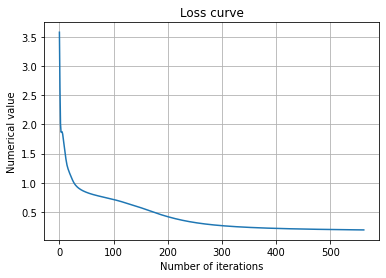

In [18]:
# Wykres funkcji celu dla solvera 'sgd'
x_label = []
for x in range(len(mlp.loss_curve_)):
    x_label.append(x)
plt.plot(x_label, mlp.loss_curve_)
plt.grid(which='both')
plt.title('Loss curve')
plt.xlabel('Number of iterations')
plt.ylabel('Numerical value')
plt.show()

In [16]:
# Raport klasyfikacji
y_true, y_pred = y_test, mlp.predict(x_test)
print(classification_report(y_true, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30

